# Imports

In [4]:
import os
import random
import time


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image


import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.nn.init as init
from torch.utils import data
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import random_split


from torchvision.datasets import ImageFolder
from torchvision import transforms

from sklearn.metrics import precision_score, recall_score, f1_score # Colab does not support torchmetrics for now

from pprint import pprint

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Task 1

In [61]:
class WaterDataset(Dataset):
  def __init__(self, csv_file):
    data = pd.read_csv(csv_file)

    self.X = data.drop(columns=["Potability"]).values
    self.y = data["Potability"].values

    self.X = np.array(self.X, dtype=np.float64)
    self.y = np.array(self.y, dtype=np.float64)

    self.data = list(zip(self.X, self.y))

  def __len__(self):
    return len(self.data)

  def __getitem__(self, idx):
    return self.data[idx]


file_path = '/content/drive/My Drive/DL_24-25/Data/water_train.csv'
dataset = WaterDataset(file_path)


print("Number of instances:", len(dataset))


print("\nFifth item:", dataset[4])


dataloader = DataLoader(dataset, batch_size=2, shuffle=True)


first_batch = next(iter(dataloader))
features, labels = first_batch
print()
print(features, labels)


Number of instances: 1508

Fifth item: (array([0.61088305, 0.52523539, 0.46561915, 0.47513312, 0.63433849,
       0.19640938, 0.62342348, 0.52058877, 0.75585562]), np.float64(0.0))

tensor([[0.6397, 0.6310, 0.6059, 0.3564, 0.2899, 0.3988, 0.5697, 0.7283, 0.4473],
        [0.5698, 0.5016, 0.5192, 0.7756, 0.4822, 0.2177, 0.3044, 0.5558, 0.4426]],
       dtype=torch.float64) tensor([1., 1.], dtype=torch.float64)


# Task 2

Epoch 1/10: 100%|██████████| 754/754 [00:00<00:00, 1073.91it/s]


Loss: 0.6737513731107788


Epoch 2/10: 100%|██████████| 754/754 [00:00<00:00, 1152.44it/s]


Loss: 0.6737455671915009


Epoch 3/10: 100%|██████████| 754/754 [00:00<00:00, 1222.56it/s]


Loss: 0.6737369564547147


Epoch 4/10: 100%|██████████| 754/754 [00:00<00:00, 1022.84it/s]


Loss: 0.6737333278440987


Epoch 5/10: 100%|██████████| 754/754 [00:00<00:00, 898.35it/s]


Loss: 0.6737323167785726


Epoch 6/10: 100%|██████████| 754/754 [00:00<00:00, 903.21it/s]


Loss: 0.6737307885597492


Epoch 7/10: 100%|██████████| 754/754 [00:00<00:00, 837.07it/s]


Loss: 0.6737311311678797


Epoch 8/10: 100%|██████████| 754/754 [00:00<00:00, 858.63it/s]


Loss: 0.6737303800228737


Epoch 9/10: 100%|██████████| 754/754 [00:00<00:00, 1171.53it/s]


Loss: 0.6737292302223985


Epoch 10/10: 100%|██████████| 754/754 [00:00<00:00, 1195.67it/s]


Loss: 0.6737228585333027


Epoch 1/10: 100%|██████████| 754/754 [00:00<00:00, 881.57it/s]


Loss: 0.6785802741186688


Epoch 2/10: 100%|██████████| 754/754 [00:00<00:00, 872.87it/s]


Loss: 0.6760348763801058


Epoch 3/10: 100%|██████████| 754/754 [00:00<00:00, 882.31it/s]


Loss: 0.6755304023109633


Epoch 4/10: 100%|██████████| 754/754 [00:00<00:00, 875.06it/s]


Loss: 0.6747680019478582


Epoch 5/10: 100%|██████████| 754/754 [00:00<00:00, 894.73it/s]


Loss: 0.6728189886406815


Epoch 6/10: 100%|██████████| 754/754 [00:00<00:00, 893.16it/s]


Loss: 0.6729047375111112


Epoch 7/10: 100%|██████████| 754/754 [00:00<00:00, 911.51it/s]


Loss: 0.6720972454832467


Epoch 8/10: 100%|██████████| 754/754 [00:00<00:00, 905.46it/s]


Loss: 0.6716182882494889


Epoch 9/10: 100%|██████████| 754/754 [00:00<00:00, 919.63it/s]


Loss: 0.6702956988893706


Epoch 10/10: 100%|██████████| 754/754 [00:00<00:00, 875.02it/s]


Loss: 0.6692973523541534


Epoch 1/10: 100%|██████████| 754/754 [00:01<00:00, 605.51it/s]


Loss: 0.6880287808274717


Epoch 2/10: 100%|██████████| 754/754 [00:01<00:00, 611.87it/s]


Loss: 0.6748166300494728


Epoch 3/10: 100%|██████████| 754/754 [00:01<00:00, 545.99it/s]


Loss: 0.6752562254904436


Epoch 4/10: 100%|██████████| 754/754 [00:00<00:00, 809.63it/s]


Loss: 0.6739865804698802


Epoch 5/10: 100%|██████████| 754/754 [00:00<00:00, 803.12it/s]


Loss: 0.6739389540266928


Epoch 6/10: 100%|██████████| 754/754 [00:00<00:00, 788.50it/s]


Loss: 0.6735309557272837


Epoch 7/10: 100%|██████████| 754/754 [00:00<00:00, 807.19it/s]


Loss: 0.6731686503959904


Epoch 8/10: 100%|██████████| 754/754 [00:00<00:00, 817.63it/s]


Loss: 0.6730314544562636


Epoch 9/10: 100%|██████████| 754/754 [00:00<00:00, 807.49it/s]


Loss: 0.6721044330207991


Epoch 10/10: 100%|██████████| 754/754 [00:00<00:00, 816.30it/s]


Loss: 0.6717603743787786


Epoch 1/10: 100%|██████████| 754/754 [00:00<00:00, 783.60it/s]


Loss: 0.6756031305309316


Epoch 2/10: 100%|██████████| 754/754 [00:00<00:00, 794.39it/s]


Loss: 0.6736489624101224


Epoch 3/10: 100%|██████████| 754/754 [00:00<00:00, 770.42it/s]


Loss: 0.6735667289093887


Epoch 4/10: 100%|██████████| 754/754 [00:01<00:00, 632.62it/s]


Loss: 0.6732917287305432


Epoch 5/10: 100%|██████████| 754/754 [00:01<00:00, 591.16it/s]


Loss: 0.6731564544872517


Epoch 6/10: 100%|██████████| 754/754 [00:01<00:00, 524.06it/s]


Loss: 0.6721233340172932


Epoch 7/10: 100%|██████████| 754/754 [00:01<00:00, 719.12it/s]


Loss: 0.671885587610996


Epoch 8/10: 100%|██████████| 754/754 [00:00<00:00, 798.09it/s]


Loss: 0.6712970619808774


Epoch 9/10: 100%|██████████| 754/754 [00:00<00:00, 771.87it/s]


Loss: 0.6686182118141999


Epoch 10/10: 100%|██████████| 754/754 [00:00<00:00, 785.12it/s]


Loss: 0.6673437529675841


Epoch 1/1000: 100%|██████████| 754/754 [00:00<00:00, 770.46it/s]


Loss: 0.6809746292605008


Epoch 2/1000: 100%|██████████| 754/754 [00:01<00:00, 753.22it/s]


Loss: 0.6754255610214305


Epoch 3/1000: 100%|██████████| 754/754 [00:00<00:00, 787.85it/s]


Loss: 0.6723237577974006


Epoch 4/1000: 100%|██████████| 754/754 [00:00<00:00, 775.52it/s]


Loss: 0.6761099183907243


Epoch 5/1000: 100%|██████████| 754/754 [00:00<00:00, 765.78it/s]


Loss: 0.6743895957340296


Epoch 6/1000: 100%|██████████| 754/754 [00:01<00:00, 730.10it/s]


Loss: 0.6740284117052346


Epoch 7/1000: 100%|██████████| 754/754 [00:01<00:00, 592.96it/s]


Loss: 0.6727478191533203


Epoch 8/1000: 100%|██████████| 754/754 [00:01<00:00, 584.51it/s]


Loss: 0.672879076486241


Epoch 9/1000: 100%|██████████| 754/754 [00:01<00:00, 536.18it/s]


Loss: 0.671620960063264


Epoch 10/1000: 100%|██████████| 754/754 [00:00<00:00, 779.97it/s]


Loss: 0.6713362675288628


Epoch 11/1000: 100%|██████████| 754/754 [00:00<00:00, 767.46it/s]


Loss: 0.6693200221981863


Epoch 12/1000: 100%|██████████| 754/754 [00:00<00:00, 759.41it/s]


Loss: 0.6689514219760895


Epoch 13/1000: 100%|██████████| 754/754 [00:00<00:00, 775.60it/s]


Loss: 0.6675132554943429


Epoch 14/1000: 100%|██████████| 754/754 [00:00<00:00, 783.40it/s]


Loss: 0.6659014492594595


Epoch 15/1000: 100%|██████████| 754/754 [00:00<00:00, 786.97it/s]


Loss: 0.6631775944239264


Epoch 16/1000: 100%|██████████| 754/754 [00:00<00:00, 778.34it/s]


Loss: 0.6619290617005579


Epoch 17/1000: 100%|██████████| 754/754 [00:00<00:00, 778.08it/s]


Loss: 0.6606617153718554


Epoch 18/1000: 100%|██████████| 754/754 [00:00<00:00, 773.60it/s]


Loss: 0.6590404853580485


Epoch 19/1000: 100%|██████████| 754/754 [00:00<00:00, 765.60it/s]


Loss: 0.6567657588331389


Epoch 20/1000: 100%|██████████| 754/754 [00:01<00:00, 585.22it/s]


Loss: 0.656382307212612


Epoch 21/1000: 100%|██████████| 754/754 [00:01<00:00, 587.87it/s]


Loss: 0.6539012416604343


Epoch 22/1000: 100%|██████████| 754/754 [00:01<00:00, 542.34it/s]


Loss: 0.6530812864515446


Epoch 23/1000: 100%|██████████| 754/754 [00:00<00:00, 784.74it/s]


Loss: 0.6522466143499319


Epoch 24/1000: 100%|██████████| 754/754 [00:00<00:00, 770.59it/s]


Loss: 0.6506779102573976


Epoch 25/1000: 100%|██████████| 754/754 [00:00<00:00, 769.59it/s]


Loss: 0.6498599389187537


Epoch 26/1000: 100%|██████████| 754/754 [00:00<00:00, 764.20it/s]


Loss: 0.6481127549624885


Epoch 27/1000: 100%|██████████| 754/754 [00:01<00:00, 740.76it/s]


Loss: 0.6480774819771871


Epoch 28/1000: 100%|██████████| 754/754 [00:00<00:00, 770.60it/s]


Loss: 0.645936123651282


Epoch 29/1000: 100%|██████████| 754/754 [00:00<00:00, 758.66it/s]


Loss: 0.643212283835487


Epoch 30/1000: 100%|██████████| 754/754 [00:00<00:00, 779.76it/s]


Loss: 0.6431433643444148


Epoch 31/1000: 100%|██████████| 754/754 [00:00<00:00, 773.83it/s]


Loss: 0.6413336017957101


Epoch 32/1000: 100%|██████████| 754/754 [00:00<00:00, 782.33it/s]


Loss: 0.6411543169728324


Epoch 33/1000: 100%|██████████| 754/754 [00:01<00:00, 581.04it/s]


Loss: 0.6399301636361316


Epoch 34/1000: 100%|██████████| 754/754 [00:01<00:00, 592.85it/s]


Loss: 0.6363471136564285


Epoch 35/1000: 100%|██████████| 754/754 [00:01<00:00, 559.22it/s]


Loss: 0.6380945808928589


Epoch 36/1000: 100%|██████████| 754/754 [00:00<00:00, 784.12it/s]


Loss: 0.6339301830577597


Epoch 37/1000: 100%|██████████| 754/754 [00:00<00:00, 754.48it/s]


Loss: 0.6333171664798923


Epoch 38/1000: 100%|██████████| 754/754 [00:01<00:00, 747.42it/s]


Loss: 0.630171182241775


Epoch 39/1000: 100%|██████████| 754/754 [00:01<00:00, 711.23it/s]


Loss: 0.6275869385000882


Epoch 40/1000: 100%|██████████| 754/754 [00:00<00:00, 774.91it/s]


Loss: 0.6283628087421628


Epoch 41/1000: 100%|██████████| 754/754 [00:00<00:00, 773.01it/s]


Loss: 0.6237284560695251


Epoch 42/1000: 100%|██████████| 754/754 [00:00<00:00, 766.16it/s]


Loss: 0.6215528643811097


Epoch 43/1000: 100%|██████████| 754/754 [00:00<00:00, 781.09it/s]


Loss: 0.6229626000994712


Epoch 44/1000: 100%|██████████| 754/754 [00:00<00:00, 755.96it/s]


Loss: 0.6161309749144932


Epoch 45/1000: 100%|██████████| 754/754 [00:01<00:00, 705.11it/s]


Loss: 0.6205224007249511


Epoch 46/1000: 100%|██████████| 754/754 [00:01<00:00, 576.87it/s]


Loss: 0.6122724114860401


Epoch 47/1000: 100%|██████████| 754/754 [00:01<00:00, 559.33it/s]


Loss: 0.6126327780260648


Epoch 48/1000: 100%|██████████| 754/754 [00:01<00:00, 611.21it/s]


Loss: 0.615115895412803


Epoch 49/1000: 100%|██████████| 754/754 [00:00<00:00, 784.35it/s]


Loss: 0.6184712052740532


Epoch 50/1000: 100%|██████████| 754/754 [00:00<00:00, 756.91it/s]


Loss: 0.6112521935837338


Epoch 51/1000: 100%|██████████| 754/754 [00:00<00:00, 790.47it/s]


Loss: 0.6092572848186569


Epoch 52/1000: 100%|██████████| 754/754 [00:01<00:00, 745.76it/s]


Loss: 0.6092224377812694


Epoch 53/1000: 100%|██████████| 754/754 [00:00<00:00, 769.84it/s]


Loss: 0.6074467460360546


Epoch 54/1000: 100%|██████████| 754/754 [00:00<00:00, 758.53it/s]


Loss: 0.6081635489546019


Epoch 55/1000: 100%|██████████| 754/754 [00:00<00:00, 763.63it/s]


Loss: 0.6063304002784607


Epoch 56/1000: 100%|██████████| 754/754 [00:00<00:00, 785.28it/s]


Loss: 0.6062255472004098


Epoch 57/1000: 100%|██████████| 754/754 [00:00<00:00, 756.63it/s]


Loss: 0.6063771628693181


Epoch 58/1000: 100%|██████████| 754/754 [00:01<00:00, 682.42it/s]


Loss: 0.6068894940006005


Epoch 59/1000: 100%|██████████| 754/754 [00:01<00:00, 601.32it/s]


Loss: 0.6008365630550156


Epoch 60/1000: 100%|██████████| 754/754 [00:01<00:00, 563.98it/s]


Loss: 0.6007199640378396


Epoch 61/1000: 100%|██████████| 754/754 [00:01<00:00, 631.81it/s]


Loss: 0.5999241954096116


Epoch 62/1000: 100%|██████████| 754/754 [00:00<00:00, 761.38it/s]


Loss: 0.6016534458035578


Epoch 63/1000: 100%|██████████| 754/754 [00:00<00:00, 765.46it/s]


Loss: 0.5989844024635911


Epoch 64/1000: 100%|██████████| 754/754 [00:01<00:00, 744.10it/s]


Loss: 0.5975128822325079


Epoch 65/1000: 100%|██████████| 754/754 [00:00<00:00, 761.68it/s]


Loss: 0.6010088172768409


Epoch 66/1000: 100%|██████████| 754/754 [00:00<00:00, 755.94it/s]


Loss: 0.5976649211615878


Epoch 67/1000: 100%|██████████| 754/754 [00:01<00:00, 743.64it/s]


Loss: 0.6001496416385673


Epoch 68/1000: 100%|██████████| 754/754 [00:00<00:00, 780.01it/s]


Loss: 0.5972513400057741


Epoch 69/1000: 100%|██████████| 754/754 [00:01<00:00, 749.55it/s]


Loss: 0.5994483499394963


Epoch 70/1000: 100%|██████████| 754/754 [00:01<00:00, 721.76it/s]


Loss: 0.5985197723899975


Epoch 71/1000: 100%|██████████| 754/754 [00:01<00:00, 619.56it/s]


Loss: 0.601699941018374


Epoch 72/1000: 100%|██████████| 754/754 [00:01<00:00, 564.37it/s]


Loss: 0.5964798960903911


Epoch 73/1000: 100%|██████████| 754/754 [00:01<00:00, 530.14it/s]


Loss: 0.5958448696674024


Epoch 74/1000: 100%|██████████| 754/754 [00:01<00:00, 734.81it/s]


Loss: 0.5943633482571622


Epoch 75/1000: 100%|██████████| 754/754 [00:00<00:00, 775.30it/s]


Loss: 0.5920706582440938


Epoch 76/1000: 100%|██████████| 754/754 [00:01<00:00, 743.84it/s]


Loss: 0.5976691165795693


Epoch 77/1000: 100%|██████████| 754/754 [00:00<00:00, 782.92it/s]


Loss: 0.5899366891056063


Epoch 78/1000: 100%|██████████| 754/754 [00:00<00:00, 768.12it/s]


Loss: 0.5964747881739146


Epoch 79/1000: 100%|██████████| 754/754 [00:00<00:00, 757.58it/s]


Loss: 0.594281363995148


Epoch 80/1000: 100%|██████████| 754/754 [00:00<00:00, 757.50it/s]


Loss: 0.594810650750639


Epoch 81/1000: 100%|██████████| 754/754 [00:00<00:00, 766.46it/s]


Loss: 0.6000517376893711


Epoch 82/1000: 100%|██████████| 754/754 [00:00<00:00, 761.98it/s]


Loss: 0.5917608850988848


Epoch 83/1000: 100%|██████████| 754/754 [00:00<00:00, 780.27it/s]


Loss: 0.5918903328893356


Epoch 84/1000: 100%|██████████| 754/754 [00:01<00:00, 587.41it/s]


Loss: 0.5949486291495495


Epoch 85/1000: 100%|██████████| 754/754 [00:01<00:00, 579.88it/s]


Loss: 0.5898611602874902


Epoch 86/1000: 100%|██████████| 754/754 [00:01<00:00, 530.53it/s]


Loss: 0.593397067923998


Epoch 87/1000: 100%|██████████| 754/754 [00:01<00:00, 745.16it/s]


Loss: 0.592775566864077


Epoch 88/1000: 100%|██████████| 754/754 [00:01<00:00, 745.04it/s]


Loss: 0.591818561485971


Epoch 89/1000: 100%|██████████| 754/754 [00:01<00:00, 750.56it/s]


Loss: 0.5963741454742948


Epoch 90/1000: 100%|██████████| 754/754 [00:00<00:00, 761.60it/s]


Loss: 0.5976357265160634


Epoch 91/1000: 100%|██████████| 754/754 [00:00<00:00, 779.35it/s]


Loss: 0.593222254190584


Epoch 92/1000: 100%|██████████| 754/754 [00:00<00:00, 764.15it/s]


Loss: 0.5943308799905549


Epoch 93/1000: 100%|██████████| 754/754 [00:00<00:00, 779.30it/s]


Loss: 0.5907846631615643


Epoch 94/1000: 100%|██████████| 754/754 [00:01<00:00, 734.26it/s]


Loss: 0.5923373848792729


Epoch 95/1000: 100%|██████████| 754/754 [00:00<00:00, 784.30it/s]


Loss: 0.5911637476450252


Epoch 96/1000: 100%|██████████| 754/754 [00:01<00:00, 750.25it/s]


Loss: 0.5906443073061006


Epoch 97/1000: 100%|██████████| 754/754 [00:01<00:00, 570.43it/s]


Loss: 0.5903193714882714


Epoch 98/1000: 100%|██████████| 754/754 [00:01<00:00, 576.43it/s]


Loss: 0.5915375928387085


Epoch 99/1000: 100%|██████████| 754/754 [00:01<00:00, 572.48it/s]


Loss: 0.5897221711787842


Epoch 100/1000: 100%|██████████| 754/754 [00:00<00:00, 774.98it/s]


Loss: 0.5956033149768725


Epoch 101/1000: 100%|██████████| 754/754 [00:00<00:00, 772.76it/s]


Loss: 0.592346054934143


Epoch 102/1000: 100%|██████████| 754/754 [00:01<00:00, 731.78it/s]


Loss: 0.5944639296426539


Epoch 103/1000: 100%|██████████| 754/754 [00:00<00:00, 767.49it/s]


Loss: 0.596857438896553


Epoch 104/1000: 100%|██████████| 754/754 [00:00<00:00, 758.14it/s]


Loss: 0.5970580413423735


Epoch 105/1000: 100%|██████████| 754/754 [00:00<00:00, 778.45it/s]


Loss: 0.5934612006146649


Epoch 106/1000: 100%|██████████| 754/754 [00:00<00:00, 769.80it/s]


Loss: 0.5931503304356922


Epoch 107/1000: 100%|██████████| 754/754 [00:00<00:00, 769.74it/s]


Loss: 0.594154614569812


Epoch 108/1000: 100%|██████████| 754/754 [00:00<00:00, 762.58it/s]


Loss: 0.590791313654548


Epoch 109/1000: 100%|██████████| 754/754 [00:01<00:00, 672.05it/s]


Loss: 0.5904407116636358


Epoch 110/1000: 100%|██████████| 754/754 [00:01<00:00, 594.20it/s]


Loss: 0.5949350227885917


Epoch 111/1000: 100%|██████████| 754/754 [00:01<00:00, 556.21it/s]


Loss: 0.5868306365901659


Epoch 112/1000: 100%|██████████| 754/754 [00:01<00:00, 624.22it/s]


Loss: 0.5938330813056594


Epoch 113/1000: 100%|██████████| 754/754 [00:00<00:00, 768.51it/s]


Loss: 0.5895293203901391


Epoch 114/1000: 100%|██████████| 754/754 [00:00<00:00, 781.64it/s]


Loss: 0.5917186906823113


Epoch 115/1000: 100%|██████████| 754/754 [00:00<00:00, 756.26it/s]


Loss: 0.5927998849662609


Epoch 116/1000: 100%|██████████| 754/754 [00:00<00:00, 773.20it/s]


Loss: 0.587172863614654


Epoch 117/1000: 100%|██████████| 754/754 [00:00<00:00, 779.86it/s]


Loss: 0.5882796937851754


Epoch 118/1000: 100%|██████████| 754/754 [00:00<00:00, 773.29it/s]


Loss: 0.5918837556966262


Epoch 119/1000: 100%|██████████| 754/754 [00:00<00:00, 765.81it/s]


Loss: 0.5903520485391193


Epoch 120/1000: 100%|██████████| 754/754 [00:00<00:00, 778.23it/s]


Loss: 0.5879816760751233


Epoch 121/1000: 100%|██████████| 754/754 [00:00<00:00, 768.68it/s]


Loss: 0.5909654480511377


Epoch 122/1000: 100%|██████████| 754/754 [00:01<00:00, 662.84it/s]


Loss: 0.5845779150684886


Epoch 123/1000: 100%|██████████| 754/754 [00:01<00:00, 568.22it/s]


Loss: 0.5903660484863845


Epoch 124/1000: 100%|██████████| 754/754 [00:01<00:00, 565.36it/s]


Loss: 0.5946177304462982


Epoch 125/1000: 100%|██████████| 754/754 [00:01<00:00, 591.56it/s]


Loss: 0.5899443997549442


Epoch 126/1000: 100%|██████████| 754/754 [00:00<00:00, 762.77it/s]


Loss: 0.5886904745305881


Epoch 127/1000: 100%|██████████| 754/754 [00:00<00:00, 780.71it/s]


Loss: 0.589694661293327


Epoch 128/1000: 100%|██████████| 754/754 [00:00<00:00, 767.94it/s]


Loss: 0.5885129872146273


Epoch 129/1000: 100%|██████████| 754/754 [00:00<00:00, 772.55it/s]


Loss: 0.5888809362125017


Epoch 130/1000: 100%|██████████| 754/754 [00:01<00:00, 724.81it/s]


Loss: 0.5901538190044048


Epoch 131/1000: 100%|██████████| 754/754 [00:01<00:00, 746.68it/s]


Loss: 0.5922782118345762


Epoch 132/1000: 100%|██████████| 754/754 [00:01<00:00, 744.57it/s]


Loss: 0.5884794352343924


Epoch 133/1000: 100%|██████████| 754/754 [00:00<00:00, 760.12it/s]


Loss: 0.590041925305555


Epoch 134/1000: 100%|██████████| 754/754 [00:01<00:00, 745.94it/s]


Loss: 0.58614857599574


Epoch 135/1000: 100%|██████████| 754/754 [00:01<00:00, 627.93it/s]


Loss: 0.5855723129343291


Epoch 136/1000: 100%|██████████| 754/754 [00:01<00:00, 555.34it/s]


Loss: 0.5886391584590986


Epoch 137/1000: 100%|██████████| 754/754 [00:01<00:00, 518.06it/s]


Loss: 0.5859673885080163


Epoch 138/1000: 100%|██████████| 754/754 [00:01<00:00, 721.54it/s]


Loss: 0.5908154756700329


Epoch 139/1000: 100%|██████████| 754/754 [00:01<00:00, 718.52it/s]


Loss: 0.5886716087810715


Epoch 140/1000: 100%|██████████| 754/754 [00:00<00:00, 758.66it/s]


Loss: 0.5841985945972745


Epoch 141/1000: 100%|██████████| 754/754 [00:00<00:00, 774.48it/s]


Loss: 0.5811116352618056


Epoch 142/1000: 100%|██████████| 754/754 [00:00<00:00, 768.85it/s]


Loss: 0.5899775787614859


Epoch 143/1000: 100%|██████████| 754/754 [00:00<00:00, 773.18it/s]


Loss: 0.5897860763698263


Epoch 144/1000: 100%|██████████| 754/754 [00:00<00:00, 779.42it/s]


Loss: 0.589290236318064


Epoch 145/1000: 100%|██████████| 754/754 [00:00<00:00, 775.69it/s]


Loss: 0.5860149506133653


Epoch 146/1000: 100%|██████████| 754/754 [00:00<00:00, 765.56it/s]


Loss: 0.5864233595741523


Epoch 147/1000: 100%|██████████| 754/754 [00:01<00:00, 746.44it/s]


Loss: 0.5862267476454653


Epoch 148/1000: 100%|██████████| 754/754 [00:01<00:00, 580.22it/s]


Loss: 0.5869850637070064


Epoch 149/1000: 100%|██████████| 754/754 [00:01<00:00, 585.38it/s]


Loss: 0.5881802823681098


Epoch 150/1000: 100%|██████████| 754/754 [00:01<00:00, 517.89it/s]


Loss: 0.5844013183044185


Epoch 151/1000: 100%|██████████| 754/754 [00:00<00:00, 769.53it/s]


Loss: 0.591905512893943


Epoch 152/1000: 100%|██████████| 754/754 [00:00<00:00, 770.29it/s]


Loss: 0.5840464611327775


Epoch 153/1000: 100%|██████████| 754/754 [00:00<00:00, 774.15it/s]


Loss: 0.5881880593216862


Epoch 154/1000: 100%|██████████| 754/754 [00:00<00:00, 769.56it/s]


Loss: 0.5868299887453846


Epoch 155/1000: 100%|██████████| 754/754 [00:00<00:00, 775.16it/s]


Loss: 0.5913384769121753


Epoch 156/1000: 100%|██████████| 754/754 [00:00<00:00, 783.62it/s]


Loss: 0.5824500938052366


Epoch 157/1000: 100%|██████████| 754/754 [00:00<00:00, 754.79it/s]


Loss: 0.5846500017282501


Epoch 158/1000: 100%|██████████| 754/754 [00:00<00:00, 769.68it/s]


Loss: 0.5894498252149286


Epoch 159/1000: 100%|██████████| 754/754 [00:00<00:00, 771.11it/s]


Loss: 0.5868564660633748


Epoch 160/1000: 100%|██████████| 754/754 [00:00<00:00, 771.35it/s]


Loss: 0.5862946564366236


Epoch 161/1000: 100%|██████████| 754/754 [00:01<00:00, 547.28it/s]


Loss: 0.5834934024698538


Epoch 162/1000: 100%|██████████| 754/754 [00:01<00:00, 579.10it/s]


Loss: 0.5851412252757688


Epoch 163/1000: 100%|██████████| 754/754 [00:01<00:00, 562.70it/s]


Loss: 0.5860816929044711


Epoch 164/1000: 100%|██████████| 754/754 [00:00<00:00, 761.78it/s]


Loss: 0.5854552672084036


Epoch 165/1000: 100%|██████████| 754/754 [00:00<00:00, 766.71it/s]


Loss: 0.585092031196827


Epoch 166/1000: 100%|██████████| 754/754 [00:00<00:00, 764.75it/s]


Loss: 0.5833854100195103


Epoch 167/1000: 100%|██████████| 754/754 [00:01<00:00, 742.70it/s]


Loss: 0.5868199172204939


Epoch 168/1000: 100%|██████████| 754/754 [00:00<00:00, 775.62it/s]


Loss: 0.5870277434686293


Epoch 169/1000: 100%|██████████| 754/754 [00:00<00:00, 777.88it/s]


Loss: 0.5869217739596133


Epoch 170/1000: 100%|██████████| 754/754 [00:01<00:00, 751.93it/s]


Loss: 0.5846885019019048


Epoch 171/1000: 100%|██████████| 754/754 [00:00<00:00, 758.32it/s]


Loss: 0.5875929139791655


Epoch 172/1000: 100%|██████████| 754/754 [00:01<00:00, 748.40it/s]


Loss: 0.5837382852774242


Epoch 173/1000: 100%|██████████| 754/754 [00:01<00:00, 705.18it/s]


Loss: 0.5848650156325149


Epoch 174/1000: 100%|██████████| 754/754 [00:01<00:00, 566.60it/s]


Loss: 0.586514471825064


Epoch 175/1000: 100%|██████████| 754/754 [00:01<00:00, 569.83it/s]


Loss: 0.5871714427721358


Epoch 176/1000: 100%|██████████| 754/754 [00:01<00:00, 608.33it/s]


Loss: 0.5848760900312456


Epoch 177/1000: 100%|██████████| 754/754 [00:00<00:00, 754.80it/s]


Loss: 0.5878897727484412


Epoch 178/1000: 100%|██████████| 754/754 [00:01<00:00, 745.24it/s]


Loss: 0.587179028337688


Epoch 179/1000: 100%|██████████| 754/754 [00:00<00:00, 759.32it/s]


Loss: 0.5833885018622369


Epoch 180/1000: 100%|██████████| 754/754 [00:01<00:00, 753.34it/s]


Loss: 0.5851572195082824


Epoch 181/1000: 100%|██████████| 754/754 [00:00<00:00, 773.23it/s]


Loss: 0.5833423818790153


Epoch 182/1000: 100%|██████████| 754/754 [00:00<00:00, 765.21it/s]


Loss: 0.583342982174468


Epoch 183/1000: 100%|██████████| 754/754 [00:00<00:00, 769.86it/s]


Loss: 0.5865222700236646


Epoch 184/1000: 100%|██████████| 754/754 [00:00<00:00, 773.67it/s]


Loss: 0.5802988145866034


Epoch 185/1000: 100%|██████████| 754/754 [00:01<00:00, 740.83it/s]


Loss: 0.5831795775724342


Epoch 186/1000: 100%|██████████| 754/754 [00:01<00:00, 653.17it/s]


Loss: 0.5892132124035997


Epoch 187/1000: 100%|██████████| 754/754 [00:01<00:00, 571.50it/s]


Loss: 0.5822292162347535


Epoch 188/1000: 100%|██████████| 754/754 [00:01<00:00, 523.48it/s]


Loss: 0.584410394238066


Epoch 189/1000: 100%|██████████| 754/754 [00:01<00:00, 664.27it/s]


Loss: 0.5826965882603464


Epoch 190/1000: 100%|██████████| 754/754 [00:01<00:00, 753.10it/s]


Loss: 0.581689412401747


Epoch 191/1000: 100%|██████████| 754/754 [00:01<00:00, 717.87it/s]


Loss: 0.5840087520052488


Epoch 192/1000: 100%|██████████| 754/754 [00:01<00:00, 712.58it/s]


Loss: 0.5822244139699468


Epoch 193/1000: 100%|██████████| 754/754 [00:00<00:00, 759.16it/s]


Loss: 0.5823912574694707


Epoch 194/1000: 100%|██████████| 754/754 [00:01<00:00, 726.17it/s]


Loss: 0.5869023751674975


Epoch 195/1000: 100%|██████████| 754/754 [00:00<00:00, 756.45it/s]


Loss: 0.5877457120275466


Epoch 196/1000: 100%|██████████| 754/754 [00:00<00:00, 763.13it/s]


Loss: 0.5826392290861758


Epoch 197/1000: 100%|██████████| 754/754 [00:00<00:00, 767.44it/s]


Loss: 0.580198459475442


Epoch 198/1000: 100%|██████████| 754/754 [00:01<00:00, 744.92it/s]


Loss: 0.586706893869357


Epoch 199/1000: 100%|██████████| 754/754 [00:01<00:00, 578.35it/s]


Loss: 0.5798168524763786


Epoch 200/1000: 100%|██████████| 754/754 [00:01<00:00, 558.15it/s]


Loss: 0.5810251434874629


Epoch 201/1000: 100%|██████████| 754/754 [00:01<00:00, 532.09it/s]


Loss: 0.5824684390417777


Epoch 202/1000: 100%|██████████| 754/754 [00:00<00:00, 763.32it/s]


Loss: 0.5838975253013464


Epoch 203/1000: 100%|██████████| 754/754 [00:00<00:00, 763.62it/s]


Loss: 0.5853182528592864


Epoch 204/1000: 100%|██████████| 754/754 [00:00<00:00, 756.95it/s]


Loss: 0.5822087199543294


Epoch 205/1000: 100%|██████████| 754/754 [00:01<00:00, 733.21it/s]


Loss: 0.5857803131545096


Epoch 206/1000: 100%|██████████| 754/754 [00:01<00:00, 751.47it/s]


Loss: 0.5787625013596183


Epoch 207/1000: 100%|██████████| 754/754 [00:01<00:00, 736.88it/s]


Loss: 0.5826599247635044


Epoch 208/1000: 100%|██████████| 754/754 [00:01<00:00, 738.79it/s]


Loss: 0.5804373078858505


Epoch 209/1000: 100%|██████████| 754/754 [00:00<00:00, 761.90it/s]


Loss: 0.5845663652456408


Epoch 210/1000: 100%|██████████| 754/754 [00:00<00:00, 776.45it/s]


Loss: 0.5780555944425357


Epoch 211/1000: 100%|██████████| 754/754 [00:01<00:00, 701.74it/s]


Loss: 0.5831392456132632


Epoch 212/1000: 100%|██████████| 754/754 [00:01<00:00, 578.35it/s]


Loss: 0.5804280189980088


Epoch 213/1000: 100%|██████████| 754/754 [00:01<00:00, 577.47it/s]


Loss: 0.5833089487226951


Epoch 214/1000: 100%|██████████| 754/754 [00:01<00:00, 586.26it/s]


Loss: 0.5871960881218038


Epoch 215/1000: 100%|██████████| 754/754 [00:00<00:00, 758.09it/s]


Loss: 0.5819719190108997


Epoch 216/1000: 100%|██████████| 754/754 [00:00<00:00, 767.64it/s]


Loss: 0.5840819110150205


Epoch 217/1000: 100%|██████████| 754/754 [00:01<00:00, 734.94it/s]


Loss: 0.5823251050884591


Epoch 218/1000: 100%|██████████| 754/754 [00:00<00:00, 771.32it/s]


Loss: 0.5826284054874267


Epoch 219/1000: 100%|██████████| 754/754 [00:01<00:00, 751.22it/s]


Loss: 0.5838620085022178


Epoch 220/1000: 100%|██████████| 754/754 [00:00<00:00, 763.88it/s]


Loss: 0.5796607684255121


Epoch 221/1000: 100%|██████████| 754/754 [00:00<00:00, 765.17it/s]


Loss: 0.5822959593756604


Epoch 222/1000: 100%|██████████| 754/754 [00:01<00:00, 747.96it/s]


Loss: 0.5820255141300137


Epoch 223/1000: 100%|██████████| 754/754 [00:00<00:00, 759.60it/s]


Loss: 0.5814240265647518


Epoch 224/1000: 100%|██████████| 754/754 [00:01<00:00, 636.62it/s]


Loss: 0.5786215072048122


Epoch 225/1000: 100%|██████████| 754/754 [00:01<00:00, 579.33it/s]


Loss: 0.5816769163749262


Epoch 226/1000: 100%|██████████| 754/754 [00:01<00:00, 550.60it/s]


Loss: 0.5818567661672277


Epoch 227/1000: 100%|██████████| 754/754 [00:01<00:00, 644.97it/s]


Loss: 0.5768088268743586


Epoch 228/1000: 100%|██████████| 754/754 [00:00<00:00, 770.20it/s]


Loss: 0.5848876406643688


Epoch 229/1000: 100%|██████████| 754/754 [00:00<00:00, 770.08it/s]


Loss: 0.5749793311269751


Epoch 230/1000: 100%|██████████| 754/754 [00:00<00:00, 765.32it/s]


Loss: 0.5842679139789915


Epoch 231/1000: 100%|██████████| 754/754 [00:00<00:00, 785.32it/s]


Loss: 0.5848916619917284


Epoch 232/1000: 100%|██████████| 754/754 [00:01<00:00, 752.89it/s]


Loss: 0.5817146593956796


Epoch 233/1000: 100%|██████████| 754/754 [00:00<00:00, 767.05it/s]


Loss: 0.581011699260625


Epoch 234/1000: 100%|██████████| 754/754 [00:01<00:00, 734.25it/s]


Loss: 0.5795177422780099


Epoch 235/1000: 100%|██████████| 754/754 [00:01<00:00, 751.02it/s]


Loss: 0.5785649008159612


Epoch 236/1000: 100%|██████████| 754/754 [00:00<00:00, 772.56it/s]


Loss: 0.5850885145030223


Epoch 237/1000: 100%|██████████| 754/754 [00:01<00:00, 620.93it/s]


Loss: 0.5820452547397474


Epoch 238/1000: 100%|██████████| 754/754 [00:01<00:00, 574.06it/s]


Loss: 0.5808841735519844


Epoch 239/1000: 100%|██████████| 754/754 [00:01<00:00, 553.64it/s]


Loss: 0.5815650377847472


Epoch 240/1000: 100%|██████████| 754/754 [00:01<00:00, 671.99it/s]


Loss: 0.5806469921842811


Epoch 241/1000: 100%|██████████| 754/754 [00:00<00:00, 769.07it/s]


Loss: 0.5791951766440185


Epoch 242/1000: 100%|██████████| 754/754 [00:00<00:00, 769.23it/s]


Loss: 0.579186974374938


Epoch 243/1000: 100%|██████████| 754/754 [00:00<00:00, 765.18it/s]


Loss: 0.5809910142354529


Epoch 244/1000: 100%|██████████| 754/754 [00:00<00:00, 761.01it/s]


Loss: 0.5824736229857969


Epoch 245/1000: 100%|██████████| 754/754 [00:00<00:00, 759.02it/s]


Loss: 0.5786633699519723


Epoch 246/1000: 100%|██████████| 754/754 [00:00<00:00, 768.56it/s]


Loss: 0.5812821128166007


Epoch 247/1000: 100%|██████████| 754/754 [00:01<00:00, 736.56it/s]


Loss: 0.582096276869034


Epoch 248/1000: 100%|██████████| 754/754 [00:00<00:00, 762.75it/s]


Loss: 0.577633439417464


Epoch 249/1000: 100%|██████████| 754/754 [00:01<00:00, 718.83it/s]


Loss: 0.5828187229502106


Epoch 250/1000: 100%|██████████| 754/754 [00:01<00:00, 544.46it/s]


Loss: 0.5835601414358663


Epoch 251/1000: 100%|██████████| 754/754 [00:01<00:00, 579.67it/s]


Loss: 0.5816324923078798


Epoch 252/1000: 100%|██████████| 754/754 [00:01<00:00, 542.82it/s]


Loss: 0.5814767135233082


Epoch 253/1000: 100%|██████████| 754/754 [00:01<00:00, 734.49it/s]


Loss: 0.5819389011898629


Epoch 254/1000: 100%|██████████| 754/754 [00:01<00:00, 749.79it/s]


Loss: 0.5806566133344205


Epoch 255/1000: 100%|██████████| 754/754 [00:00<00:00, 769.32it/s]


Loss: 0.582858894820713


Epoch 256/1000: 100%|██████████| 754/754 [00:01<00:00, 743.64it/s]


Loss: 0.5776209175902906


Epoch 257/1000: 100%|██████████| 754/754 [00:01<00:00, 733.45it/s]


Loss: 0.5798606665543125


Epoch 258/1000: 100%|██████████| 754/754 [00:00<00:00, 763.35it/s]


Loss: 0.5823969363336221


Epoch 259/1000: 100%|██████████| 754/754 [00:00<00:00, 764.99it/s]


Loss: 0.579723784784028


Epoch 260/1000: 100%|██████████| 754/754 [00:00<00:00, 770.75it/s]


Loss: 0.5811441527180552


Epoch 261/1000: 100%|██████████| 754/754 [00:00<00:00, 760.97it/s]


Loss: 0.5822787291521023


Epoch 262/1000: 100%|██████████| 754/754 [00:01<00:00, 661.64it/s]


Loss: 0.5790134130900513


Epoch 263/1000: 100%|██████████| 754/754 [00:01<00:00, 580.02it/s]


Loss: 0.5784343844798421


Epoch 264/1000: 100%|██████████| 754/754 [00:01<00:00, 522.67it/s]


Loss: 0.5822355839614053


Epoch 265/1000: 100%|██████████| 754/754 [00:01<00:00, 631.27it/s]


Loss: 0.575068196494241


Epoch 266/1000: 100%|██████████| 754/754 [00:00<00:00, 756.54it/s]


Loss: 0.5785820554319364


Epoch 267/1000: 100%|██████████| 754/754 [00:00<00:00, 760.37it/s]


Loss: 0.581743974357211


Epoch 268/1000: 100%|██████████| 754/754 [00:01<00:00, 746.46it/s]


Loss: 0.5819090932647176


Epoch 269/1000: 100%|██████████| 754/754 [00:00<00:00, 757.44it/s]


Loss: 0.577272339686949


Epoch 270/1000: 100%|██████████| 754/754 [00:00<00:00, 755.84it/s]


Loss: 0.5829590669677491


Epoch 271/1000: 100%|██████████| 754/754 [00:01<00:00, 751.81it/s]


Loss: 0.5792373661396516


Epoch 272/1000: 100%|██████████| 754/754 [00:00<00:00, 766.79it/s]


Loss: 0.5794861818952807


Epoch 273/1000: 100%|██████████| 754/754 [00:01<00:00, 726.38it/s]


Loss: 0.5813674281403146


Epoch 274/1000: 100%|██████████| 754/754 [00:01<00:00, 705.13it/s]


Loss: 0.5799826196338043


Epoch 275/1000: 100%|██████████| 754/754 [00:01<00:00, 567.80it/s]


Loss: 0.5820313975689265


Epoch 276/1000: 100%|██████████| 754/754 [00:01<00:00, 578.49it/s]


Loss: 0.5753705215539082


Epoch 277/1000: 100%|██████████| 754/754 [00:01<00:00, 521.85it/s]


Loss: 0.5819120156413206


Epoch 278/1000: 100%|██████████| 754/754 [00:01<00:00, 743.06it/s]


Loss: 0.576023650580439


Epoch 279/1000: 100%|██████████| 754/754 [00:01<00:00, 752.33it/s]


Loss: 0.5788168259735765


Epoch 280/1000: 100%|██████████| 754/754 [00:00<00:00, 781.46it/s]


Loss: 0.5807106242235996


Epoch 281/1000: 100%|██████████| 754/754 [00:00<00:00, 773.64it/s]


Loss: 0.5782674970969913


Epoch 282/1000: 100%|██████████| 754/754 [00:01<00:00, 746.40it/s]


Loss: 0.579399866909184


Epoch 283/1000: 100%|██████████| 754/754 [00:01<00:00, 743.31it/s]


Loss: 0.5796861748065335


Epoch 284/1000: 100%|██████████| 754/754 [00:01<00:00, 742.28it/s]


Loss: 0.5831439036885845


Epoch 285/1000: 100%|██████████| 754/754 [00:01<00:00, 739.69it/s]


Loss: 0.5799872505649015


Epoch 286/1000: 100%|██████████| 754/754 [00:00<00:00, 757.52it/s]


Loss: 0.5738484541384073


Epoch 287/1000: 100%|██████████| 754/754 [00:01<00:00, 742.67it/s]


Loss: 0.5769735125217103


Epoch 288/1000: 100%|██████████| 754/754 [00:01<00:00, 572.59it/s]


Loss: 0.5781855377756474


Epoch 289/1000: 100%|██████████| 754/754 [00:01<00:00, 572.27it/s]


Loss: 0.5755094833454656


Epoch 290/1000: 100%|██████████| 754/754 [00:01<00:00, 546.24it/s]


Loss: 0.5768420335982459


Epoch 291/1000: 100%|██████████| 754/754 [00:00<00:00, 761.84it/s]


Loss: 0.5820080226074795


Epoch 292/1000: 100%|██████████| 754/754 [00:01<00:00, 748.17it/s]


Loss: 0.5748924737208244


Epoch 293/1000: 100%|██████████| 754/754 [00:01<00:00, 750.30it/s]


Loss: 0.5794592072016286


Epoch 294/1000: 100%|██████████| 754/754 [00:00<00:00, 761.16it/s]


Loss: 0.5778822504398994


Epoch 295/1000: 100%|██████████| 754/754 [00:00<00:00, 760.48it/s]


Loss: 0.5824178743425668


Epoch 296/1000: 100%|██████████| 754/754 [00:00<00:00, 757.85it/s]


Loss: 0.5808850883824914


Epoch 297/1000: 100%|██████████| 754/754 [00:00<00:00, 764.94it/s]


Loss: 0.5780937935099678


Epoch 298/1000: 100%|██████████| 754/754 [00:00<00:00, 770.83it/s]


Loss: 0.5764866258642718


Epoch 299/1000: 100%|██████████| 754/754 [00:00<00:00, 766.48it/s]


Loss: 0.5787828683863031


Epoch 300/1000: 100%|██████████| 754/754 [00:01<00:00, 705.44it/s]


Loss: 0.5790536027174413


Epoch 301/1000: 100%|██████████| 754/754 [00:01<00:00, 571.30it/s]


Loss: 0.580198523198163


Epoch 302/1000: 100%|██████████| 754/754 [00:01<00:00, 561.32it/s]


Loss: 0.5758591258023873


Epoch 303/1000: 100%|██████████| 754/754 [00:01<00:00, 573.80it/s]


Loss: 0.5738474569859018


Epoch 304/1000: 100%|██████████| 754/754 [00:01<00:00, 752.30it/s]


Loss: 0.5750974590250288


Epoch 305/1000: 100%|██████████| 754/754 [00:01<00:00, 744.64it/s]


Loss: 0.5768635640172807


Epoch 306/1000: 100%|██████████| 754/754 [00:00<00:00, 762.44it/s]


Loss: 0.5781954130854468


Epoch 307/1000: 100%|██████████| 754/754 [00:00<00:00, 766.92it/s]


Loss: 0.5754960304229898


Epoch 308/1000: 100%|██████████| 754/754 [00:00<00:00, 770.51it/s]


Loss: 0.574240474588675


Epoch 309/1000: 100%|██████████| 754/754 [00:00<00:00, 766.77it/s]


Loss: 0.5767726073491162


Epoch 310/1000: 100%|██████████| 754/754 [00:01<00:00, 750.49it/s]


Loss: 0.5789420777828055


Epoch 311/1000: 100%|██████████| 754/754 [00:01<00:00, 741.55it/s]


Loss: 0.5757753040434037


Epoch 312/1000: 100%|██████████| 754/754 [00:00<00:00, 767.26it/s]


Loss: 0.5739304966117881


Epoch 313/1000: 100%|██████████| 754/754 [00:01<00:00, 680.49it/s]


Loss: 0.5815330899421827


Epoch 314/1000: 100%|██████████| 754/754 [00:01<00:00, 534.30it/s]


Loss: 0.5774583804670632


Epoch 315/1000: 100%|██████████| 754/754 [00:01<00:00, 545.12it/s]


Loss: 0.573787618191315


Epoch 316/1000: 100%|██████████| 754/754 [00:01<00:00, 621.11it/s]


Loss: 0.5785232275991209


Epoch 317/1000: 100%|██████████| 754/754 [00:00<00:00, 769.76it/s]


Loss: 0.5766988802869218


Epoch 318/1000: 100%|██████████| 754/754 [00:00<00:00, 769.58it/s]


Loss: 0.5789185668532033


Epoch 319/1000: 100%|██████████| 754/754 [00:01<00:00, 735.14it/s]


Loss: 0.5777687752812073


Epoch 320/1000: 100%|██████████| 754/754 [00:00<00:00, 755.86it/s]


Loss: 0.5749346114675309


Epoch 321/1000: 100%|██████████| 754/754 [00:00<00:00, 759.32it/s]


Loss: 0.5819776303651162


Epoch 322/1000: 100%|██████████| 754/754 [00:01<00:00, 747.87it/s]


Loss: 0.5776760525092364


Epoch 323/1000: 100%|██████████| 754/754 [00:01<00:00, 728.91it/s]


Loss: 0.5756399557389694


Epoch 324/1000: 100%|██████████| 754/754 [00:01<00:00, 715.84it/s]


Loss: 0.5785835123564109


Epoch 325/1000: 100%|██████████| 754/754 [00:01<00:00, 751.30it/s]


Loss: 0.5771319671813152


Epoch 326/1000: 100%|██████████| 754/754 [00:01<00:00, 588.25it/s]


Loss: 0.5765654770682124


Epoch 327/1000: 100%|██████████| 754/754 [00:01<00:00, 582.07it/s]


Loss: 0.5720285075353533


Epoch 328/1000: 100%|██████████| 754/754 [00:01<00:00, 527.48it/s]


Loss: 0.5758571716257684


Epoch 329/1000: 100%|██████████| 754/754 [00:01<00:00, 714.80it/s]


Loss: 0.5777861387901186


Epoch 330/1000: 100%|██████████| 754/754 [00:01<00:00, 732.18it/s]


Loss: 0.5772327644953045


Epoch 331/1000: 100%|██████████| 754/754 [00:01<00:00, 748.89it/s]


Loss: 0.5742099311509088


Epoch 332/1000: 100%|██████████| 754/754 [00:01<00:00, 750.91it/s]


Loss: 0.5780399092312517


Epoch 333/1000: 100%|██████████| 754/754 [00:00<00:00, 756.49it/s]


Loss: 0.5773736789071592


Epoch 334/1000: 100%|██████████| 754/754 [00:01<00:00, 753.58it/s]


Loss: 0.5813785673314286


Epoch 335/1000: 100%|██████████| 754/754 [00:00<00:00, 755.13it/s]


Loss: 0.574289989418076


Epoch 336/1000: 100%|██████████| 754/754 [00:00<00:00, 754.21it/s]


Loss: 0.5772277261735748


Epoch 337/1000: 100%|██████████| 754/754 [00:01<00:00, 750.25it/s]


Loss: 0.5736873846412179


Epoch 338/1000: 100%|██████████| 754/754 [00:01<00:00, 753.77it/s]


Loss: 0.5752671356621725


Epoch 339/1000: 100%|██████████| 754/754 [00:01<00:00, 551.50it/s]


Loss: 0.574473736056717


Epoch 340/1000: 100%|██████████| 754/754 [00:01<00:00, 550.51it/s]


Loss: 0.5741353053303154


Epoch 341/1000: 100%|██████████| 754/754 [00:01<00:00, 531.84it/s]


Loss: 0.579227836333235


Epoch 342/1000: 100%|██████████| 754/754 [00:01<00:00, 751.21it/s]


Loss: 0.579596783965826


Epoch 343/1000: 100%|██████████| 754/754 [00:00<00:00, 768.43it/s]


Loss: 0.5789346426863727


Epoch 344/1000: 100%|██████████| 754/754 [00:01<00:00, 545.74it/s]


Loss: 0.5760422258758893


Epoch 345/1000: 100%|██████████| 754/754 [00:01<00:00, 734.51it/s]


Loss: 0.5779562654561642


Epoch 346/1000: 100%|██████████| 754/754 [00:01<00:00, 735.93it/s]


Loss: 0.5747219522135327


Epoch 347/1000: 100%|██████████| 754/754 [00:01<00:00, 730.35it/s]


Loss: 0.5760634709100192


Epoch 348/1000: 100%|██████████| 754/754 [00:00<00:00, 756.56it/s]


Loss: 0.5706185783686941


Epoch 349/1000: 100%|██████████| 754/754 [00:01<00:00, 745.47it/s]


Loss: 0.5766576987762864


Epoch 350/1000: 100%|██████████| 754/754 [00:00<00:00, 758.78it/s]


Loss: 0.574947901336916


Epoch 351/1000: 100%|██████████| 754/754 [00:01<00:00, 593.38it/s]


Loss: 0.576820966350384


Epoch 352/1000: 100%|██████████| 754/754 [00:01<00:00, 588.52it/s]


Loss: 0.5760723829506563


Epoch 353/1000: 100%|██████████| 754/754 [00:01<00:00, 534.59it/s]


Loss: 0.5743651631182005


Epoch 354/1000: 100%|██████████| 754/754 [00:01<00:00, 679.33it/s]


Loss: 0.5741645872434824


Epoch 355/1000: 100%|██████████| 754/754 [00:00<00:00, 759.07it/s]


Loss: 0.5761663824892961


Epoch 356/1000: 100%|██████████| 754/754 [00:01<00:00, 740.57it/s]


Loss: 0.575801898248553


Epoch 357/1000: 100%|██████████| 754/754 [00:01<00:00, 746.39it/s]


Loss: 0.576185185086743


Epoch 358/1000: 100%|██████████| 754/754 [00:00<00:00, 763.45it/s]


Loss: 0.5784280097867988


Epoch 359/1000: 100%|██████████| 754/754 [00:00<00:00, 756.49it/s]


Loss: 0.5774684157963614


Epoch 360/1000: 100%|██████████| 754/754 [00:00<00:00, 764.36it/s]


Loss: 0.5760992386474691


Epoch 361/1000: 100%|██████████| 754/754 [00:01<00:00, 748.09it/s]


Loss: 0.5756446564031532


Epoch 362/1000: 100%|██████████| 754/754 [00:01<00:00, 726.86it/s]


Loss: 0.5738992737581464


Epoch 363/1000: 100%|██████████| 754/754 [00:00<00:00, 758.35it/s]


Loss: 0.5733104057076439


Epoch 364/1000: 100%|██████████| 754/754 [00:01<00:00, 554.32it/s]


Loss: 0.5759108600945309


Epoch 365/1000: 100%|██████████| 754/754 [00:01<00:00, 575.48it/s]


Loss: 0.5723598127349697


Epoch 366/1000: 100%|██████████| 754/754 [00:01<00:00, 537.21it/s]


Loss: 0.5761249224687445


Epoch 367/1000: 100%|██████████| 754/754 [00:00<00:00, 765.57it/s]


Loss: 0.573381223520684


Epoch 368/1000: 100%|██████████| 754/754 [00:00<00:00, 765.95it/s]


Loss: 0.5711284479526532


Epoch 369/1000: 100%|██████████| 754/754 [00:00<00:00, 760.41it/s]


Loss: 0.574663365403047


Epoch 370/1000: 100%|██████████| 754/754 [00:01<00:00, 745.45it/s]


Loss: 0.5753420127916399


Epoch 371/1000: 100%|██████████| 754/754 [00:01<00:00, 718.56it/s]


Loss: 0.5760133007259679


Epoch 372/1000: 100%|██████████| 754/754 [00:00<00:00, 759.09it/s]


Loss: 0.5769635667574817


Epoch 373/1000: 100%|██████████| 754/754 [00:00<00:00, 757.72it/s]


Loss: 0.5797238284203197


Epoch 374/1000: 100%|██████████| 754/754 [00:01<00:00, 751.30it/s]


Loss: 0.574309710255115


Epoch 375/1000: 100%|██████████| 754/754 [00:01<00:00, 740.23it/s]


Loss: 0.5721114427147714


Epoch 376/1000: 100%|██████████| 754/754 [00:01<00:00, 665.00it/s]


Loss: 0.575252638027981


Epoch 377/1000: 100%|██████████| 754/754 [00:01<00:00, 582.35it/s]


Loss: 0.5747498463967751


Epoch 378/1000: 100%|██████████| 754/754 [00:01<00:00, 544.93it/s]


Loss: 0.5766487450583465


Epoch 379/1000: 100%|██████████| 754/754 [00:01<00:00, 582.32it/s]


Loss: 0.5779409244142729


Epoch 380/1000: 100%|██████████| 754/754 [00:00<00:00, 759.47it/s]


Loss: 0.5751148999942867


Epoch 381/1000: 100%|██████████| 754/754 [00:00<00:00, 759.55it/s]


Loss: 0.5734379984122214


Epoch 382/1000: 100%|██████████| 754/754 [00:00<00:00, 767.26it/s]


Loss: 0.5740958656671035


Epoch 383/1000: 100%|██████████| 754/754 [00:01<00:00, 747.37it/s]


Loss: 0.5746275881992094


Epoch 384/1000: 100%|██████████| 754/754 [00:01<00:00, 725.00it/s]


Loss: 0.5733318989330641


Epoch 385/1000: 100%|██████████| 754/754 [00:01<00:00, 753.03it/s]


Loss: 0.5796109688633792


Epoch 386/1000: 100%|██████████| 754/754 [00:01<00:00, 743.01it/s]


Loss: 0.5821488833929405


Epoch 387/1000: 100%|██████████| 754/754 [00:00<00:00, 757.70it/s]


Loss: 0.5752563455811546


Epoch 388/1000: 100%|██████████| 754/754 [00:01<00:00, 738.94it/s]


Loss: 0.5761017900068975


Epoch 389/1000: 100%|██████████| 754/754 [00:01<00:00, 624.74it/s]


Loss: 0.5778373484685029


Epoch 390/1000: 100%|██████████| 754/754 [00:01<00:00, 554.84it/s]


Loss: 0.5749296809223033


Epoch 391/1000: 100%|██████████| 754/754 [00:01<00:00, 534.07it/s]


Loss: 0.5739361629166717


Epoch 392/1000: 100%|██████████| 754/754 [00:01<00:00, 691.80it/s]


Loss: 0.5757677659629511


Epoch 393/1000: 100%|██████████| 754/754 [00:01<00:00, 744.36it/s]


Loss: 0.5747201305861024


Epoch 394/1000: 100%|██████████| 754/754 [00:01<00:00, 749.82it/s]


Loss: 0.5729613299148073


Epoch 395/1000: 100%|██████████| 754/754 [00:01<00:00, 749.97it/s]


Loss: 0.5766085298134098


Epoch 396/1000: 100%|██████████| 754/754 [00:00<00:00, 758.95it/s]


Loss: 0.5756891838148909


Epoch 397/1000: 100%|██████████| 754/754 [00:00<00:00, 770.39it/s]


Loss: 0.5797279807850125


Epoch 398/1000: 100%|██████████| 754/754 [00:00<00:00, 760.71it/s]


Loss: 0.574244742338553


Epoch 399/1000: 100%|██████████| 754/754 [00:01<00:00, 737.84it/s]


Loss: 0.5719574744509291


Epoch 400/1000: 100%|██████████| 754/754 [00:00<00:00, 762.84it/s]


Loss: 0.5754894298311095


Epoch 401/1000: 100%|██████████| 754/754 [00:01<00:00, 737.86it/s]


Loss: 0.5703645464457789


Epoch 402/1000: 100%|██████████| 754/754 [00:01<00:00, 575.17it/s]


Loss: 0.5754727711184666


Epoch 403/1000: 100%|██████████| 754/754 [00:01<00:00, 552.98it/s]


Loss: 0.5742512300304219


Epoch 404/1000: 100%|██████████| 754/754 [00:01<00:00, 525.06it/s]


Loss: 0.5760954681793796


Epoch 405/1000: 100%|██████████| 754/754 [00:01<00:00, 751.17it/s]


Loss: 0.5759354659432758


Epoch 406/1000: 100%|██████████| 754/754 [00:01<00:00, 712.57it/s]


Loss: 0.5763455062156014


Epoch 407/1000: 100%|██████████| 754/754 [00:01<00:00, 751.86it/s]


Loss: 0.5744099941410974


Epoch 408/1000: 100%|██████████| 754/754 [00:01<00:00, 730.05it/s]


Loss: 0.5737924941121267


Epoch 409/1000: 100%|██████████| 754/754 [00:00<00:00, 757.43it/s]


Loss: 0.574749842118126


Epoch 410/1000: 100%|██████████| 754/754 [00:00<00:00, 761.78it/s]


Loss: 0.5767113317288359


Epoch 411/1000: 100%|██████████| 754/754 [00:00<00:00, 764.45it/s]


Loss: 0.5759829619716587


Epoch 412/1000: 100%|██████████| 754/754 [00:00<00:00, 758.10it/s]


Loss: 0.5713587760707902


Epoch 413/1000: 100%|██████████| 754/754 [00:01<00:00, 748.33it/s]


Loss: 0.5792550533436812


Epoch 414/1000: 100%|██████████| 754/754 [00:01<00:00, 710.12it/s]


Loss: 0.573445611798874


Epoch 415/1000: 100%|██████████| 754/754 [00:01<00:00, 566.83it/s]


Loss: 0.5781608686957814


Epoch 416/1000: 100%|██████████| 754/754 [00:01<00:00, 557.08it/s]


Loss: 0.5728731192944853


Epoch 417/1000: 100%|██████████| 754/754 [00:01<00:00, 580.70it/s]


Loss: 0.5747100726481458


Epoch 418/1000: 100%|██████████| 754/754 [00:01<00:00, 747.84it/s]


Loss: 0.5754486698933954


Epoch 419/1000: 100%|██████████| 754/754 [00:01<00:00, 753.65it/s]


Loss: 0.5777442652228182


Epoch 420/1000: 100%|██████████| 754/754 [00:01<00:00, 721.91it/s]


Loss: 0.5758484010275858


Epoch 421/1000: 100%|██████████| 754/754 [00:00<00:00, 760.90it/s]


Loss: 0.5761356154945865


Epoch 422/1000: 100%|██████████| 754/754 [00:01<00:00, 751.44it/s]


Loss: 0.5720814140241801


Epoch 423/1000: 100%|██████████| 754/754 [00:01<00:00, 751.21it/s]


Loss: 0.5741567100331543


Epoch 424/1000: 100%|██████████| 754/754 [00:00<00:00, 762.74it/s]


Loss: 0.5737977174631955


Epoch 425/1000: 100%|██████████| 754/754 [00:01<00:00, 746.25it/s]


Loss: 0.5752562826563572


Epoch 426/1000: 100%|██████████| 754/754 [00:01<00:00, 749.53it/s]


Loss: 0.5766792380910575


Epoch 427/1000: 100%|██████████| 754/754 [00:01<00:00, 635.81it/s]


Loss: 0.5739838323736223


Epoch 428/1000: 100%|██████████| 754/754 [00:01<00:00, 573.04it/s]


Loss: 0.5733907771462313


Epoch 429/1000: 100%|██████████| 754/754 [00:01<00:00, 511.62it/s]


Loss: 0.5741485567165623


Epoch 430/1000: 100%|██████████| 754/754 [00:01<00:00, 646.88it/s]


Loss: 0.5751037723792406


Epoch 431/1000: 100%|██████████| 754/754 [00:01<00:00, 731.03it/s]


Loss: 0.5766488094604142


Epoch 432/1000: 100%|██████████| 754/754 [00:01<00:00, 742.90it/s]


Loss: 0.5738278407534333


Epoch 433/1000: 100%|██████████| 754/754 [00:01<00:00, 747.28it/s]


Loss: 0.5774238762749601


Epoch 434/1000: 100%|██████████| 754/754 [00:01<00:00, 705.85it/s]


Loss: 0.5776115961234513


Epoch 435/1000: 100%|██████████| 754/754 [00:00<00:00, 764.84it/s]


Loss: 0.5758109443699966


Epoch 436/1000: 100%|██████████| 754/754 [00:00<00:00, 764.26it/s]


Loss: 0.577159557456956


Epoch 437/1000: 100%|██████████| 754/754 [00:00<00:00, 768.00it/s]


Loss: 0.5760901614638239


Epoch 438/1000: 100%|██████████| 754/754 [00:01<00:00, 741.54it/s]


Loss: 0.5760641409039734


Epoch 439/1000: 100%|██████████| 754/754 [00:00<00:00, 757.64it/s]


Loss: 0.5737800332729949


Epoch 440/1000: 100%|██████████| 754/754 [00:01<00:00, 558.40it/s]


Loss: 0.5721062411126787


Epoch 441/1000: 100%|██████████| 754/754 [00:01<00:00, 564.60it/s]


Loss: 0.5738777069755353


Epoch 442/1000: 100%|██████████| 754/754 [00:01<00:00, 520.09it/s]


Loss: 0.573563613145753


Epoch 443/1000: 100%|██████████| 754/754 [00:00<00:00, 761.90it/s]


Loss: 0.5765752897891822


Epoch 444/1000: 100%|██████████| 754/754 [00:01<00:00, 742.95it/s]


Loss: 0.5779829374082208


Epoch 445/1000: 100%|██████████| 754/754 [00:00<00:00, 771.33it/s]


Loss: 0.5733012458808542


Epoch 446/1000: 100%|██████████| 754/754 [00:00<00:00, 756.49it/s]


Loss: 0.5801767250547675


Epoch 447/1000: 100%|██████████| 754/754 [00:01<00:00, 748.02it/s]


Loss: 0.5771668118175208


Epoch 448/1000: 100%|██████████| 754/754 [00:00<00:00, 760.04it/s]


Loss: 0.5717949873473821


Epoch 449/1000: 100%|██████████| 754/754 [00:00<00:00, 758.27it/s]


Loss: 0.5707713279586571


Epoch 450/1000: 100%|██████████| 754/754 [00:01<00:00, 735.77it/s]


Loss: 0.5756132347751359


Epoch 451/1000: 100%|██████████| 754/754 [00:01<00:00, 744.52it/s]


Loss: 0.5778267515096962


Epoch 452/1000: 100%|██████████| 754/754 [00:01<00:00, 693.16it/s]


Loss: 0.5714003012592186


Epoch 453/1000: 100%|██████████| 754/754 [00:01<00:00, 553.63it/s]


Loss: 0.5736289042930072


Epoch 454/1000: 100%|██████████| 754/754 [00:01<00:00, 568.69it/s]


Loss: 0.5769810575586731


Epoch 455/1000: 100%|██████████| 754/754 [00:01<00:00, 550.51it/s]


Loss: 0.5777372888212811


Epoch 456/1000: 100%|██████████| 754/754 [00:00<00:00, 757.88it/s]


Loss: 0.5777741249265342


Epoch 457/1000: 100%|██████████| 754/754 [00:01<00:00, 739.73it/s]


Loss: 0.5751152599492266


Epoch 458/1000: 100%|██████████| 754/754 [00:00<00:00, 754.66it/s]


Loss: 0.5784183657513216


Epoch 459/1000: 100%|██████████| 754/754 [00:01<00:00, 720.18it/s]


Loss: 0.5708821670149776


Epoch 460/1000: 100%|██████████| 754/754 [00:01<00:00, 738.75it/s]


Loss: 0.5790686298863325


Epoch 461/1000: 100%|██████████| 754/754 [00:01<00:00, 752.28it/s]


Loss: 0.5816177227571409


Epoch 462/1000: 100%|██████████| 754/754 [00:01<00:00, 722.86it/s]


Loss: 0.5734084097060822


Epoch 463/1000: 100%|██████████| 754/754 [00:01<00:00, 745.89it/s]


Loss: 0.5724672303888304


Epoch 464/1000: 100%|██████████| 754/754 [00:01<00:00, 744.31it/s]


Loss: 0.5761369562038376


Epoch 465/1000: 100%|██████████| 754/754 [00:01<00:00, 608.46it/s]


Loss: 0.5738107916362959


Epoch 466/1000: 100%|██████████| 754/754 [00:01<00:00, 559.03it/s]


Loss: 0.5785139419276771


Epoch 467/1000: 100%|██████████| 754/754 [00:01<00:00, 538.77it/s]


Loss: 0.5763321527791276


Epoch 468/1000: 100%|██████████| 754/754 [00:01<00:00, 627.90it/s]


Loss: 0.5729175821658155


Epoch 469/1000: 100%|██████████| 754/754 [00:01<00:00, 727.74it/s]


Loss: 0.5741968061824376


Epoch 470/1000: 100%|██████████| 754/754 [00:00<00:00, 754.04it/s]


Loss: 0.5741716166192404


Epoch 471/1000: 100%|██████████| 754/754 [00:00<00:00, 760.35it/s]


Loss: 0.5746337326554785


Epoch 472/1000: 100%|██████████| 754/754 [00:00<00:00, 757.26it/s]


Loss: 0.5744999960875163


Epoch 473/1000: 100%|██████████| 754/754 [00:01<00:00, 746.70it/s]


Loss: 0.5715165273422271


Epoch 474/1000: 100%|██████████| 754/754 [00:01<00:00, 737.13it/s]


Loss: 0.5733278384160458


Epoch 475/1000: 100%|██████████| 754/754 [00:00<00:00, 757.63it/s]


Loss: 0.5767384072573021


Epoch 476/1000: 100%|██████████| 754/754 [00:01<00:00, 753.97it/s]


Loss: 0.5716009615211494


Epoch 477/1000: 100%|██████████| 754/754 [00:00<00:00, 759.11it/s]


Loss: 0.5770871836929249


Epoch 478/1000: 100%|██████████| 754/754 [00:01<00:00, 559.84it/s]


Loss: 0.572488003368403


Epoch 479/1000: 100%|██████████| 754/754 [00:01<00:00, 562.69it/s]


Loss: 0.5766901218033438


Epoch 480/1000: 100%|██████████| 754/754 [00:01<00:00, 531.26it/s]


Loss: 0.5799437101821684


Epoch 481/1000: 100%|██████████| 754/754 [00:01<00:00, 706.36it/s]


Loss: 0.5725787438610346


Epoch 482/1000: 100%|██████████| 754/754 [00:01<00:00, 724.62it/s]


Loss: 0.5781836518301413


Epoch 483/1000: 100%|██████████| 754/754 [00:01<00:00, 748.37it/s]


Loss: 0.574736371364652


Epoch 484/1000: 100%|██████████| 754/754 [00:01<00:00, 750.12it/s]


Loss: 0.5771141832383146


Epoch 485/1000: 100%|██████████| 754/754 [00:01<00:00, 749.54it/s]


Loss: 0.5748167637369993


Epoch 486/1000: 100%|██████████| 754/754 [00:01<00:00, 726.80it/s]


Loss: 0.5707114732451243


Epoch 487/1000: 100%|██████████| 754/754 [00:01<00:00, 740.89it/s]


Loss: 0.5752607296055444


Epoch 488/1000: 100%|██████████| 754/754 [00:01<00:00, 740.28it/s]


Loss: 0.5708338499701624


Epoch 489/1000: 100%|██████████| 754/754 [00:01<00:00, 739.10it/s]


Loss: 0.5785816299336264


Epoch 490/1000: 100%|██████████| 754/754 [00:01<00:00, 713.42it/s]


Loss: 0.5751355166697691


Epoch 491/1000: 100%|██████████| 754/754 [00:01<00:00, 568.73it/s]


Loss: 0.5788487832825285


Epoch 492/1000: 100%|██████████| 754/754 [00:01<00:00, 548.59it/s]


Loss: 0.5690260684409176


Epoch 493/1000: 100%|██████████| 754/754 [00:01<00:00, 548.79it/s]


Loss: 0.5744183497103202


Epoch 494/1000: 100%|██████████| 754/754 [00:01<00:00, 736.09it/s]


Loss: 0.5715877185884458


Epoch 495/1000: 100%|██████████| 754/754 [00:01<00:00, 721.92it/s]


Loss: 0.5770478963713589


Epoch 496/1000: 100%|██████████| 754/754 [00:01<00:00, 738.87it/s]


Loss: 0.5772703098780438


Epoch 497/1000: 100%|██████████| 754/754 [00:01<00:00, 741.91it/s]


Loss: 0.5745259683668139


Epoch 498/1000: 100%|██████████| 754/754 [00:01<00:00, 747.58it/s]


Loss: 0.572579963849141


Epoch 499/1000: 100%|██████████| 754/754 [00:01<00:00, 748.59it/s]


Loss: 0.5741839270139563


Epoch 500/1000: 100%|██████████| 754/754 [00:01<00:00, 730.12it/s]


Loss: 0.5737415269728681


Epoch 501/1000: 100%|██████████| 754/754 [00:01<00:00, 750.26it/s]


Loss: 0.5724963598961224


Epoch 502/1000: 100%|██████████| 754/754 [00:01<00:00, 737.73it/s]


Loss: 0.57622704212245


Epoch 503/1000: 100%|██████████| 754/754 [00:01<00:00, 642.17it/s]


Loss: 0.5715177102355331


Epoch 504/1000: 100%|██████████| 754/754 [00:01<00:00, 585.63it/s]


Loss: 0.5762020426528128


Epoch 505/1000: 100%|██████████| 754/754 [00:01<00:00, 560.37it/s]


Loss: 0.5704674726989446


Epoch 506/1000: 100%|██████████| 754/754 [00:01<00:00, 579.14it/s]


Loss: 0.577521275420147


Epoch 507/1000: 100%|██████████| 754/754 [00:00<00:00, 761.34it/s]


Loss: 0.5722184183881359


Epoch 508/1000: 100%|██████████| 754/754 [00:01<00:00, 728.95it/s]


Loss: 0.5694687138027474


Epoch 509/1000: 100%|██████████| 754/754 [00:00<00:00, 754.37it/s]


Loss: 0.5752630949573745


Epoch 510/1000: 100%|██████████| 754/754 [00:01<00:00, 746.46it/s]


Loss: 0.572262191112383


Epoch 511/1000: 100%|██████████| 754/754 [00:01<00:00, 724.38it/s]


Loss: 0.5722486641781716


Epoch 512/1000: 100%|██████████| 754/754 [00:01<00:00, 742.30it/s]


Loss: 0.575930754053814


Epoch 513/1000: 100%|██████████| 754/754 [00:01<00:00, 748.44it/s]


Loss: 0.5734231058083257


Epoch 514/1000: 100%|██████████| 754/754 [00:00<00:00, 760.16it/s]


Loss: 0.5696867928106526


Epoch 515/1000: 100%|██████████| 754/754 [00:01<00:00, 753.39it/s]


Loss: 0.5709663566784928


Epoch 516/1000: 100%|██████████| 754/754 [00:01<00:00, 582.97it/s]


Loss: 0.5760771799486734


Epoch 517/1000: 100%|██████████| 754/754 [00:01<00:00, 585.22it/s]


Loss: 0.5756357630383747


Epoch 518/1000: 100%|██████████| 754/754 [00:01<00:00, 523.26it/s]


Loss: 0.5725963333972411


Epoch 519/1000: 100%|██████████| 754/754 [00:01<00:00, 700.46it/s]


Loss: 0.5758779275747367


Epoch 520/1000: 100%|██████████| 754/754 [00:01<00:00, 741.09it/s]


Loss: 0.5720484422159132


Epoch 521/1000: 100%|██████████| 754/754 [00:01<00:00, 736.81it/s]


Loss: 0.572644401568949


Epoch 522/1000: 100%|██████████| 754/754 [00:01<00:00, 719.29it/s]


Loss: 0.572604159135322


Epoch 523/1000: 100%|██████████| 754/754 [00:01<00:00, 745.93it/s]


Loss: 0.5723649506958631


Epoch 524/1000: 100%|██████████| 754/754 [00:01<00:00, 742.15it/s]


Loss: 0.5739707686402279


Epoch 525/1000: 100%|██████████| 754/754 [00:01<00:00, 748.08it/s]


Loss: 0.5757671434540964


Epoch 526/1000: 100%|██████████| 754/754 [00:01<00:00, 737.72it/s]


Loss: 0.5736646322182698


Epoch 527/1000: 100%|██████████| 754/754 [00:01<00:00, 739.00it/s]


Loss: 0.5722693927605842


Epoch 528/1000: 100%|██████████| 754/754 [00:01<00:00, 722.29it/s]


Loss: 0.576098974067866


Epoch 529/1000: 100%|██████████| 754/754 [00:01<00:00, 546.99it/s]


Loss: 0.5668435804496472


Epoch 530/1000: 100%|██████████| 754/754 [00:01<00:00, 557.73it/s]


Loss: 0.5724423362796913


Epoch 531/1000: 100%|██████████| 754/754 [00:01<00:00, 539.28it/s]


Loss: 0.5740934415011413


Epoch 532/1000: 100%|██████████| 754/754 [00:01<00:00, 738.79it/s]


Loss: 0.574045412568499


Epoch 533/1000: 100%|██████████| 754/754 [00:01<00:00, 749.01it/s]


Loss: 0.5734551922277367


Epoch 534/1000: 100%|██████████| 754/754 [00:00<00:00, 757.41it/s]


Loss: 0.5784987642946072


Epoch 535/1000: 100%|██████████| 754/754 [00:01<00:00, 733.98it/s]


Loss: 0.5732337933932913


Epoch 536/1000: 100%|██████████| 754/754 [00:01<00:00, 749.91it/s]


Loss: 0.5741391060997384


Epoch 537/1000: 100%|██████████| 754/754 [00:01<00:00, 747.26it/s]


Loss: 0.5733767344816452


Epoch 538/1000: 100%|██████████| 754/754 [00:01<00:00, 753.38it/s]


Loss: 0.575463608727452


Epoch 539/1000: 100%|██████████| 754/754 [00:01<00:00, 735.33it/s]


Loss: 0.5711493367768963


Epoch 540/1000: 100%|██████████| 754/754 [00:01<00:00, 735.91it/s]


Loss: 0.5706544326771475


Epoch 541/1000: 100%|██████████| 754/754 [00:01<00:00, 623.33it/s]


Loss: 0.5713638084043875


Epoch 542/1000: 100%|██████████| 754/754 [00:01<00:00, 553.95it/s]


Loss: 0.5761162812082932


Epoch 543/1000: 100%|██████████| 754/754 [00:01<00:00, 504.16it/s]


Loss: 0.5692466154536455


Epoch 544/1000: 100%|██████████| 754/754 [00:01<00:00, 647.04it/s]


Loss: 0.5728265093812418


Epoch 545/1000: 100%|██████████| 754/754 [00:00<00:00, 760.69it/s]


Loss: 0.5757394557428455


Epoch 546/1000: 100%|██████████| 754/754 [00:01<00:00, 752.07it/s]


Loss: 0.5719141690974526


Epoch 547/1000: 100%|██████████| 754/754 [00:01<00:00, 743.73it/s]


Loss: 0.5710772996476854


Epoch 548/1000: 100%|██████████| 754/754 [00:01<00:00, 727.15it/s]


Loss: 0.5756725010064379


Epoch 549/1000: 100%|██████████| 754/754 [00:00<00:00, 754.66it/s]


Loss: 0.5732228929419021


Epoch 550/1000: 100%|██████████| 754/754 [00:01<00:00, 744.11it/s]


Loss: 0.5732601089032481


Epoch 551/1000: 100%|██████████| 754/754 [00:01<00:00, 747.91it/s]


Loss: 0.5768155791161863


Epoch 552/1000: 100%|██████████| 754/754 [00:01<00:00, 746.06it/s]


Loss: 0.5749359539060283


Epoch 553/1000: 100%|██████████| 754/754 [00:01<00:00, 716.34it/s]


Loss: 0.5690530196859919


Epoch 554/1000: 100%|██████████| 754/754 [00:01<00:00, 548.47it/s]


Loss: 0.5722621939285839


Epoch 555/1000: 100%|██████████| 754/754 [00:01<00:00, 586.04it/s]


Loss: 0.5765230926420708


Epoch 556/1000: 100%|██████████| 754/754 [00:01<00:00, 507.67it/s]


Loss: 0.5744495063091305


Epoch 557/1000: 100%|██████████| 754/754 [00:01<00:00, 723.58it/s]


Loss: 0.5792321560889562


Epoch 558/1000: 100%|██████████| 754/754 [00:00<00:00, 757.23it/s]


Loss: 0.5778380628645579


Epoch 559/1000: 100%|██████████| 754/754 [00:00<00:00, 763.08it/s]


Loss: 0.5730114893330661


Epoch 560/1000: 100%|██████████| 754/754 [00:00<00:00, 759.61it/s]


Loss: 0.5749233027608862


Epoch 561/1000: 100%|██████████| 754/754 [00:01<00:00, 745.32it/s]


Loss: 0.5765644087498163


Epoch 562/1000: 100%|██████████| 754/754 [00:01<00:00, 751.33it/s]


Loss: 0.5714509584681583


Epoch 563/1000: 100%|██████████| 754/754 [00:01<00:00, 732.88it/s]


Loss: 0.5721714075862254


Epoch 564/1000: 100%|██████████| 754/754 [00:01<00:00, 725.29it/s]


Loss: 0.5686029353591586


Epoch 565/1000: 100%|██████████| 754/754 [00:01<00:00, 747.70it/s]


Loss: 0.5739089750662565


Epoch 566/1000: 100%|██████████| 754/754 [00:01<00:00, 637.50it/s]


Loss: 0.5719213048761972


Epoch 567/1000: 100%|██████████| 754/754 [00:01<00:00, 532.29it/s]


Loss: 0.571046485370445


Epoch 568/1000: 100%|██████████| 754/754 [00:01<00:00, 556.86it/s]


Loss: 0.5739986967068136


Epoch 569/1000: 100%|██████████| 754/754 [00:01<00:00, 603.03it/s]


Loss: 0.5818725422973342


Epoch 570/1000: 100%|██████████| 754/754 [00:00<00:00, 755.11it/s]


Loss: 0.5757333670769984


Epoch 571/1000: 100%|██████████| 754/754 [00:01<00:00, 733.30it/s]


Loss: 0.5725824835337204


Epoch 572/1000: 100%|██████████| 754/754 [00:01<00:00, 733.01it/s]


Loss: 0.5735935123553326


Epoch 573/1000: 100%|██████████| 754/754 [00:01<00:00, 734.95it/s]


Loss: 0.5714071401609824


Epoch 574/1000: 100%|██████████| 754/754 [00:00<00:00, 757.10it/s]


Loss: 0.5759560179844775


Epoch 575/1000: 100%|██████████| 754/754 [00:01<00:00, 716.95it/s]


Loss: 0.5748929128900605


Epoch 576/1000: 100%|██████████| 754/754 [00:01<00:00, 751.09it/s]


Loss: 0.5744106480827066


Epoch 577/1000: 100%|██████████| 754/754 [00:01<00:00, 742.83it/s]


Loss: 0.5721159104050313


Epoch 578/1000: 100%|██████████| 754/754 [00:00<00:00, 758.39it/s]


Loss: 0.5722100738959698


Epoch 579/1000: 100%|██████████| 754/754 [00:01<00:00, 599.09it/s]


Loss: 0.5726102366252983


Epoch 580/1000: 100%|██████████| 754/754 [00:01<00:00, 573.71it/s]


Loss: 0.5680775120014459


Epoch 581/1000: 100%|██████████| 754/754 [00:01<00:00, 531.20it/s]


Loss: 0.5716826744199748


Epoch 582/1000: 100%|██████████| 754/754 [00:01<00:00, 641.05it/s]


Loss: 0.5760733090657296


Epoch 583/1000: 100%|██████████| 754/754 [00:01<00:00, 716.11it/s]


Loss: 0.5772188543008556


Epoch 584/1000: 100%|██████████| 754/754 [00:01<00:00, 707.57it/s]


Loss: 0.5752005896948534


Epoch 585/1000: 100%|██████████| 754/754 [00:01<00:00, 735.42it/s]


Loss: 0.5758029775353104


Epoch 586/1000: 100%|██████████| 754/754 [00:01<00:00, 747.00it/s]


Loss: 0.577585384170636


Epoch 587/1000: 100%|██████████| 754/754 [00:01<00:00, 740.50it/s]


Loss: 0.5722047508810338


Epoch 588/1000: 100%|██████████| 754/754 [00:01<00:00, 720.42it/s]


Loss: 0.5734306711911048


Epoch 589/1000: 100%|██████████| 754/754 [00:01<00:00, 744.42it/s]


Loss: 0.5732904780725269


Epoch 590/1000: 100%|██████████| 754/754 [00:01<00:00, 724.24it/s]


Loss: 0.5738585096257751


Epoch 591/1000: 100%|██████████| 754/754 [00:01<00:00, 740.63it/s]


Loss: 0.5746836441245414


Epoch 592/1000: 100%|██████████| 754/754 [00:01<00:00, 551.96it/s]


Loss: 0.5777542518071376


Epoch 593/1000: 100%|██████████| 754/754 [00:01<00:00, 590.23it/s]


Loss: 0.5770458811375285


Epoch 594/1000: 100%|██████████| 754/754 [00:01<00:00, 525.33it/s]


Loss: 0.5710331001356046


Epoch 595/1000: 100%|██████████| 754/754 [00:01<00:00, 732.98it/s]


Loss: 0.5770768986654219


Epoch 596/1000: 100%|██████████| 754/754 [00:01<00:00, 710.98it/s]


Loss: 0.5732716597142365


Epoch 597/1000: 100%|██████████| 754/754 [00:01<00:00, 726.06it/s]


Loss: 0.5786625790540673


Epoch 598/1000: 100%|██████████| 754/754 [00:01<00:00, 737.84it/s]


Loss: 0.5690536599023273


Epoch 599/1000: 100%|██████████| 754/754 [00:01<00:00, 739.93it/s]


Loss: 0.575883625376604


Epoch 600/1000: 100%|██████████| 754/754 [00:00<00:00, 756.17it/s]


Loss: 0.5730874395684712


Epoch 601/1000: 100%|██████████| 754/754 [00:01<00:00, 728.19it/s]


Loss: 0.5757530848606828


Epoch 602/1000: 100%|██████████| 754/754 [00:01<00:00, 729.04it/s]


Loss: 0.5725826292202391


Epoch 603/1000: 100%|██████████| 754/754 [00:01<00:00, 734.57it/s]


Loss: 0.5716090040029439


Epoch 604/1000: 100%|██████████| 754/754 [00:01<00:00, 643.56it/s]


Loss: 0.5712674613696195


Epoch 605/1000: 100%|██████████| 754/754 [00:01<00:00, 554.33it/s]


Loss: 0.5742861368552601


Epoch 606/1000: 100%|██████████| 754/754 [00:01<00:00, 531.96it/s]


Loss: 0.5814351325642209


Epoch 607/1000: 100%|██████████| 754/754 [00:01<00:00, 581.65it/s]


Loss: 0.5767608917953165


Epoch 608/1000: 100%|██████████| 754/754 [00:01<00:00, 741.22it/s]


Loss: 0.5712166493388007


Epoch 609/1000: 100%|██████████| 754/754 [00:01<00:00, 749.23it/s]


Loss: 0.5777032734327197


Epoch 610/1000: 100%|██████████| 754/754 [00:01<00:00, 742.99it/s]


Loss: 0.5740367249444878


Epoch 611/1000: 100%|██████████| 754/754 [00:01<00:00, 744.53it/s]


Loss: 0.5712120907000743


Epoch 612/1000: 100%|██████████| 754/754 [00:01<00:00, 739.60it/s]


Loss: 0.5726840205302842


Epoch 613/1000: 100%|██████████| 754/754 [00:01<00:00, 736.66it/s]


Loss: 0.572483489003319


Epoch 614/1000: 100%|██████████| 754/754 [00:00<00:00, 755.50it/s]


Loss: 0.5725614202038363


Epoch 615/1000: 100%|██████████| 754/754 [00:01<00:00, 747.95it/s]


Loss: 0.571309874422196


Epoch 616/1000: 100%|██████████| 754/754 [00:01<00:00, 750.31it/s]


Loss: 0.5759025922820802


Epoch 617/1000: 100%|██████████| 754/754 [00:01<00:00, 604.34it/s]


Loss: 0.573333732408301


Epoch 618/1000: 100%|██████████| 754/754 [00:01<00:00, 564.42it/s]


Loss: 0.5759130040732081


Epoch 619/1000: 100%|██████████| 754/754 [00:01<00:00, 543.09it/s]


Loss: 0.569763005224479


Epoch 620/1000: 100%|██████████| 754/754 [00:01<00:00, 620.28it/s]


Loss: 0.571524006667836


Epoch 621/1000: 100%|██████████| 754/754 [00:01<00:00, 735.65it/s]


Loss: 0.5770278105151591


Epoch 622/1000: 100%|██████████| 754/754 [00:01<00:00, 740.07it/s]


Loss: 0.5717717967334571


Epoch 623/1000: 100%|██████████| 754/754 [00:01<00:00, 743.50it/s]


Loss: 0.5732461878293705


Epoch 624/1000: 100%|██████████| 754/754 [00:01<00:00, 744.28it/s]


Loss: 0.5741852729801158


Epoch 625/1000: 100%|██████████| 754/754 [00:01<00:00, 726.88it/s]


Loss: 0.5710864108233695


Epoch 626/1000: 100%|██████████| 754/754 [00:00<00:00, 755.58it/s]


Loss: 0.5694682035071464


Epoch 627/1000: 100%|██████████| 754/754 [00:01<00:00, 728.66it/s]


Loss: 0.5739919913522603


Epoch 628/1000: 100%|██████████| 754/754 [00:01<00:00, 744.08it/s]


Loss: 0.572113275112935


Epoch 629/1000: 100%|██████████| 754/754 [00:01<00:00, 742.08it/s]


Loss: 0.5759954742830375


Epoch 630/1000: 100%|██████████| 754/754 [00:01<00:00, 585.13it/s]


Loss: 0.5712357162045864


Epoch 631/1000: 100%|██████████| 754/754 [00:01<00:00, 568.33it/s]


Loss: 0.5714637628640357


Epoch 632/1000: 100%|██████████| 754/754 [00:01<00:00, 507.85it/s]


Loss: 0.5726798868266277


Epoch 633/1000: 100%|██████████| 754/754 [00:01<00:00, 709.96it/s]


Loss: 0.5724127289471006


Epoch 634/1000: 100%|██████████| 754/754 [00:00<00:00, 755.43it/s]


Loss: 0.5781067809589029


Epoch 635/1000: 100%|██████████| 754/754 [00:01<00:00, 734.05it/s]


Loss: 0.5748664442973522


Epoch 636/1000: 100%|██████████| 754/754 [00:01<00:00, 745.76it/s]


Loss: 0.5696980711270312


Epoch 637/1000: 100%|██████████| 754/754 [00:01<00:00, 735.62it/s]


Loss: 0.5776509371356401


Epoch 638/1000: 100%|██████████| 754/754 [00:01<00:00, 728.94it/s]


Loss: 0.5723548789733442


Epoch 639/1000: 100%|██████████| 754/754 [00:01<00:00, 731.25it/s]


Loss: 0.5706786793861687


Epoch 640/1000: 100%|██████████| 754/754 [00:01<00:00, 708.22it/s]


Loss: 0.5751486675868142


Epoch 641/1000: 100%|██████████| 754/754 [00:01<00:00, 733.95it/s]


Loss: 0.5708774662915054


Epoch 642/1000: 100%|██████████| 754/754 [00:01<00:00, 640.81it/s]


Loss: 0.579248032396763


Epoch 643/1000: 100%|██████████| 754/754 [00:01<00:00, 577.30it/s]


Loss: 0.5765228161701947


Epoch 644/1000: 100%|██████████| 754/754 [00:01<00:00, 565.07it/s]


Loss: 0.5738684680678484


Epoch 645/1000: 100%|██████████| 754/754 [00:01<00:00, 531.66it/s]


Loss: 0.5714671792022745


Epoch 646/1000: 100%|██████████| 754/754 [00:01<00:00, 730.22it/s]


Loss: 0.5750526095140202


Epoch 647/1000: 100%|██████████| 754/754 [00:01<00:00, 732.81it/s]


Loss: 0.5711496521864551


Epoch 648/1000: 100%|██████████| 754/754 [00:01<00:00, 740.92it/s]


Loss: 0.5752806644442069


Epoch 649/1000: 100%|██████████| 754/754 [00:01<00:00, 733.75it/s]


Loss: 0.5724087102284324


Epoch 650/1000: 100%|██████████| 754/754 [00:01<00:00, 736.63it/s]


Loss: 0.5776000898874881


Epoch 651/1000: 100%|██████████| 754/754 [00:01<00:00, 740.99it/s]


Loss: 0.5780384436704278


Epoch 652/1000: 100%|██████████| 754/754 [00:01<00:00, 742.33it/s]


Loss: 0.5747740846077865


Epoch 653/1000: 100%|██████████| 754/754 [00:01<00:00, 745.75it/s]


Loss: 0.5764988991147801


Epoch 654/1000: 100%|██████████| 754/754 [00:01<00:00, 753.33it/s]


Loss: 0.5769552374728004


Epoch 655/1000: 100%|██████████| 754/754 [00:01<00:00, 627.43it/s]


Loss: 0.5748920953321204


Epoch 656/1000: 100%|██████████| 754/754 [00:01<00:00, 528.56it/s]


Loss: 0.5732106521468738


Epoch 657/1000: 100%|██████████| 754/754 [00:01<00:00, 542.25it/s]


Loss: 0.5777680962408253


Epoch 658/1000: 100%|██████████| 754/754 [00:01<00:00, 618.43it/s]


Loss: 0.5727137355751479


Epoch 659/1000: 100%|██████████| 754/754 [00:01<00:00, 750.10it/s]


Loss: 0.5733577387619873


Epoch 660/1000: 100%|██████████| 754/754 [00:01<00:00, 719.92it/s]


Loss: 0.5715116708087352


Epoch 661/1000: 100%|██████████| 754/754 [00:01<00:00, 720.80it/s]


Loss: 0.5745789252063482


Epoch 662/1000: 100%|██████████| 754/754 [00:01<00:00, 719.27it/s]


Loss: 0.57474728325871


Epoch 663/1000: 100%|██████████| 754/754 [00:01<00:00, 743.77it/s]


Loss: 0.5745971677256674


Epoch 664/1000: 100%|██████████| 754/754 [00:01<00:00, 744.97it/s]


Loss: 0.5749730252184033


Epoch 665/1000: 100%|██████████| 754/754 [00:01<00:00, 728.83it/s]


Loss: 0.5733795836567879


Epoch 666/1000: 100%|██████████| 754/754 [00:01<00:00, 720.78it/s]


Loss: 0.5785340436138905


Epoch 667/1000: 100%|██████████| 754/754 [00:01<00:00, 737.87it/s]


Loss: 0.576630090765991


Epoch 668/1000: 100%|██████████| 754/754 [00:01<00:00, 541.46it/s]


Loss: 0.5711163796227554


Epoch 669/1000: 100%|██████████| 754/754 [00:01<00:00, 567.45it/s]


Loss: 0.5724185649256175


Epoch 670/1000: 100%|██████████| 754/754 [00:01<00:00, 505.61it/s]


Loss: 0.5699354129440747


Epoch 671/1000: 100%|██████████| 754/754 [00:01<00:00, 716.02it/s]


Loss: 0.572218723852059


Epoch 672/1000: 100%|██████████| 754/754 [00:01<00:00, 741.34it/s]


Loss: 0.5743126666435197


Epoch 673/1000: 100%|██████████| 754/754 [00:01<00:00, 732.06it/s]


Loss: 0.5720749761049564


Epoch 674/1000: 100%|██████████| 754/754 [00:01<00:00, 736.85it/s]


Loss: 0.5749017595157857


Epoch 675/1000: 100%|██████████| 754/754 [00:01<00:00, 732.82it/s]


Loss: 0.5697126982718785


Epoch 676/1000: 100%|██████████| 754/754 [00:01<00:00, 738.69it/s]


Loss: 0.5717854268641387


Epoch 677/1000: 100%|██████████| 754/754 [00:01<00:00, 736.08it/s]


Loss: 0.5702364806688591


Epoch 678/1000: 100%|██████████| 754/754 [00:01<00:00, 749.08it/s]


Loss: 0.5776066826434129


Epoch 679/1000: 100%|██████████| 754/754 [00:00<00:00, 756.84it/s]


Loss: 0.5807078323210898


Epoch 680/1000: 100%|██████████| 754/754 [00:01<00:00, 666.96it/s]


Loss: 0.5716850194556328


Epoch 681/1000: 100%|██████████| 754/754 [00:01<00:00, 567.14it/s]


Loss: 0.575309474791946


Epoch 682/1000: 100%|██████████| 754/754 [00:01<00:00, 566.45it/s]


Loss: 0.572155010933427


Epoch 683/1000: 100%|██████████| 754/754 [00:01<00:00, 526.99it/s]


Loss: 0.5786795350340064


Epoch 684/1000: 100%|██████████| 754/754 [00:01<00:00, 737.70it/s]


Loss: 0.5746179374789606


Epoch 685/1000: 100%|██████████| 754/754 [00:01<00:00, 723.31it/s]


Loss: 0.5736460027825927


Epoch 686/1000: 100%|██████████| 754/754 [00:01<00:00, 736.90it/s]


Loss: 0.5707301946668157


Epoch 687/1000: 100%|██████████| 754/754 [00:01<00:00, 749.90it/s]


Loss: 0.5698255313071237


Epoch 688/1000: 100%|██████████| 754/754 [00:01<00:00, 740.43it/s]


Loss: 0.5723356958824538


Epoch 689/1000: 100%|██████████| 754/754 [00:01<00:00, 737.83it/s]


Loss: 0.5699111247430272


Epoch 690/1000: 100%|██████████| 754/754 [00:01<00:00, 726.84it/s]


Loss: 0.5742991642893072


Epoch 691/1000: 100%|██████████| 754/754 [00:01<00:00, 714.10it/s]


Loss: 0.5721346758483892


Epoch 692/1000: 100%|██████████| 754/754 [00:01<00:00, 718.61it/s]


Loss: 0.5736436016699522


Epoch 693/1000: 100%|██████████| 754/754 [00:01<00:00, 604.99it/s]


Loss: 0.5728722058226717


Epoch 694/1000: 100%|██████████| 754/754 [00:01<00:00, 571.22it/s]


Loss: 0.5752252136660981


Epoch 695/1000: 100%|██████████| 754/754 [00:01<00:00, 530.64it/s]


Loss: 0.5738833946044944


Epoch 696/1000: 100%|██████████| 754/754 [00:01<00:00, 613.23it/s]


Loss: 0.5735734901057472


Epoch 697/1000: 100%|██████████| 754/754 [00:01<00:00, 709.56it/s]


Loss: 0.572814531110484


Epoch 698/1000: 100%|██████████| 754/754 [00:01<00:00, 743.94it/s]


Loss: 0.5740579897117868


Epoch 699/1000: 100%|██████████| 754/754 [00:01<00:00, 748.22it/s]


Loss: 0.5699079868628271


Epoch 700/1000: 100%|██████████| 754/754 [00:01<00:00, 747.74it/s]


Loss: 0.5721995827620874


Epoch 701/1000: 100%|██████████| 754/754 [00:01<00:00, 738.07it/s]


Loss: 0.5752583987595864


Epoch 702/1000: 100%|██████████| 754/754 [00:01<00:00, 744.56it/s]


Loss: 0.5734662059645121


Epoch 703/1000: 100%|██████████| 754/754 [00:01<00:00, 740.06it/s]


Loss: 0.5765375869462281


Epoch 704/1000: 100%|██████████| 754/754 [00:01<00:00, 745.71it/s]


Loss: 0.5758162288276839


Epoch 705/1000: 100%|██████████| 754/754 [00:01<00:00, 698.10it/s]


Loss: 0.5704441899458436


Epoch 706/1000: 100%|██████████| 754/754 [00:01<00:00, 541.36it/s]


Loss: 0.5694923883980876


Epoch 707/1000: 100%|██████████| 754/754 [00:01<00:00, 560.20it/s]


Loss: 0.5742208246704912


Epoch 708/1000: 100%|██████████| 754/754 [00:01<00:00, 522.74it/s]


Loss: 0.5722750102216748


Epoch 709/1000: 100%|██████████| 754/754 [00:01<00:00, 703.26it/s]


Loss: 0.5717346802235282


Epoch 710/1000: 100%|██████████| 754/754 [00:01<00:00, 711.99it/s]


Loss: 0.5714705044635885


Epoch 711/1000: 100%|██████████| 754/754 [00:01<00:00, 727.74it/s]


Loss: 0.5748622210039226


Epoch 712/1000: 100%|██████████| 754/754 [00:01<00:00, 738.21it/s]


Loss: 0.5733330804726173


Epoch 713/1000: 100%|██████████| 754/754 [00:01<00:00, 717.62it/s]


Loss: 0.5750251988181226


Epoch 714/1000: 100%|██████████| 754/754 [00:01<00:00, 751.08it/s]


Loss: 0.5710414246080409


Epoch 715/1000: 100%|██████████| 754/754 [00:01<00:00, 732.43it/s]


Loss: 0.5766388893087916


Epoch 716/1000: 100%|██████████| 754/754 [00:01<00:00, 736.67it/s]


Loss: 0.5712195666190681


Epoch 717/1000: 100%|██████████| 754/754 [00:01<00:00, 737.72it/s]


Loss: 0.5721352247753494


Epoch 718/1000: 100%|██████████| 754/754 [00:01<00:00, 616.81it/s]


Loss: 0.5758261235544473


Epoch 719/1000: 100%|██████████| 754/754 [00:01<00:00, 579.72it/s]


Loss: 0.572903421339369


Epoch 720/1000: 100%|██████████| 754/754 [00:01<00:00, 536.54it/s]


Loss: 0.5700356297155432


Epoch 721/1000: 100%|██████████| 754/754 [00:01<00:00, 592.26it/s]


Loss: 0.5739323635849933


Epoch 722/1000: 100%|██████████| 754/754 [00:01<00:00, 713.29it/s]


Loss: 0.5746804310863625


Epoch 723/1000: 100%|██████████| 754/754 [00:01<00:00, 739.80it/s]


Loss: 0.5725248378135798


Epoch 724/1000: 100%|██████████| 754/754 [00:01<00:00, 707.92it/s]


Loss: 0.5728101142501799


Epoch 725/1000: 100%|██████████| 754/754 [00:01<00:00, 709.74it/s]


Loss: 0.575090116319748


Epoch 726/1000: 100%|██████████| 754/754 [00:01<00:00, 703.95it/s]


Loss: 0.5704132250809069


Epoch 727/1000: 100%|██████████| 754/754 [00:01<00:00, 723.06it/s]


Loss: 0.5721544046696048


Epoch 728/1000: 100%|██████████| 754/754 [00:01<00:00, 742.31it/s]


Loss: 0.5720328653344899


Epoch 729/1000: 100%|██████████| 754/754 [00:01<00:00, 734.47it/s]


Loss: 0.5736977491992222


Epoch 730/1000: 100%|██████████| 754/754 [00:01<00:00, 742.54it/s]


Loss: 0.5735481927265222


Epoch 731/1000: 100%|██████████| 754/754 [00:01<00:00, 567.79it/s]


Loss: 0.5712605697801955


Epoch 732/1000: 100%|██████████| 754/754 [00:01<00:00, 569.84it/s]


Loss: 0.5720293301822178


Epoch 733/1000: 100%|██████████| 754/754 [00:01<00:00, 541.04it/s]


Loss: 0.5707063708721168


Epoch 734/1000: 100%|██████████| 754/754 [00:01<00:00, 664.28it/s]


Loss: 0.5714786170589039


Epoch 735/1000: 100%|██████████| 754/754 [00:01<00:00, 722.17it/s]


Loss: 0.5758623490480592


Epoch 736/1000: 100%|██████████| 754/754 [00:01<00:00, 733.27it/s]


Loss: 0.5673306580109211


Epoch 737/1000: 100%|██████████| 754/754 [00:01<00:00, 748.99it/s]


Loss: 0.5719749267047533


Epoch 738/1000: 100%|██████████| 754/754 [00:01<00:00, 743.85it/s]


Loss: 0.5741667425857773


Epoch 739/1000: 100%|██████████| 754/754 [00:01<00:00, 730.39it/s]


Loss: 0.5724023504266689


Epoch 740/1000: 100%|██████████| 754/754 [00:01<00:00, 736.03it/s]


Loss: 0.5736029660205705


Epoch 741/1000: 100%|██████████| 754/754 [00:01<00:00, 722.92it/s]


Loss: 0.56904955162353


Epoch 742/1000: 100%|██████████| 754/754 [00:01<00:00, 751.05it/s]


Loss: 0.5734381949039922


Epoch 743/1000: 100%|██████████| 754/754 [00:01<00:00, 730.80it/s]


Loss: 0.5805494272562648


Epoch 744/1000: 100%|██████████| 754/754 [00:01<00:00, 572.12it/s]


Loss: 0.5747620687185137


Epoch 745/1000: 100%|██████████| 754/754 [00:01<00:00, 574.10it/s]


Loss: 0.5730618363745332


Epoch 746/1000: 100%|██████████| 754/754 [00:01<00:00, 497.36it/s]


Loss: 0.5711105509762422


Epoch 747/1000: 100%|██████████| 754/754 [00:01<00:00, 737.73it/s]


Loss: 0.5657795314091586


Epoch 748/1000: 100%|██████████| 754/754 [00:01<00:00, 725.78it/s]


Loss: 0.5735672712671899


Epoch 749/1000: 100%|██████████| 754/754 [00:01<00:00, 732.00it/s]


Loss: 0.568330144712242


Epoch 750/1000: 100%|██████████| 754/754 [00:01<00:00, 742.32it/s]


Loss: 0.5741225987850671


Epoch 751/1000: 100%|██████████| 754/754 [00:01<00:00, 686.23it/s]


Loss: 0.5706989184140526


Epoch 752/1000: 100%|██████████| 754/754 [00:01<00:00, 721.41it/s]


Loss: 0.5701837457410142


Epoch 753/1000: 100%|██████████| 754/754 [00:01<00:00, 710.12it/s]


Loss: 0.5694210963615214


Epoch 754/1000: 100%|██████████| 754/754 [00:01<00:00, 740.37it/s]


Loss: 0.5740929556027331


Epoch 755/1000: 100%|██████████| 754/754 [00:01<00:00, 739.36it/s]


Loss: 0.5706048641917085


Epoch 756/1000: 100%|██████████| 754/754 [00:01<00:00, 647.76it/s]


Loss: 0.5736529686258468


Epoch 757/1000: 100%|██████████| 754/754 [00:01<00:00, 535.54it/s]


Loss: 0.5772749510956854


Epoch 758/1000: 100%|██████████| 754/754 [00:01<00:00, 547.75it/s]


Loss: 0.5733215547604017


Epoch 759/1000: 100%|██████████| 754/754 [00:01<00:00, 569.40it/s]


Loss: 0.5683439602230524


Epoch 760/1000: 100%|██████████| 754/754 [00:01<00:00, 731.55it/s]


Loss: 0.5800977195328996


Epoch 761/1000: 100%|██████████| 754/754 [00:01<00:00, 731.74it/s]


Loss: 0.5774744332666739


Epoch 762/1000: 100%|██████████| 754/754 [00:01<00:00, 696.24it/s]


Loss: 0.5747172409713032


Epoch 763/1000: 100%|██████████| 754/754 [00:01<00:00, 707.36it/s]


Loss: 0.5723915825392902


Epoch 764/1000: 100%|██████████| 754/754 [00:01<00:00, 719.02it/s]


Loss: 0.5694167046098716


Epoch 765/1000: 100%|██████████| 754/754 [00:01<00:00, 714.23it/s]


Loss: 0.5725516685499594


Epoch 766/1000: 100%|██████████| 754/754 [00:01<00:00, 726.80it/s]


Loss: 0.5706770739836782


Epoch 767/1000: 100%|██████████| 754/754 [00:01<00:00, 727.21it/s]


Loss: 0.5682398416497189


Epoch 768/1000: 100%|██████████| 754/754 [00:01<00:00, 742.39it/s]


Loss: 0.5757686849930558


Epoch 769/1000: 100%|██████████| 754/754 [00:01<00:00, 560.38it/s]


Loss: 0.5681002480261996


Epoch 770/1000: 100%|██████████| 754/754 [00:01<00:00, 558.04it/s]


Loss: 0.5747332405348355


Epoch 771/1000: 100%|██████████| 754/754 [00:01<00:00, 516.48it/s]


Loss: 0.5730105797298233


Epoch 772/1000: 100%|██████████| 754/754 [00:01<00:00, 726.38it/s]


Loss: 0.568135303393283


Epoch 773/1000: 100%|██████████| 754/754 [00:01<00:00, 735.96it/s]


Loss: 0.5699952099205486


Epoch 774/1000: 100%|██████████| 754/754 [00:01<00:00, 693.02it/s]


Loss: 0.5708081697852447


Epoch 775/1000: 100%|██████████| 754/754 [00:01<00:00, 728.82it/s]


Loss: 0.5731811627982782


Epoch 776/1000: 100%|██████████| 754/754 [00:01<00:00, 718.01it/s]


Loss: 0.5744832497762037


Epoch 777/1000: 100%|██████████| 754/754 [00:01<00:00, 713.41it/s]


Loss: 0.5735506662896362


Epoch 778/1000: 100%|██████████| 754/754 [00:01<00:00, 696.23it/s]


Loss: 0.5714602849547521


Epoch 779/1000: 100%|██████████| 754/754 [00:01<00:00, 741.87it/s]


Loss: 0.5730832064973896


Epoch 780/1000: 100%|██████████| 754/754 [00:01<00:00, 744.42it/s]


Loss: 0.5672747711465751


Epoch 781/1000: 100%|██████████| 754/754 [00:01<00:00, 641.37it/s]


Loss: 0.5708746529068175


Epoch 782/1000: 100%|██████████| 754/754 [00:01<00:00, 576.90it/s]


Loss: 0.570045710998323


Epoch 783/1000: 100%|██████████| 754/754 [00:01<00:00, 539.98it/s]


Loss: 0.5725629910609292


Epoch 784/1000: 100%|██████████| 754/754 [00:01<00:00, 558.13it/s]


Loss: 0.571354411404076


Epoch 785/1000: 100%|██████████| 754/754 [00:01<00:00, 742.48it/s]


Loss: 0.5739331838207947


Epoch 786/1000: 100%|██████████| 754/754 [00:01<00:00, 730.20it/s]


Loss: 0.5705638801288699


Epoch 787/1000: 100%|██████████| 754/754 [00:01<00:00, 728.11it/s]


Loss: 0.5699029673750584


Epoch 788/1000: 100%|██████████| 754/754 [00:01<00:00, 726.45it/s]


Loss: 0.5708100025094947


Epoch 789/1000: 100%|██████████| 754/754 [00:01<00:00, 725.83it/s]


Loss: 0.568312290285168


Epoch 790/1000: 100%|██████████| 754/754 [00:01<00:00, 740.26it/s]


Loss: 0.5772609284903548


Epoch 791/1000: 100%|██████████| 754/754 [00:01<00:00, 734.55it/s]


Loss: 0.5744670556477748


Epoch 792/1000: 100%|██████████| 754/754 [00:01<00:00, 731.20it/s]


Loss: 0.5714315935593859


Epoch 793/1000: 100%|██████████| 754/754 [00:01<00:00, 729.91it/s]


Loss: 0.5706317891176562


Epoch 794/1000: 100%|██████████| 754/754 [00:01<00:00, 564.68it/s]


Loss: 0.5676676570203165


Epoch 795/1000: 100%|██████████| 754/754 [00:01<00:00, 555.58it/s]


Loss: 0.5733390115991985


Epoch 796/1000: 100%|██████████| 754/754 [00:01<00:00, 511.12it/s]


Loss: 0.5754867856753916


Epoch 797/1000: 100%|██████████| 754/754 [00:01<00:00, 650.15it/s]


Loss: 0.5701014220526822


Epoch 798/1000: 100%|██████████| 754/754 [00:01<00:00, 730.25it/s]


Loss: 0.5704274786245918


Epoch 799/1000: 100%|██████████| 754/754 [00:01<00:00, 743.48it/s]


Loss: 0.5717677376146579


Epoch 800/1000: 100%|██████████| 754/754 [00:01<00:00, 743.35it/s]


Loss: 0.5713847800644624


Epoch 801/1000: 100%|██████████| 754/754 [00:01<00:00, 727.15it/s]


Loss: 0.5745620949673084


Epoch 802/1000: 100%|██████████| 754/754 [00:01<00:00, 728.51it/s]


Loss: 0.5713784148526286


Epoch 803/1000: 100%|██████████| 754/754 [00:01<00:00, 730.63it/s]


Loss: 0.575216058612028


Epoch 804/1000: 100%|██████████| 754/754 [00:01<00:00, 740.51it/s]


Loss: 0.5699634046073934


Epoch 805/1000: 100%|██████████| 754/754 [00:01<00:00, 714.54it/s]


Loss: 0.5718882333694781


Epoch 806/1000: 100%|██████████| 754/754 [00:01<00:00, 700.60it/s]


Loss: 0.574764771787178


Epoch 807/1000: 100%|██████████| 754/754 [00:01<00:00, 537.07it/s]


Loss: 0.5679848908844456


Epoch 808/1000: 100%|██████████| 754/754 [00:01<00:00, 543.39it/s]


Loss: 0.5711545177713155


Epoch 809/1000: 100%|██████████| 754/754 [00:01<00:00, 528.90it/s]


Loss: 0.5758702632148481


Epoch 810/1000: 100%|██████████| 754/754 [00:01<00:00, 738.18it/s]


Loss: 0.571059034717336


Epoch 811/1000: 100%|██████████| 754/754 [00:01<00:00, 725.56it/s]


Loss: 0.573328415203632


Epoch 812/1000: 100%|██████████| 754/754 [00:01<00:00, 729.85it/s]


Loss: 0.5755454690667458


Epoch 813/1000: 100%|██████████| 754/754 [00:01<00:00, 712.65it/s]


Loss: 0.5711622743000244


Epoch 814/1000: 100%|██████████| 754/754 [00:01<00:00, 715.94it/s]


Loss: 0.5713037811417321


Epoch 815/1000: 100%|██████████| 754/754 [00:01<00:00, 723.07it/s]


Loss: 0.5737353641569456


Epoch 816/1000: 100%|██████████| 754/754 [00:01<00:00, 701.27it/s]


Loss: 0.5676070654206472


Epoch 817/1000: 100%|██████████| 754/754 [00:01<00:00, 726.13it/s]


Loss: 0.5703794551069604


Epoch 818/1000: 100%|██████████| 754/754 [00:01<00:00, 712.43it/s]


Loss: 0.5726206641278627


Epoch 819/1000: 100%|██████████| 754/754 [00:01<00:00, 575.60it/s]


Loss: 0.5702972277524617


Epoch 820/1000: 100%|██████████| 754/754 [00:01<00:00, 564.49it/s]


Loss: 0.5704870977950349


Epoch 821/1000: 100%|██████████| 754/754 [00:01<00:00, 513.86it/s]


Loss: 0.5703868274861053


Epoch 822/1000: 100%|██████████| 754/754 [00:01<00:00, 629.97it/s]


Loss: 0.5716543986662155


Epoch 823/1000: 100%|██████████| 754/754 [00:01<00:00, 707.31it/s]


Loss: 0.5768743786437126


Epoch 824/1000: 100%|██████████| 754/754 [00:01<00:00, 733.38it/s]


Loss: 0.574471182212115


Epoch 825/1000: 100%|██████████| 754/754 [00:01<00:00, 731.58it/s]


Loss: 0.5699709982905211


Epoch 826/1000: 100%|██████████| 754/754 [00:01<00:00, 730.77it/s]


Loss: 0.5729580245497056


Epoch 827/1000: 100%|██████████| 754/754 [00:01<00:00, 730.16it/s]


Loss: 0.569103736855307


Epoch 828/1000: 100%|██████████| 754/754 [00:01<00:00, 702.97it/s]


Loss: 0.5729023842363364


Epoch 829/1000: 100%|██████████| 754/754 [00:01<00:00, 721.08it/s]


Loss: 0.5737796442173125


Epoch 830/1000: 100%|██████████| 754/754 [00:01<00:00, 723.70it/s]


Loss: 0.573294357858618


Epoch 831/1000: 100%|██████████| 754/754 [00:01<00:00, 680.97it/s]


Loss: 0.5689088076115919


Epoch 832/1000: 100%|██████████| 754/754 [00:01<00:00, 527.07it/s]


Loss: 0.5711843302419078


Epoch 833/1000: 100%|██████████| 754/754 [00:01<00:00, 580.99it/s]


Loss: 0.5733940602831088


Epoch 834/1000: 100%|██████████| 754/754 [00:01<00:00, 511.73it/s]


Loss: 0.5709495068149795


Epoch 835/1000: 100%|██████████| 754/754 [00:01<00:00, 715.83it/s]


Loss: 0.5702047287548252


Epoch 836/1000: 100%|██████████| 754/754 [00:01<00:00, 731.03it/s]


Loss: 0.5688411427133121


Epoch 837/1000: 100%|██████████| 754/754 [00:01<00:00, 720.62it/s]


Loss: 0.5741708051482467


Epoch 838/1000: 100%|██████████| 754/754 [00:01<00:00, 737.93it/s]


Loss: 0.5687767416436413


Epoch 839/1000: 100%|██████████| 754/754 [00:01<00:00, 728.30it/s]


Loss: 0.5740582364307475


Epoch 840/1000: 100%|██████████| 754/754 [00:01<00:00, 743.01it/s]


Loss: 0.5672836031774627


Epoch 841/1000: 100%|██████████| 754/754 [00:01<00:00, 730.72it/s]


Loss: 0.5757015261413723


Epoch 842/1000: 100%|██████████| 754/754 [00:01<00:00, 721.34it/s]


Loss: 0.5704398910250683


Epoch 843/1000: 100%|██████████| 754/754 [00:01<00:00, 703.32it/s]


Loss: 0.5727660354246591


Epoch 844/1000: 100%|██████████| 754/754 [00:01<00:00, 549.60it/s]


Loss: 0.5655374917589543


Epoch 845/1000: 100%|██████████| 754/754 [00:01<00:00, 565.88it/s]


Loss: 0.5693214769309648


Epoch 846/1000: 100%|██████████| 754/754 [00:01<00:00, 508.32it/s]


Loss: 0.5685669445588355


Epoch 847/1000: 100%|██████████| 754/754 [00:01<00:00, 649.01it/s]


Loss: 0.573137770162337


Epoch 848/1000: 100%|██████████| 754/754 [00:01<00:00, 718.13it/s]


Loss: 0.5719705557139387


Epoch 849/1000: 100%|██████████| 754/754 [00:01<00:00, 734.63it/s]


Loss: 0.5707827040070881


Epoch 850/1000: 100%|██████████| 754/754 [00:01<00:00, 745.40it/s]


Loss: 0.5651718294865573


Epoch 851/1000: 100%|██████████| 754/754 [00:01<00:00, 726.18it/s]


Loss: 0.5750250750238605


Epoch 852/1000: 100%|██████████| 754/754 [00:01<00:00, 721.88it/s]


Loss: 0.5710902426698163


Epoch 853/1000: 100%|██████████| 754/754 [00:01<00:00, 725.55it/s]


Loss: 0.5695425032907282


Epoch 854/1000: 100%|██████████| 754/754 [00:01<00:00, 735.36it/s]


Loss: 0.5704539049989902


Epoch 855/1000: 100%|██████████| 754/754 [00:01<00:00, 712.81it/s]


Loss: 0.5689304205206092


Epoch 856/1000: 100%|██████████| 754/754 [00:01<00:00, 699.72it/s]


Loss: 0.5731262593858675


Epoch 857/1000: 100%|██████████| 754/754 [00:01<00:00, 551.76it/s]


Loss: 0.571484296960603


Epoch 858/1000: 100%|██████████| 754/754 [00:01<00:00, 568.75it/s]


Loss: 0.5719579474837457


Epoch 859/1000: 100%|██████████| 754/754 [00:01<00:00, 512.76it/s]


Loss: 0.5750764229431234


Epoch 860/1000: 100%|██████████| 754/754 [00:01<00:00, 697.65it/s]


Loss: 0.5732722051283567


Epoch 861/1000: 100%|██████████| 754/754 [00:01<00:00, 731.42it/s]


Loss: 0.5681747396375283


Epoch 862/1000: 100%|██████████| 754/754 [00:01<00:00, 744.84it/s]


Loss: 0.5770081780080137


Epoch 863/1000: 100%|██████████| 754/754 [00:01<00:00, 736.23it/s]


Loss: 0.5733241293312542


Epoch 864/1000: 100%|██████████| 754/754 [00:01<00:00, 704.39it/s]


Loss: 0.5780079359440652


Epoch 865/1000: 100%|██████████| 754/754 [00:01<00:00, 715.65it/s]


Loss: 0.5729132486107099


Epoch 866/1000: 100%|██████████| 754/754 [00:01<00:00, 740.23it/s]


Loss: 0.57295110084571


Epoch 867/1000: 100%|██████████| 754/754 [00:01<00:00, 710.28it/s]


Loss: 0.5740698839214183


Epoch 868/1000: 100%|██████████| 754/754 [00:01<00:00, 699.38it/s]


Loss: 0.5758536157324238


Epoch 869/1000: 100%|██████████| 754/754 [00:01<00:00, 643.72it/s]


Loss: 0.5721430380974429


Epoch 870/1000: 100%|██████████| 754/754 [00:01<00:00, 556.20it/s]


Loss: 0.5721512050899017


Epoch 871/1000: 100%|██████████| 754/754 [00:01<00:00, 528.88it/s]


Loss: 0.5683074612318679


Epoch 872/1000: 100%|██████████| 754/754 [00:01<00:00, 567.95it/s]


Loss: 0.5750635216254691


Epoch 873/1000: 100%|██████████| 754/754 [00:01<00:00, 699.41it/s]


Loss: 0.5791724114542931


Epoch 874/1000: 100%|██████████| 754/754 [00:01<00:00, 720.29it/s]


Loss: 0.5719156601819498


Epoch 875/1000: 100%|██████████| 754/754 [00:01<00:00, 713.73it/s]


Loss: 0.5760673572079572


Epoch 876/1000: 100%|██████████| 754/754 [00:01<00:00, 724.88it/s]


Loss: 0.5656208375997506


Epoch 877/1000: 100%|██████████| 754/754 [00:01<00:00, 710.05it/s]


Loss: 0.5737242684637837


Epoch 878/1000: 100%|██████████| 754/754 [00:01<00:00, 734.71it/s]


Loss: 0.5694963711583172


Epoch 879/1000: 100%|██████████| 754/754 [00:01<00:00, 723.89it/s]


Loss: 0.5725339029172055


Epoch 880/1000: 100%|██████████| 754/754 [00:01<00:00, 719.92it/s]


Loss: 0.5748406953477259


Epoch 881/1000: 100%|██████████| 754/754 [00:01<00:00, 721.55it/s]


Loss: 0.5752414121571682


Epoch 882/1000: 100%|██████████| 754/754 [00:01<00:00, 547.26it/s]


Loss: 0.572275665428104


Epoch 883/1000: 100%|██████████| 754/754 [00:01<00:00, 576.65it/s]


Loss: 0.5720459082279977


Epoch 884/1000: 100%|██████████| 754/754 [00:01<00:00, 520.42it/s]


Loss: 0.5722970871615473


Epoch 885/1000: 100%|██████████| 754/754 [00:01<00:00, 638.68it/s]


Loss: 0.5763208604558552


Epoch 886/1000: 100%|██████████| 754/754 [00:01<00:00, 709.13it/s]


Loss: 0.576006211330546


Epoch 887/1000: 100%|██████████| 754/754 [00:01<00:00, 727.73it/s]


Loss: 0.5729473359210896


Epoch 888/1000: 100%|██████████| 754/754 [00:01<00:00, 729.23it/s]


Loss: 0.5701557455055751


Epoch 889/1000: 100%|██████████| 754/754 [00:01<00:00, 735.23it/s]


Loss: 0.5713940612201033


Epoch 890/1000: 100%|██████████| 754/754 [00:01<00:00, 707.91it/s]


Loss: 0.572949392469081


Epoch 891/1000: 100%|██████████| 754/754 [00:01<00:00, 726.26it/s]


Loss: 0.5703824302700375


Epoch 892/1000: 100%|██████████| 754/754 [00:01<00:00, 736.73it/s]


Loss: 0.575202964196866


Epoch 893/1000: 100%|██████████| 754/754 [00:01<00:00, 724.26it/s]


Loss: 0.5746848039250001


Epoch 894/1000: 100%|██████████| 754/754 [00:01<00:00, 677.03it/s]


Loss: 0.5709507987693703


Epoch 895/1000: 100%|██████████| 754/754 [00:01<00:00, 543.25it/s]


Loss: 0.5723934989689358


Epoch 896/1000: 100%|██████████| 754/754 [00:01<00:00, 537.43it/s]


Loss: 0.5737113973288859


Epoch 897/1000: 100%|██████████| 754/754 [00:01<00:00, 519.27it/s]


Loss: 0.5737672743612322


Epoch 898/1000: 100%|██████████| 754/754 [00:01<00:00, 732.70it/s]


Loss: 0.5740296242150925


Epoch 899/1000: 100%|██████████| 754/754 [00:01<00:00, 728.03it/s]


Loss: 0.5741247131096432


Epoch 900/1000: 100%|██████████| 754/754 [00:01<00:00, 738.72it/s]


Loss: 0.5693010392966891


Epoch 901/1000: 100%|██████████| 754/754 [00:01<00:00, 705.26it/s]


Loss: 0.5715006946262456


Epoch 902/1000: 100%|██████████| 754/754 [00:01<00:00, 711.34it/s]


Loss: 0.5706548390796393


Epoch 903/1000: 100%|██████████| 754/754 [00:01<00:00, 717.63it/s]


Loss: 0.5724080870377606


Epoch 904/1000: 100%|██████████| 754/754 [00:01<00:00, 705.67it/s]


Loss: 0.5752140315007468


Epoch 905/1000: 100%|██████████| 754/754 [00:01<00:00, 729.51it/s]


Loss: 0.5714700984020052


Epoch 906/1000: 100%|██████████| 754/754 [00:01<00:00, 707.54it/s]


Loss: 0.5736614466602827


Epoch 907/1000: 100%|██████████| 754/754 [00:01<00:00, 559.85it/s]


Loss: 0.5711862005253844


Epoch 908/1000: 100%|██████████| 754/754 [00:01<00:00, 544.31it/s]


Loss: 0.5711431510311697


Epoch 909/1000: 100%|██████████| 754/754 [00:01<00:00, 497.08it/s]


Loss: 0.570763429434135


Epoch 910/1000: 100%|██████████| 754/754 [00:01<00:00, 653.84it/s]


Loss: 0.5715519817699172


Epoch 911/1000: 100%|██████████| 754/754 [00:01<00:00, 721.04it/s]


Loss: 0.571261833513289


Epoch 912/1000: 100%|██████████| 754/754 [00:01<00:00, 716.87it/s]


Loss: 0.5732765059908284


Epoch 913/1000: 100%|██████████| 754/754 [00:01<00:00, 723.42it/s]


Loss: 0.5772635216283704


Epoch 914/1000: 100%|██████████| 754/754 [00:01<00:00, 720.76it/s]


Loss: 0.5750657894824006


Epoch 915/1000: 100%|██████████| 754/754 [00:01<00:00, 698.27it/s]


Loss: 0.5712824918981888


Epoch 916/1000: 100%|██████████| 754/754 [00:01<00:00, 718.06it/s]


Loss: 0.5714377165433583


Epoch 917/1000: 100%|██████████| 754/754 [00:01<00:00, 735.49it/s]


Loss: 0.5740525005904054


Epoch 918/1000: 100%|██████████| 754/754 [00:01<00:00, 701.03it/s]


Loss: 0.5712723826263248


Epoch 919/1000: 100%|██████████| 754/754 [00:01<00:00, 612.49it/s]


Loss: 0.5697849576586279


Epoch 920/1000: 100%|██████████| 754/754 [00:01<00:00, 560.62it/s]


Loss: 0.5732624093342364


Epoch 921/1000: 100%|██████████| 754/754 [00:01<00:00, 552.17it/s]


Loss: 0.5711634531221909


Epoch 922/1000: 100%|██████████| 754/754 [00:01<00:00, 578.75it/s]


Loss: 0.5701872678399481


Epoch 923/1000: 100%|██████████| 754/754 [00:01<00:00, 683.60it/s]


Loss: 0.56978823745559


Epoch 924/1000: 100%|██████████| 754/754 [00:01<00:00, 707.77it/s]


Loss: 0.5735672547207745


Epoch 925/1000: 100%|██████████| 754/754 [00:01<00:00, 719.07it/s]


Loss: 0.5658494228353868


Epoch 926/1000: 100%|██████████| 754/754 [00:01<00:00, 717.68it/s]


Loss: 0.5752583223170248


Epoch 927/1000: 100%|██████████| 754/754 [00:01<00:00, 686.69it/s]


Loss: 0.5703033556079675


Epoch 928/1000: 100%|██████████| 754/754 [00:01<00:00, 734.59it/s]


Loss: 0.5743141905738125


Epoch 929/1000: 100%|██████████| 754/754 [00:01<00:00, 725.22it/s]


Loss: 0.5726314909973574


Epoch 930/1000: 100%|██████████| 754/754 [00:01<00:00, 730.62it/s]


Loss: 0.5676115187828673


Epoch 931/1000: 100%|██████████| 754/754 [00:01<00:00, 718.01it/s]


Loss: 0.5689430750254295


Epoch 932/1000: 100%|██████████| 754/754 [00:01<00:00, 534.77it/s]


Loss: 0.5674551783094988


Epoch 933/1000: 100%|██████████| 754/754 [00:01<00:00, 550.73it/s]


Loss: 0.574157296455112


Epoch 934/1000: 100%|██████████| 754/754 [00:01<00:00, 495.83it/s]


Loss: 0.5766021749227054


Epoch 935/1000: 100%|██████████| 754/754 [00:01<00:00, 717.17it/s]


Loss: 0.5691252727782853


Epoch 936/1000: 100%|██████████| 754/754 [00:01<00:00, 713.42it/s]


Loss: 0.5703955199618871


Epoch 937/1000: 100%|██████████| 754/754 [00:01<00:00, 731.34it/s]


Loss: 0.5786464046341039


Epoch 938/1000: 100%|██████████| 754/754 [00:01<00:00, 715.79it/s]


Loss: 0.5682285762335166


Epoch 939/1000: 100%|██████████| 754/754 [00:01<00:00, 716.76it/s]


Loss: 0.5739521598369278


Epoch 940/1000: 100%|██████████| 754/754 [00:01<00:00, 721.50it/s]


Loss: 0.5697633685440379


Epoch 941/1000: 100%|██████████| 754/754 [00:01<00:00, 715.46it/s]


Loss: 0.5675217855020133


Epoch 942/1000: 100%|██████████| 754/754 [00:01<00:00, 695.60it/s]


Loss: 0.5733091848005667


Epoch 943/1000: 100%|██████████| 754/754 [00:01<00:00, 715.43it/s]


Loss: 0.5745834461079826


Epoch 944/1000: 100%|██████████| 754/754 [00:01<00:00, 584.13it/s]


Loss: 0.5723429726589896


Epoch 945/1000: 100%|██████████| 754/754 [00:01<00:00, 516.65it/s]


Loss: 0.5754383148264822


Epoch 946/1000: 100%|██████████| 754/754 [00:01<00:00, 521.67it/s]


Loss: 0.5697496387050228


Epoch 947/1000: 100%|██████████| 754/754 [00:01<00:00, 573.75it/s]


Loss: 0.5747274172045191


Epoch 948/1000: 100%|██████████| 754/754 [00:01<00:00, 719.66it/s]


Loss: 0.57380406301103


Epoch 949/1000: 100%|██████████| 754/754 [00:01<00:00, 732.32it/s]


Loss: 0.5754673125701574


Epoch 950/1000: 100%|██████████| 754/754 [00:01<00:00, 721.64it/s]


Loss: 0.5754181173696759


Epoch 951/1000: 100%|██████████| 754/754 [00:01<00:00, 737.37it/s]


Loss: 0.572451668131889


Epoch 952/1000: 100%|██████████| 754/754 [00:01<00:00, 697.95it/s]


Loss: 0.5732247253252435


Epoch 953/1000: 100%|██████████| 754/754 [00:01<00:00, 721.22it/s]


Loss: 0.5724874597922244


Epoch 954/1000: 100%|██████████| 754/754 [00:01<00:00, 711.20it/s]


Loss: 0.5762778701166813


Epoch 955/1000: 100%|██████████| 754/754 [00:01<00:00, 728.77it/s]


Loss: 0.5779921420373082


Epoch 956/1000: 100%|██████████| 754/754 [00:01<00:00, 700.39it/s]


Loss: 0.5779906269706371


Epoch 957/1000: 100%|██████████| 754/754 [00:01<00:00, 528.45it/s]


Loss: 0.5747412295928052


Epoch 958/1000: 100%|██████████| 754/754 [00:01<00:00, 549.27it/s]


Loss: 0.5693582617171327


Epoch 959/1000: 100%|██████████| 754/754 [00:01<00:00, 514.48it/s]


Loss: 0.5741379212301511


Epoch 960/1000: 100%|██████████| 754/754 [00:01<00:00, 735.22it/s]


Loss: 0.5721905289776129


Epoch 961/1000: 100%|██████████| 754/754 [00:01<00:00, 733.34it/s]


Loss: 0.570852339830971


Epoch 962/1000: 100%|██████████| 754/754 [00:01<00:00, 717.33it/s]


Loss: 0.5777288820169648


Epoch 963/1000: 100%|██████████| 754/754 [00:01<00:00, 686.10it/s]


Loss: 0.5691515133871798


Epoch 964/1000: 100%|██████████| 754/754 [00:01<00:00, 724.04it/s]


Loss: 0.5747703072869415


Epoch 965/1000: 100%|██████████| 754/754 [00:01<00:00, 722.80it/s]


Loss: 0.5710468784725634


Epoch 966/1000: 100%|██████████| 754/754 [00:01<00:00, 721.01it/s]


Loss: 0.5709834565910009


Epoch 967/1000: 100%|██████████| 754/754 [00:01<00:00, 714.46it/s]


Loss: 0.5756200292945619


Epoch 968/1000: 100%|██████████| 754/754 [00:01<00:00, 708.24it/s]


Loss: 0.5745635474056242


Epoch 969/1000: 100%|██████████| 754/754 [00:01<00:00, 576.63it/s]


Loss: 0.5742527809814212


Epoch 970/1000: 100%|██████████| 754/754 [00:01<00:00, 559.94it/s]


Loss: 0.5702618543720688


Epoch 971/1000: 100%|██████████| 754/754 [00:01<00:00, 519.70it/s]


Loss: 0.5704812353639925


Epoch 972/1000: 100%|██████████| 754/754 [00:01<00:00, 625.49it/s]


Loss: 0.570150959732836


Epoch 973/1000: 100%|██████████| 754/754 [00:01<00:00, 689.77it/s]


Loss: 0.5667201469032297


Epoch 974/1000: 100%|██████████| 754/754 [00:01<00:00, 718.93it/s]


Loss: 0.5702662401257048


Epoch 975/1000: 100%|██████████| 754/754 [00:01<00:00, 729.83it/s]


Loss: 0.5744478537426861


Epoch 976/1000: 100%|██████████| 754/754 [00:01<00:00, 700.50it/s]


Loss: 0.5724816911653752


Epoch 977/1000: 100%|██████████| 754/754 [00:01<00:00, 732.20it/s]


Loss: 0.5775211173201114


Epoch 978/1000: 100%|██████████| 754/754 [00:01<00:00, 734.83it/s]


Loss: 0.5699897836202098


Epoch 979/1000: 100%|██████████| 754/754 [00:01<00:00, 692.63it/s]


Loss: 0.571301777874285


Epoch 980/1000: 100%|██████████| 754/754 [00:01<00:00, 735.47it/s]


Loss: 0.5767854302726311


Epoch 981/1000: 100%|██████████| 754/754 [00:01<00:00, 672.18it/s]


Loss: 0.5698759762930933


Epoch 982/1000: 100%|██████████| 754/754 [00:01<00:00, 570.50it/s]


Loss: 0.5728798619217044


Epoch 983/1000: 100%|██████████| 754/754 [00:01<00:00, 562.28it/s]


Loss: 0.5733608819287399


Epoch 984/1000: 100%|██████████| 754/754 [00:01<00:00, 510.21it/s]


Loss: 0.5714138243001557


Epoch 985/1000: 100%|██████████| 754/754 [00:01<00:00, 742.52it/s]


Loss: 0.5719350049375934


Epoch 986/1000: 100%|██████████| 754/754 [00:01<00:00, 722.56it/s]


Loss: 0.5733516978826225


Epoch 987/1000: 100%|██████████| 754/754 [00:01<00:00, 670.65it/s]


Loss: 0.5725045432324277


Epoch 988/1000: 100%|██████████| 754/754 [00:01<00:00, 660.40it/s]


Loss: 0.5750353228478675


Epoch 989/1000: 100%|██████████| 754/754 [00:01<00:00, 714.93it/s]


Loss: 0.5724188015111956


Epoch 990/1000: 100%|██████████| 754/754 [00:01<00:00, 733.26it/s]


Loss: 0.5717334327749928


Epoch 991/1000: 100%|██████████| 754/754 [00:01<00:00, 728.55it/s]


Loss: 0.5747487680586326


Epoch 992/1000: 100%|██████████| 754/754 [00:01<00:00, 714.72it/s]


Loss: 0.5757298952348985


Epoch 993/1000: 100%|██████████| 754/754 [00:01<00:00, 723.67it/s]


Loss: 0.5691614206633296


Epoch 994/1000: 100%|██████████| 754/754 [00:01<00:00, 584.94it/s]


Loss: 0.5731296094099865


Epoch 995/1000: 100%|██████████| 754/754 [00:01<00:00, 573.11it/s]


Loss: 0.5716500615982699


Epoch 996/1000: 100%|██████████| 754/754 [00:01<00:00, 533.91it/s]


Loss: 0.5744605521703589


Epoch 997/1000: 100%|██████████| 754/754 [00:01<00:00, 591.41it/s]


Loss: 0.5757968798180948


Epoch 998/1000: 100%|██████████| 754/754 [00:01<00:00, 702.35it/s]


Loss: 0.5694463083851559


Epoch 999/1000: 100%|██████████| 754/754 [00:01<00:00, 724.21it/s]


Loss: 0.5718964015872314


Epoch 1000/1000: 100%|██████████| 754/754 [00:01<00:00, 723.14it/s]


Loss: 0.575422425751898


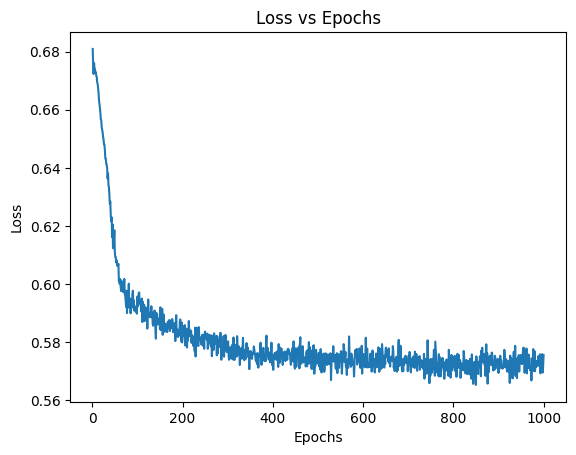

Final F1 Score: 0.49240121580547114


In [62]:
torch.manual_seed(42)

class WaterDataset(Dataset):
  def __init__(self, csv_file):
    data = pd.read_csv(csv_file)

    self.X = data.drop(columns=["Potability"]).values
    self.y = data["Potability"].values

    self.X = np.array(self.X, dtype=np.float32)
    self.y = np.array(self.y, dtype=np.float32)

    self.data = list(zip(self.X, self.y))

  def __len__(self):
    return len(self.data)

  def __getitem__(self, idx):
    return self.data[idx]

class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(9, 16)
    self.fc2 = nn.Linear(16, 8)
    self.fc3 = nn.Linear(8, 1)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.sigmoid(self.fc3(x))
    return x


def train_model(dataloader_train, optimizer, net, num_epochs=10, create_plot = False ):
  criterion = nn.BCELoss()
  loss_list = []
  net.train()

  for epoch in range(num_epochs):
    epoch_loss = 0

    for features, labels in tqdm(dataloader_train , desc=f"Epoch {epoch+1}/{num_epochs}"):
      optimizer.zero_grad()
      outputs = net(features)
      labels = labels.view(-1, 1)
      loss = criterion(outputs, labels)

      loss.backward()
      optimizer.step()
      epoch_loss += loss.item()

    epoch_loss /= len(dataloader_train)
    loss_list.append(epoch_loss)


    print(f"Loss: {epoch_loss}")

  if create_plot:
    plt.plot(range(1 , num_epochs+1) , loss_list)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss vs Epochs')
    plt.show()

  return loss_list

lr = 0.001

file_path_train = '/content/drive/My Drive/DL_24-25/Data/water_train.csv'
dataset_train = WaterDataset(file_path_train)
dataloader_train = DataLoader(dataset_train, batch_size=2, shuffle=True)

file_path_test = '/content/drive/My Drive/DL_24-25/Data/water_test.csv'
dataset_test = WaterDataset(file_path_test)
dataloader_test = DataLoader(dataset_test, batch_size=2, shuffle=True)


net_SGD = Net()
net_RMSprop = Net()
net_Adam = Net()
net_AdamW = Net()

train_model(dataloader_train = dataloader_train , optimizer=torch.optim.SGD(net_SGD.parameters(), lr=lr), net=net_SGD)
train_model(dataloader_train = dataloader_train , optimizer=torch.optim.RMSprop(net_RMSprop.parameters(), lr=lr), net=net_RMSprop)
train_model(dataloader_train = dataloader_train , optimizer=torch.optim.Adam(net_Adam.parameters(), lr=lr), net=net_Adam)
train_model(dataloader_train = dataloader_train , optimizer=torch.optim.AdamW(net_AdamW.parameters(), lr=lr), net=net_AdamW)

def eval_f1(dataloader, net):
  net.eval()
  y_true = []
  y_pred = []
  with torch.no_grad():
    for features, labels in dataloader:
      outputs = net(features)
      outputs = (outputs > 0.5).float()
      y_true.extend(labels.numpy())
      y_pred.extend(outputs.numpy())
  f1 = f1_score(y_true, y_pred)
  return f1


net_final = Net()
train_model(dataloader_train = dataloader_train , optimizer=torch.optim.AdamW(net_final.parameters(), lr=lr), net=net_final, num_epochs=1000, create_plot=True)

final_net_f1 = eval_f1(dataloader_test, net_final)
print("Final F1 Score:", final_net_f1)

# I would consider 0.5 f1 score for binary classification a bad score






# Task 3

Epoch 1/100: 100%|██████████| 754/754 [00:01<00:00, 379.20it/s]


Loss: 0.832388562883994


Epoch 2/100: 100%|██████████| 754/754 [00:01<00:00, 536.86it/s]


Loss: 0.7201026943104653


Epoch 3/100: 100%|██████████| 754/754 [00:01<00:00, 564.32it/s]


Loss: 0.6866232099836638


Epoch 4/100: 100%|██████████| 754/754 [00:01<00:00, 555.63it/s]


Loss: 0.6801878315463307


Epoch 5/100: 100%|██████████| 754/754 [00:01<00:00, 558.49it/s]


Loss: 0.6778956156826779


Epoch 6/100: 100%|██████████| 754/754 [00:01<00:00, 565.02it/s]


Loss: 0.677413452722982


Epoch 7/100: 100%|██████████| 754/754 [00:01<00:00, 566.95it/s]


Loss: 0.6782016867193682


Epoch 8/100: 100%|██████████| 754/754 [00:01<00:00, 556.92it/s]


Loss: 0.6757435471372832


Epoch 9/100: 100%|██████████| 754/754 [00:01<00:00, 442.82it/s]


Loss: 0.6747792284115556


Epoch 10/100: 100%|██████████| 754/754 [00:01<00:00, 394.24it/s]


Loss: 0.6726067502555544


Epoch 11/100: 100%|██████████| 754/754 [00:01<00:00, 490.38it/s]


Loss: 0.6721586513108221


Epoch 12/100: 100%|██████████| 754/754 [00:01<00:00, 564.11it/s]


Loss: 0.6731188589761364


Epoch 13/100: 100%|██████████| 754/754 [00:01<00:00, 568.90it/s]


Loss: 0.6737582900954178


Epoch 14/100: 100%|██████████| 754/754 [00:01<00:00, 557.80it/s]


Loss: 0.6737057520793035


Epoch 15/100: 100%|██████████| 754/754 [00:01<00:00, 563.61it/s]


Loss: 0.6744398504732775


Epoch 16/100: 100%|██████████| 754/754 [00:01<00:00, 567.68it/s]


Loss: 0.6729469446351737


Epoch 17/100: 100%|██████████| 754/754 [00:01<00:00, 563.46it/s]


Loss: 0.6750935686045679


Epoch 18/100: 100%|██████████| 754/754 [00:01<00:00, 489.95it/s]


Loss: 0.6741428107260393


Epoch 19/100: 100%|██████████| 754/754 [00:01<00:00, 411.68it/s]


Loss: 0.6744947038215414


Epoch 20/100: 100%|██████████| 754/754 [00:01<00:00, 417.01it/s]


Loss: 0.6749691396398316


Epoch 21/100: 100%|██████████| 754/754 [00:01<00:00, 563.74it/s]


Loss: 0.6734642345329811


Epoch 22/100: 100%|██████████| 754/754 [00:01<00:00, 542.60it/s]


Loss: 0.6733123725304869


Epoch 23/100: 100%|██████████| 754/754 [00:01<00:00, 557.21it/s]


Loss: 0.6742952834389886


Epoch 24/100: 100%|██████████| 754/754 [00:01<00:00, 569.40it/s]


Loss: 0.6728789998460512


Epoch 25/100: 100%|██████████| 754/754 [00:01<00:00, 550.23it/s]


Loss: 0.6735235817868767


Epoch 26/100: 100%|██████████| 754/754 [00:01<00:00, 556.90it/s]


Loss: 0.6717604035091653


Epoch 27/100: 100%|██████████| 754/754 [00:01<00:00, 567.32it/s]


Loss: 0.6726050550804846


Epoch 28/100: 100%|██████████| 754/754 [00:01<00:00, 418.55it/s]


Loss: 0.6743123045966859


Epoch 29/100: 100%|██████████| 754/754 [00:01<00:00, 386.11it/s]


Loss: 0.6756517188302402


Epoch 30/100: 100%|██████████| 754/754 [00:01<00:00, 568.03it/s]


Loss: 0.6752975244737114


Epoch 31/100: 100%|██████████| 754/754 [00:01<00:00, 565.30it/s]


Loss: 0.6734689614817065


Epoch 32/100: 100%|██████████| 754/754 [00:01<00:00, 566.57it/s]


Loss: 0.6730143312433986


Epoch 33/100: 100%|██████████| 754/754 [00:01<00:00, 547.56it/s]


Loss: 0.6739085930095744


Epoch 34/100: 100%|██████████| 754/754 [00:01<00:00, 563.68it/s]


Loss: 0.6739228591520527


Epoch 35/100: 100%|██████████| 754/754 [00:01<00:00, 549.76it/s]


Loss: 0.6728765185853215


Epoch 36/100: 100%|██████████| 754/754 [00:01<00:00, 554.16it/s]


Loss: 0.6739016103333441


Epoch 37/100: 100%|██████████| 754/754 [00:01<00:00, 450.66it/s]


Loss: 0.6737034135060854


Epoch 38/100: 100%|██████████| 754/754 [00:01<00:00, 394.39it/s]


Loss: 0.6727074105638408


Epoch 39/100: 100%|██████████| 754/754 [00:01<00:00, 482.13it/s]


Loss: 0.6713616380799038


Epoch 40/100: 100%|██████████| 754/754 [00:01<00:00, 553.83it/s]


Loss: 0.6710535118687374


Epoch 41/100: 100%|██████████| 754/754 [00:01<00:00, 549.88it/s]


Loss: 0.6739683454801929


Epoch 42/100: 100%|██████████| 754/754 [00:01<00:00, 485.41it/s]


Loss: 0.6738060318348579


Epoch 43/100: 100%|██████████| 754/754 [00:01<00:00, 567.35it/s]


Loss: 0.6742881218697727


Epoch 44/100: 100%|██████████| 754/754 [00:01<00:00, 560.30it/s]


Loss: 0.6746470627797377


Epoch 45/100: 100%|██████████| 754/754 [00:01<00:00, 559.00it/s]


Loss: 0.6729970296118557


Epoch 46/100: 100%|██████████| 754/754 [00:01<00:00, 451.31it/s]


Loss: 0.6739601952960067


Epoch 47/100: 100%|██████████| 754/754 [00:01<00:00, 393.55it/s]


Loss: 0.6741525322119817


Epoch 48/100: 100%|██████████| 754/754 [00:01<00:00, 459.75it/s]


Loss: 0.6730006423331698


Epoch 49/100: 100%|██████████| 754/754 [00:01<00:00, 566.56it/s]


Loss: 0.6737080416407446


Epoch 50/100: 100%|██████████| 754/754 [00:01<00:00, 556.81it/s]


Loss: 0.6728069253404197


Epoch 51/100: 100%|██████████| 754/754 [00:01<00:00, 561.17it/s]


Loss: 0.6735974841946316


Epoch 52/100: 100%|██████████| 754/754 [00:01<00:00, 552.69it/s]


Loss: 0.6738177957680245


Epoch 53/100: 100%|██████████| 754/754 [00:01<00:00, 559.88it/s]


Loss: 0.6723764248646855


Epoch 54/100: 100%|██████████| 754/754 [00:01<00:00, 561.00it/s]


Loss: 0.6735563790450362


Epoch 55/100: 100%|██████████| 754/754 [00:01<00:00, 477.86it/s]


Loss: 0.6736016986540837


Epoch 56/100: 100%|██████████| 754/754 [00:01<00:00, 406.23it/s]


Loss: 0.6733020944841976


Epoch 57/100: 100%|██████████| 754/754 [00:01<00:00, 420.86it/s]


Loss: 0.6725083822755029


Epoch 58/100: 100%|██████████| 754/754 [00:01<00:00, 555.50it/s]


Loss: 0.6725036427576283


Epoch 59/100: 100%|██████████| 754/754 [00:01<00:00, 570.59it/s]


Loss: 0.672950106843397


Epoch 60/100: 100%|██████████| 754/754 [00:01<00:00, 566.44it/s]


Loss: 0.6731389561761911


Epoch 61/100: 100%|██████████| 754/754 [00:01<00:00, 556.57it/s]


Loss: 0.6725984931150228


Epoch 62/100: 100%|██████████| 754/754 [00:01<00:00, 557.04it/s]


Loss: 0.6728623990829175


Epoch 63/100: 100%|██████████| 754/754 [00:01<00:00, 563.30it/s]


Loss: 0.674390320396866


Epoch 64/100: 100%|██████████| 754/754 [00:01<00:00, 557.86it/s]


Loss: 0.674723874352655


Epoch 65/100: 100%|██████████| 754/754 [00:01<00:00, 415.86it/s]


Loss: 0.6740473506463301


Epoch 66/100: 100%|██████████| 754/754 [00:01<00:00, 383.05it/s]


Loss: 0.6734455730617837


Epoch 67/100: 100%|██████████| 754/754 [00:01<00:00, 548.01it/s]


Loss: 0.6736088812509329


Epoch 68/100: 100%|██████████| 754/754 [00:01<00:00, 550.43it/s]


Loss: 0.6732002273794827


Epoch 69/100: 100%|██████████| 754/754 [00:01<00:00, 548.80it/s]


Loss: 0.6728550850238345


Epoch 70/100: 100%|██████████| 754/754 [00:01<00:00, 558.47it/s]


Loss: 0.6720452144228178


Epoch 71/100: 100%|██████████| 754/754 [00:01<00:00, 542.03it/s]


Loss: 0.6741669458640981


Epoch 72/100: 100%|██████████| 754/754 [00:01<00:00, 557.20it/s]


Loss: 0.6740198152767253


Epoch 73/100: 100%|██████████| 754/754 [00:01<00:00, 558.30it/s]


Loss: 0.6728835906289933


Epoch 74/100: 100%|██████████| 754/754 [00:01<00:00, 437.38it/s]


Loss: 0.672857338142648


Epoch 75/100: 100%|██████████| 754/754 [00:01<00:00, 391.74it/s]


Loss: 0.6728344611843322


Epoch 76/100: 100%|██████████| 754/754 [00:01<00:00, 483.36it/s]


Loss: 0.6733401882553607


Epoch 77/100: 100%|██████████| 754/754 [00:01<00:00, 564.25it/s]


Loss: 0.6742926393326777


Epoch 78/100: 100%|██████████| 754/754 [00:01<00:00, 555.60it/s]


Loss: 0.6717489466901168


Epoch 79/100: 100%|██████████| 754/754 [00:01<00:00, 552.70it/s]


Loss: 0.6732495185630075


Epoch 80/100: 100%|██████████| 754/754 [00:01<00:00, 550.99it/s]


Loss: 0.6724991547017894


Epoch 81/100: 100%|██████████| 754/754 [00:01<00:00, 558.62it/s]


Loss: 0.6717941376827756


Epoch 82/100: 100%|██████████| 754/754 [00:01<00:00, 548.09it/s]


Loss: 0.6729931143613962


Epoch 83/100: 100%|██████████| 754/754 [00:01<00:00, 502.76it/s]


Loss: 0.6727721959905852


Epoch 84/100: 100%|██████████| 754/754 [00:01<00:00, 409.22it/s]


Loss: 0.6741989820958448


Epoch 85/100: 100%|██████████| 754/754 [00:01<00:00, 416.92it/s]


Loss: 0.6742016802732129


Epoch 86/100: 100%|██████████| 754/754 [00:01<00:00, 553.47it/s]


Loss: 0.672734948542137


Epoch 87/100: 100%|██████████| 754/754 [00:01<00:00, 550.58it/s]


Loss: 0.672648345681021


Epoch 88/100: 100%|██████████| 754/754 [00:01<00:00, 540.91it/s]


Loss: 0.6710042470488055


Epoch 89/100: 100%|██████████| 754/754 [00:01<00:00, 560.78it/s]


Loss: 0.673467735317721


Epoch 90/100: 100%|██████████| 754/754 [00:01<00:00, 567.55it/s]


Loss: 0.6740199759088713


Epoch 91/100: 100%|██████████| 754/754 [00:01<00:00, 555.37it/s]


Loss: 0.6745216678086896


Epoch 92/100: 100%|██████████| 754/754 [00:01<00:00, 551.69it/s]


Loss: 0.6734710031384182


Epoch 93/100: 100%|██████████| 754/754 [00:01<00:00, 397.38it/s]


Loss: 0.6731903560123645


Epoch 94/100: 100%|██████████| 754/754 [00:01<00:00, 395.03it/s]


Loss: 0.6736504331982104


Epoch 95/100: 100%|██████████| 754/754 [00:01<00:00, 548.34it/s]


Loss: 0.673238553087022


Epoch 96/100: 100%|██████████| 754/754 [00:01<00:00, 563.44it/s]


Loss: 0.6729213034126423


Epoch 97/100: 100%|██████████| 754/754 [00:01<00:00, 569.18it/s]


Loss: 0.6726750270599395


Epoch 98/100: 100%|██████████| 754/754 [00:01<00:00, 546.21it/s]


Loss: 0.67450340870837


Epoch 99/100: 100%|██████████| 754/754 [00:01<00:00, 569.84it/s]


Loss: 0.6732459401894627


Epoch 100/100: 100%|██████████| 754/754 [00:01<00:00, 557.10it/s]


Loss: 0.6740354611797738


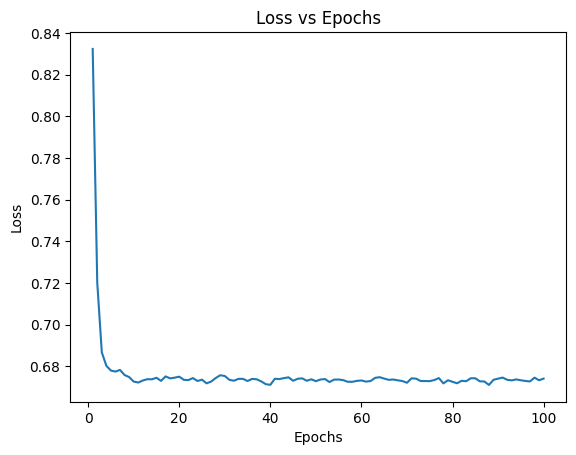

F1 Score: 0.0


In [98]:
torch.manual_seed(42)

class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(9, 16)
    self.bn1 = nn.BatchNorm1d(16)
    self.fc2 = nn.Linear(16, 8)
    self.bn2 = nn.BatchNorm1d(8)
    self.fc3 = nn.Linear(8, 1)

    init.kaiming_uniform_(self.fc1.weight)
    init.kaiming_uniform_(self.fc2.weight)
    init.kaiming_uniform_(self.fc3.weight)

  def forward(self, x):
    x = F.elu(self.fc1(x))
    x = self.bn1(x)
    x = F.elu(self.fc2(x))
    x = self.bn2(x)
    x = self.fc3(x)
    x = F.sigmoid(x)
    return x

net = Net()
train_model(dataloader_train = dataloader_train , optimizer=torch.optim.AdamW(net.parameters(), lr=lr), net=net, num_epochs=100, create_plot=True)


net_f1 = eval_f1(dataloader_test, net)
print("F1 Score:", net_f1)

#Answer: B


In [97]:
file_path_test = '/content/drive/My Drive/DL_24-25/Data/water_test.csv'
dataset_test = WaterDataset(file_path_test)
dataloader_test = DataLoader(dataset_test, batch_size=1, shuffle=True)

def eval_f1(dataloader, net):
  net.eval()
  y_true = []
  y_pred = []
  with torch.no_grad():
    for features, labels in dataloader:
      outputs = net(features)
      #print("outputs:", outputs)
      outputs = (outputs > 0.5).float()

      y_true.extend(labels.numpy())
      y_pred.extend(outputs.flatten().numpy())


  f1 = f1_score(y_true, y_pred)
  #print(y_true)
  #print(y_pred)
  return f1


net_f1 = eval_f1(dataloader_test, net)
print("F1 Score:", net_f1)


F1 Score: 0.2809917355371901


# Task 4

Epoch 1/10: 100%|██████████| 754/754 [00:01<00:00, 583.52it/s]


Loss: 0.6809221211652857


Epoch 2/10: 100%|██████████| 754/754 [00:01<00:00, 593.94it/s]


Loss: 0.6769278764487577


Epoch 3/10: 100%|██████████| 754/754 [00:01<00:00, 472.43it/s]


Loss: 0.6753843284016895


Epoch 4/10: 100%|██████████| 754/754 [00:01<00:00, 430.28it/s]


Loss: 0.6732006805803162


Epoch 5/10: 100%|██████████| 754/754 [00:01<00:00, 509.34it/s]


Loss: 0.670732449947681


Epoch 6/10: 100%|██████████| 754/754 [00:01<00:00, 572.93it/s]


Loss: 0.6704009237355831


Epoch 7/10: 100%|██████████| 754/754 [00:01<00:00, 597.68it/s]


Loss: 0.6701084774590298


Epoch 8/10: 100%|██████████| 754/754 [00:01<00:00, 599.99it/s]


Loss: 0.6659564649789972


Epoch 9/10: 100%|██████████| 754/754 [00:01<00:00, 587.72it/s]


Loss: 0.6567138330492164


Epoch 10/10: 100%|██████████| 754/754 [00:01<00:00, 593.69it/s]


Loss: 0.6525855717750696


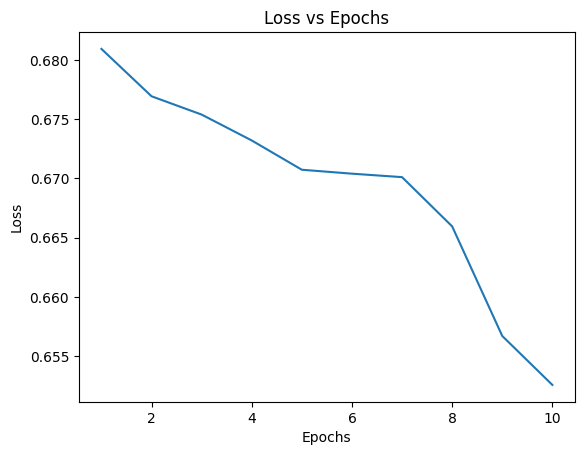

F1 Score: 0.5811001410437235


In [93]:
class NetV2(nn.Module):
  def __init__(self):
    super(NetV2, self).__init__()
    self.fc1 = nn.Linear(9, 64)
    self.fc2 = nn.Linear(64, 32)
    self.fc3 = nn.Linear(32, 16)
    self.fc4 = nn.Linear(16, 1)

    self.dropout = nn.Dropout(0.2)

    init.kaiming_uniform_(self.fc1.weight)
    init.kaiming_uniform_(self.fc2.weight)
    init.kaiming_uniform_(self.fc3.weight)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = self.dropout(x)
    x = F.relu(self.fc2(x))
    x = self.dropout(x)
    x = F.relu(self.fc3(x))
    x = self.fc4(x)
    x = torch.sigmoid(x)
    return x



net = NetV2()
train_model(dataloader_train = dataloader_train , optimizer=torch.optim.AdamW(net.parameters(), lr=0.001), net=net, num_epochs=10, create_plot=True)


net_f1 = eval_f1(dataloader_test, net)
print("F1 Score:", net_f1)

# Task 5

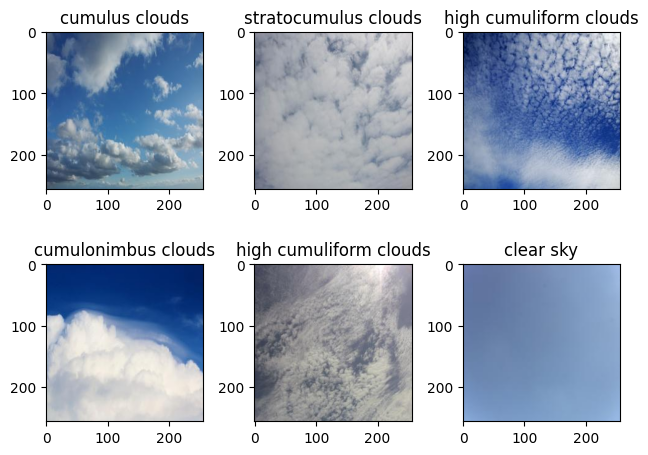

In [ ]:
dir_path = "/content/drive/My Drive/DL_24-25/Data/clouds/clouds_train/"

train_transforms = transforms.Compose([
  transforms.ToTensor(),
  #transforms.Resize((128, 128)),
])

dataset_train = ImageFolder(
  dir_path,
  transform=train_transforms,
)

dataloader_train = data.DataLoader(
  dataset_train,
  shuffle=True,
  batch_size=6,
)


images, labels = next(iter(dataloader_train))


for i in range(6):
  img = images[i]
  img = img.permute(1, 2, 0)  # [C, H, W] → [H, W, C]

  plt.subplot(2, 3, i + 1)
  plt.imshow(img)
  plt.title(dataset_train.classes[labels[i]])

plt.tight_layout()
plt.show()

# Task 6

In [ ]:
# I am also changing the criterion
def train_model(dataloader_train, optimizer, net, num_epochs=10, create_plot = False ):
  criterion = nn.CrossEntropyLoss()
  loss_list = []
  net.train()

  for epoch in range(num_epochs):
    epoch_loss = 0

    for features, labels in tqdm(dataloader_train , desc=f"Epoch {epoch+1}/{num_epochs}"):
      optimizer.zero_grad()
      outputs = net(features)
      loss = criterion(outputs, labels)

      loss.backward()
      optimizer.step()
      epoch_loss += loss.item()

    epoch_loss /= len(dataloader_train)
    loss_list.append(epoch_loss)


    print(f"Loss: {epoch_loss}")

  if create_plot:
    plt.plot(range(1 , num_epochs+1) , loss_list)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss vs Epochs')
    plt.show()

  return loss_list


def eval_f1(dataloader, net):
  net.eval()
  y_true = []
  y_pred = []
  with torch.no_grad():
    for features, labels in dataloader:
      outputs = net(features)
      outputs = (outputs > 0.5).float()
      y_true.extend(labels.numpy())
      y_pred.extend(outputs.numpy())
  f1 = f1_score(y_true, y_pred)
  return f1


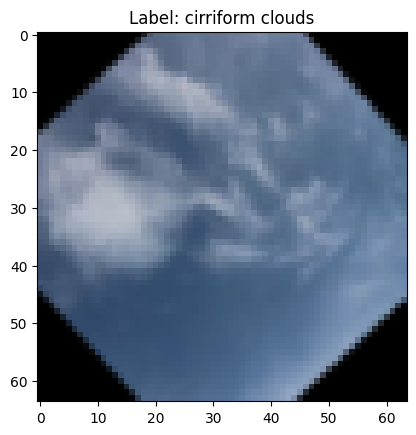

CNN_Model(
  (feature_extractor): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ELU(alpha=1.0)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ELU(alpha=1.0)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Linear(in_features=16384, out_features=7, bias=True)
)


Epoch 1/20: 100%|██████████| 30/30 [02:21<00:00,  4.70s/it]


Loss: 1.9363412221272787


Epoch 2/20: 100%|██████████| 30/30 [00:06<00:00,  4.91it/s]


Loss: 1.5842897216478984


Epoch 3/20: 100%|██████████| 30/30 [00:06<00:00,  4.47it/s]


Loss: 1.4881290316581726


Epoch 4/20: 100%|██████████| 30/30 [00:05<00:00,  5.12it/s]


Loss: 1.4568626542886098


Epoch 5/20: 100%|██████████| 30/30 [00:06<00:00,  4.35it/s]


Loss: 1.4851901610692342


Epoch 6/20: 100%|██████████| 30/30 [00:05<00:00,  5.17it/s]


Loss: 1.3956328292687734


Epoch 7/20: 100%|██████████| 30/30 [00:06<00:00,  4.31it/s]


Loss: 1.3763840834299723


Epoch 8/20: 100%|██████████| 30/30 [00:05<00:00,  5.12it/s]


Loss: 1.31624027689298


Epoch 9/20: 100%|██████████| 30/30 [00:06<00:00,  4.49it/s]


Loss: 1.2267028550306955


Epoch 10/20: 100%|██████████| 30/30 [00:07<00:00,  4.08it/s]


Loss: 1.1876482705275218


Epoch 11/20: 100%|██████████| 30/30 [00:06<00:00,  4.55it/s]


Loss: 1.2232056339581807


Epoch 12/20: 100%|██████████| 30/30 [00:06<00:00,  4.77it/s]


Loss: 1.0877381185690562


Epoch 13/20: 100%|██████████| 30/30 [00:06<00:00,  4.86it/s]


Loss: 1.0884189387162526


Epoch 14/20: 100%|██████████| 30/30 [00:06<00:00,  4.45it/s]


Loss: 1.1284001926581064


Epoch 15/20: 100%|██████████| 30/30 [00:06<00:00,  4.98it/s]


Loss: 1.0676343361536662


Epoch 16/20: 100%|██████████| 30/30 [00:07<00:00,  4.24it/s]


Loss: 1.025098979473114


Epoch 17/20: 100%|██████████| 30/30 [00:05<00:00,  5.16it/s]


Loss: 0.9964891831080119


Epoch 18/20: 100%|██████████| 30/30 [00:06<00:00,  4.33it/s]


Loss: 1.03997194369634


Epoch 19/20: 100%|██████████| 30/30 [00:06<00:00,  4.99it/s]


Loss: 1.0809499323368073


Epoch 20/20: 100%|██████████| 30/30 [00:06<00:00,  4.33it/s]


Loss: 1.0373815596103668


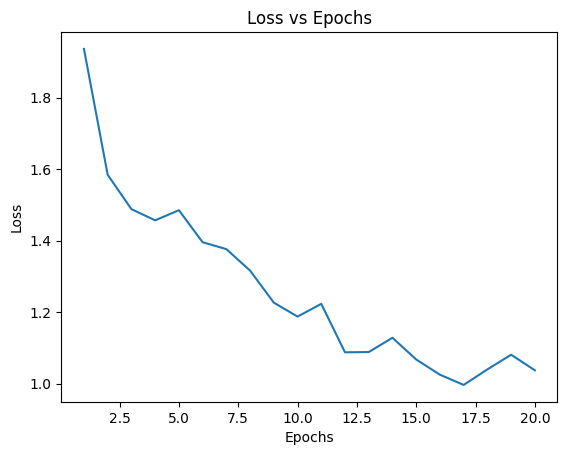

[1.9363412221272787,
 1.5842897216478984,
 1.4881290316581726,
 1.4568626542886098,
 1.4851901610692342,
 1.3956328292687734,
 1.3763840834299723,
 1.31624027689298,
 1.2267028550306955,
 1.1876482705275218,
 1.2232056339581807,
 1.0877381185690562,
 1.0884189387162526,
 1.1284001926581064,
 1.0676343361536662,
 1.025098979473114,
 0.9964891831080119,
 1.03997194369634,
 1.0809499323368073,
 1.0373815596103668]

In [ ]:
dir_path = "/content/drive/My Drive/DL_24-25/Data/clouds/clouds_train/"

train_transforms = transforms.Compose([
  transforms.RandomHorizontalFlip(),
  transforms.RandomVerticalFlip(),
  transforms.RandomRotation(degrees=(0, 45)),
  transforms.RandomAutocontrast(),
  transforms.Resize((64, 64)),
  transforms.ToTensor(),
])

dataset_train = ImageFolder(root=dir_path, transform=train_transforms)
dataloader_train = DataLoader(dataset_train, shuffle=True, batch_size=16)

img, label = dataset_train[0]
plt.imshow(img.permute(1, 2, 0))
plt.title(f"Label: {dataset_train.classes[label]}")
plt.show()

num_classes = len(dataset_train.classes)
class CNN_Model(nn.Module):
  def __init__(self):
    super(CNN_Model,self).__init__()
    self.feature_extractor = nn.Sequential(
      nn.Conv2d(3, 32, kernel_size=3, padding=1),
      nn.ELU(),
      nn.MaxPool2d(kernel_size=2),

      nn.Conv2d(32, 64, kernel_size=3, padding=1),
      nn.ELU(),
      nn.MaxPool2d(kernel_size=2)
    )


    self.classifier = nn.Linear(64 * 16 * 16, num_classes)

  def forward(self, x):
    x = self.feature_extractor(x)
    x = x.view(x.size(0), -1)
    x = self.classifier(x)
    return x


net = CNN_Model()
print(net)

train_model(dataloader_train = dataloader_train , optimizer=torch.optim.AdamW(net.parameters(), lr=0.001), net=net, num_epochs=20, create_plot=True)

# Task 7

Epoch 1/20: 100%|██████████| 30/30 [00:10<00:00,  2.79it/s]


Loss: 0.6423383076985677


Epoch 2/20: 100%|██████████| 30/30 [00:06<00:00,  4.49it/s]


Loss: 0.562940247853597


Epoch 3/20: 100%|██████████| 30/30 [00:07<00:00,  4.13it/s]


Loss: 0.5547464239100616


Epoch 4/20: 100%|██████████| 30/30 [00:07<00:00,  4.21it/s]


Loss: 0.5579551125566165


Epoch 5/20: 100%|██████████| 30/30 [00:07<00:00,  4.27it/s]


Loss: 0.5825397700071335


Epoch 6/20: 100%|██████████| 30/30 [00:06<00:00,  4.42it/s]


Loss: 0.4838851568599542


Epoch 7/20: 100%|██████████| 30/30 [00:07<00:00,  4.17it/s]


Loss: 0.5288139695922534


Epoch 8/20: 100%|██████████| 30/30 [00:06<00:00,  4.55it/s]


Loss: 0.4731056189785401


Epoch 9/20: 100%|██████████| 30/30 [00:07<00:00,  4.24it/s]


Loss: 0.4779887522260348


Epoch 10/20: 100%|██████████| 30/30 [00:06<00:00,  4.74it/s]


Loss: 0.4928415780266126


Epoch 11/20: 100%|██████████| 30/30 [00:07<00:00,  4.23it/s]


Loss: 0.5728556334972381


Epoch 12/20: 100%|██████████| 30/30 [00:07<00:00,  4.22it/s]


Loss: 0.5493706862131754


Epoch 13/20: 100%|██████████| 30/30 [00:07<00:00,  4.15it/s]


Loss: 0.5682503372430802


Epoch 14/20: 100%|██████████| 30/30 [00:06<00:00,  4.87it/s]


Loss: 0.5146855180462201


Epoch 15/20: 100%|██████████| 30/30 [00:07<00:00,  4.12it/s]


Loss: 0.47843912889560064


Epoch 16/20: 100%|██████████| 30/30 [00:06<00:00,  4.75it/s]


Loss: 0.5393860270579656


Epoch 17/20: 100%|██████████| 30/30 [00:07<00:00,  4.22it/s]


Loss: 0.4734697351853053


Epoch 18/20: 100%|██████████| 30/30 [00:06<00:00,  4.89it/s]


Loss: 0.4831716780861219


Epoch 19/20: 100%|██████████| 30/30 [00:07<00:00,  4.18it/s]


Loss: 0.5124385043978691


Epoch 20/20: 100%|██████████| 30/30 [00:06<00:00,  4.92it/s]


Loss: 0.42860731333494184


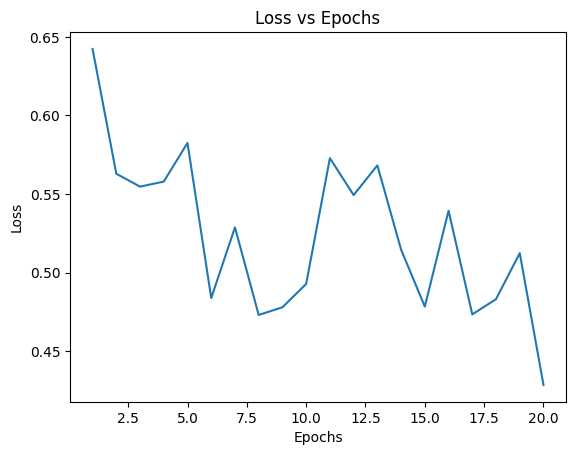


Total time taken to train the model in seconds: 140.79931640625

Precision: 0.6679900090003276
Recall: 0.7667934941215401
F1: 0.6685166158854171

Per class F1 score
{'cirriform clouds': np.float64(0.5753),
 'clear sky': np.float64(0.8889),
 'cumulonimbus clouds': np.float64(0.4681),
 'cumulus clouds': np.float64(0.5059),
 'high cumuliform clouds': np.float64(0.7143),
 'stratiform clouds': np.float64(0.8605),
 'stratocumulus clouds': np.float64(0.6667)}


In [ ]:
test_dir_path = "/content/drive/My Drive/DL_24-25/Data/clouds/clouds_test/"

start_time = time.time()
losses = train_model(dataloader_train=dataloader_train, optimizer=torch.optim.AdamW(net.parameters(), lr=0.001), net=net, num_epochs=20, create_plot=True)
end_time = time.time()

print(f"\nTotal time taken to train the model in seconds: {end_time - start_time}")



test_transforms = transforms.Compose([
  transforms.Resize((64, 64)),
  transforms.ToTensor(),
])

dataset_test = ImageFolder(root=test_dir_path, transform=test_transforms)
dataloader_test = DataLoader(dataset_test, batch_size=16, shuffle=True)




net.eval()
all_preds = []
all_labels = []

with torch.no_grad():
  for features, labels in dataloader_test:
    outputs = net(features)
    preds = outputs.argmax(dim=1)
    all_preds.extend(preds.tolist())
    all_labels.extend(labels.tolist())


precision = precision_score(all_labels, all_preds, average='macro')
recall = recall_score(all_labels, all_preds, average='macro')
f1 = f1_score(all_labels, all_preds, average='macro')
f1_per_class = f1_score(all_labels, all_preds, average=None)

print(f"\nPrecision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")


f1_dict = {
  dataset_test.classes[i]: round(score, 4)
  for i, score in enumerate(f1_per_class)
}

print("\nPer class F1 score")
pprint(f1_dict)

# Model performance is mediocre, there is 2 classes that have better f1 than the rest so i would assume this is bias?


# Task 8

Epoch 1/100: 100%|██████████| 30/30 [00:07<00:00,  4.20it/s]


Loss: 0.5435656815767288


Epoch 2/100: 100%|██████████| 30/30 [00:06<00:00,  4.90it/s]


Loss: 0.5090524315834045


Epoch 3/100: 100%|██████████| 30/30 [00:06<00:00,  4.40it/s]


Loss: 0.4591547526419163


Epoch 4/100: 100%|██████████| 30/30 [00:06<00:00,  4.96it/s]


Loss: 0.44780993883808456


Epoch 5/100: 100%|██████████| 30/30 [00:07<00:00,  4.26it/s]


Loss: 0.4746507433553537


Epoch 6/100: 100%|██████████| 30/30 [00:06<00:00,  4.92it/s]


Loss: 0.49099202652772267


Epoch 7/100: 100%|██████████| 30/30 [00:07<00:00,  4.28it/s]


Loss: 0.4200934797525406


Epoch 8/100: 100%|██████████| 30/30 [00:06<00:00,  4.99it/s]


Loss: 0.42064616580804187


Epoch 9/100: 100%|██████████| 30/30 [00:07<00:00,  4.27it/s]


Loss: 0.4375905717412631


Epoch 10/100: 100%|██████████| 30/30 [00:06<00:00,  4.98it/s]


Loss: 0.5170513734221458


Epoch 11/100: 100%|██████████| 30/30 [00:08<00:00,  3.65it/s]


Loss: 0.601518373688062


Epoch 12/100: 100%|██████████| 30/30 [00:06<00:00,  4.92it/s]


Loss: 0.4545462024708589


Epoch 13/100: 100%|██████████| 30/30 [00:06<00:00,  4.51it/s]


Loss: 0.4500345791379611


Epoch 14/100: 100%|██████████| 30/30 [00:06<00:00,  4.64it/s]


Loss: 0.5177502363920212


Epoch 15/100: 100%|██████████| 30/30 [00:07<00:00,  4.28it/s]


Loss: 0.37299408664306005


Epoch 16/100: 100%|██████████| 30/30 [00:06<00:00,  4.56it/s]


Loss: 0.4172613278031349


Epoch 17/100: 100%|██████████| 30/30 [00:06<00:00,  4.77it/s]


Loss: 0.5534577528635661


Epoch 18/100: 100%|██████████| 30/30 [00:06<00:00,  4.36it/s]


Loss: 0.5218226549526056


Epoch 19/100: 100%|██████████| 30/30 [00:06<00:00,  4.76it/s]


Loss: 0.4160413533449173


Epoch 20/100: 100%|██████████| 30/30 [00:06<00:00,  4.36it/s]


Loss: 0.42807300115625063


Epoch 21/100: 100%|██████████| 30/30 [00:06<00:00,  4.80it/s]


Loss: 0.4956047629316648


Epoch 22/100: 100%|██████████| 30/30 [00:07<00:00,  4.21it/s]


Loss: 0.4492075433333715


Epoch 23/100: 100%|██████████| 30/30 [00:06<00:00,  4.86it/s]


Loss: 0.4796825014054775


Epoch 24/100: 100%|██████████| 30/30 [00:07<00:00,  4.18it/s]


Loss: 0.37504234711329143


Epoch 25/100: 100%|██████████| 30/30 [00:06<00:00,  4.94it/s]


Loss: 0.4706982950369517


Epoch 26/100: 100%|██████████| 30/30 [00:07<00:00,  4.21it/s]


Loss: 0.43021867871284486


Epoch 27/100: 100%|██████████| 30/30 [00:06<00:00,  4.90it/s]


Loss: 0.36280047968029977


Epoch 28/100: 100%|██████████| 30/30 [00:07<00:00,  4.10it/s]


Loss: 0.3968960334857305


Epoch 29/100: 100%|██████████| 30/30 [00:06<00:00,  4.78it/s]


Loss: 0.3940475548307101


Epoch 30/100: 100%|██████████| 30/30 [00:07<00:00,  4.17it/s]


Loss: 0.42652781307697296


Epoch 31/100: 100%|██████████| 30/30 [00:06<00:00,  4.44it/s]


Loss: 0.46783281713724134


Epoch 32/100: 100%|██████████| 30/30 [00:07<00:00,  4.24it/s]


Loss: 0.4857901317377885


Epoch 33/100: 100%|██████████| 30/30 [00:06<00:00,  4.77it/s]


Loss: 0.46375869363546374


Epoch 34/100: 100%|██████████| 30/30 [00:07<00:00,  4.18it/s]


Loss: 0.4374489143490791


Epoch 35/100: 100%|██████████| 30/30 [00:06<00:00,  4.83it/s]


Loss: 0.3568945643802484


Epoch 36/100: 100%|██████████| 30/30 [00:07<00:00,  4.22it/s]


Loss: 0.3644487972060839


Epoch 37/100: 100%|██████████| 30/30 [00:06<00:00,  4.85it/s]


Loss: 0.3614112007121245


Epoch 38/100: 100%|██████████| 30/30 [00:06<00:00,  4.48it/s]


Loss: 0.30286979749798776


Epoch 39/100: 100%|██████████| 30/30 [00:06<00:00,  4.60it/s]


Loss: 0.352284053961436


Epoch 40/100: 100%|██████████| 30/30 [00:06<00:00,  4.50it/s]


Loss: 0.45137685164809227


Epoch 41/100: 100%|██████████| 30/30 [00:06<00:00,  4.47it/s]


Loss: 0.37350080385804174


Epoch 42/100: 100%|██████████| 30/30 [00:06<00:00,  4.78it/s]


Loss: 0.3369822159409523


Epoch 43/100: 100%|██████████| 30/30 [00:06<00:00,  4.43it/s]


Loss: 0.4397907604773839


Epoch 44/100: 100%|██████████| 30/30 [00:06<00:00,  4.87it/s]


Loss: 0.35265988086660705


Epoch 45/100: 100%|██████████| 30/30 [00:07<00:00,  4.23it/s]


Loss: 0.3725496103366216


Epoch 46/100: 100%|██████████| 30/30 [00:05<00:00,  5.07it/s]


Loss: 0.40494196365276974


Epoch 47/100: 100%|██████████| 30/30 [00:07<00:00,  4.28it/s]


Loss: 0.3405699143807093


Epoch 48/100: 100%|██████████| 30/30 [00:06<00:00,  4.98it/s]


Loss: 0.3742883046468099


Epoch 49/100: 100%|██████████| 30/30 [00:07<00:00,  4.29it/s]


Loss: 0.3441551790883144


Epoch 50/100: 100%|██████████| 30/30 [00:06<00:00,  4.89it/s]


Loss: 0.3507868488629659


Epoch 51/100: 100%|██████████| 30/30 [00:07<00:00,  4.28it/s]


Loss: 0.40323520501454674


Epoch 52/100: 100%|██████████| 30/30 [00:07<00:00,  4.23it/s]


Loss: 0.304607209811608


Epoch 53/100: 100%|██████████| 30/30 [00:07<00:00,  4.22it/s]


Loss: 0.36518024702866875


Epoch 54/100: 100%|██████████| 30/30 [00:06<00:00,  4.86it/s]


Loss: 0.419436044494311


Epoch 55/100: 100%|██████████| 30/30 [00:07<00:00,  4.22it/s]


Loss: 0.39857962417105836


Epoch 56/100: 100%|██████████| 30/30 [00:06<00:00,  4.80it/s]


Loss: 0.3787331238389015


Epoch 57/100: 100%|██████████| 30/30 [00:07<00:00,  4.19it/s]


Loss: 0.42685658236344654


Epoch 58/100: 100%|██████████| 30/30 [00:06<00:00,  4.82it/s]


Loss: 0.3643953544398149


Epoch 59/100: 100%|██████████| 30/30 [00:06<00:00,  4.46it/s]


Loss: 0.3158330865204334


Epoch 60/100: 100%|██████████| 30/30 [00:06<00:00,  4.75it/s]


Loss: 0.29190715501705805


Epoch 61/100: 100%|██████████| 30/30 [00:06<00:00,  4.50it/s]


Loss: 0.2741980756322543


Epoch 62/100: 100%|██████████| 30/30 [00:06<00:00,  4.61it/s]


Loss: 0.3364850697418054


Epoch 63/100: 100%|██████████| 30/30 [00:06<00:00,  4.81it/s]


Loss: 0.3531158092121283


Epoch 64/100: 100%|██████████| 30/30 [00:06<00:00,  4.37it/s]


Loss: 0.38541579246520996


Epoch 65/100: 100%|██████████| 30/30 [00:06<00:00,  4.99it/s]


Loss: 0.42221161114672817


Epoch 66/100: 100%|██████████| 30/30 [00:06<00:00,  4.29it/s]


Loss: 0.40593973472714423


Epoch 67/100: 100%|██████████| 30/30 [00:06<00:00,  4.97it/s]


Loss: 0.40190949812531473


Epoch 68/100: 100%|██████████| 30/30 [00:07<00:00,  3.86it/s]


Loss: 0.3692947619905074


Epoch 69/100: 100%|██████████| 30/30 [00:06<00:00,  4.84it/s]


Loss: 0.3686933368444443


Epoch 70/100: 100%|██████████| 30/30 [00:07<00:00,  4.23it/s]


Loss: 0.30280248237152896


Epoch 71/100: 100%|██████████| 30/30 [00:06<00:00,  4.86it/s]


Loss: 0.3815484317019582


Epoch 72/100: 100%|██████████| 30/30 [00:07<00:00,  4.26it/s]


Loss: 0.38366048311193784


Epoch 73/100: 100%|██████████| 30/30 [00:06<00:00,  4.93it/s]


Loss: 0.31910394380489987


Epoch 74/100: 100%|██████████| 30/30 [00:07<00:00,  4.25it/s]


Loss: 0.3063717149198055


Epoch 75/100: 100%|██████████| 30/30 [00:06<00:00,  4.93it/s]


Loss: 0.36777303318182625


Epoch 76/100: 100%|██████████| 30/30 [00:07<00:00,  4.28it/s]


Loss: 0.32507476198176544


Epoch 77/100: 100%|██████████| 30/30 [00:06<00:00,  4.98it/s]


Loss: 0.34693596058835585


Epoch 78/100: 100%|██████████| 30/30 [00:06<00:00,  4.37it/s]


Loss: 0.3093929097056389


Epoch 79/100: 100%|██████████| 30/30 [00:06<00:00,  4.91it/s]


Loss: 0.37235224395990374


Epoch 80/100: 100%|██████████| 30/30 [00:06<00:00,  4.63it/s]


Loss: 0.2904030141731103


Epoch 81/100: 100%|██████████| 30/30 [00:06<00:00,  4.59it/s]


Loss: 0.29633591969807943


Epoch 82/100: 100%|██████████| 30/30 [00:06<00:00,  4.57it/s]


Loss: 0.3814554587006569


Epoch 83/100: 100%|██████████| 30/30 [00:06<00:00,  4.41it/s]


Loss: 0.31995957444111506


Epoch 84/100: 100%|██████████| 30/30 [00:06<00:00,  4.83it/s]


Loss: 0.2962376451740662


Epoch 85/100: 100%|██████████| 30/30 [00:07<00:00,  4.25it/s]


Loss: 0.2968129631131887


Epoch 86/100: 100%|██████████| 30/30 [00:06<00:00,  4.83it/s]


Loss: 0.37325617000460626


Epoch 87/100: 100%|██████████| 30/30 [00:07<00:00,  4.25it/s]


Loss: 0.38437166015307106


Epoch 88/100: 100%|██████████| 30/30 [00:05<00:00,  5.07it/s]


Loss: 0.3543496377766132


Epoch 89/100: 100%|██████████| 30/30 [00:07<00:00,  4.19it/s]


Loss: 0.3685055740177631


Epoch 90/100: 100%|██████████| 30/30 [00:06<00:00,  5.00it/s]


Loss: 0.38474249467253685


Epoch 91/100: 100%|██████████| 30/30 [00:07<00:00,  4.19it/s]


Loss: 0.375160135080417


Epoch 92/100: 100%|██████████| 30/30 [00:06<00:00,  4.88it/s]


Loss: 0.3309564471244812


Epoch 93/100: 100%|██████████| 30/30 [00:07<00:00,  3.91it/s]


Loss: 0.2630771053334077


Epoch 94/100: 100%|██████████| 30/30 [00:06<00:00,  4.29it/s]


Loss: 0.2613774607578913


Epoch 95/100: 100%|██████████| 30/30 [00:06<00:00,  4.31it/s]


Loss: 0.2781986236572266


Epoch 96/100: 100%|██████████| 30/30 [00:06<00:00,  4.77it/s]


Loss: 0.2913012119630973


Epoch 97/100: 100%|██████████| 30/30 [00:06<00:00,  4.54it/s]


Loss: 0.31218874678015707


Epoch 98/100: 100%|██████████| 30/30 [00:06<00:00,  4.64it/s]


Loss: 0.28171094730496404


Epoch 99/100: 100%|██████████| 30/30 [00:06<00:00,  4.77it/s]


Loss: 0.30690564289689065


Epoch 100/100: 100%|██████████| 30/30 [00:06<00:00,  4.45it/s]


Loss: 0.37898083676894506


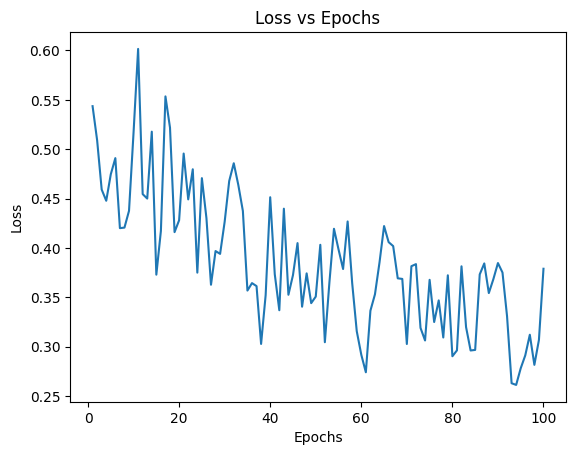


Total time taken to train the model in seconds: 663.3869824409485

Precision: 0.7217829282250534
Recall: 0.7207374619570489
F1: 0.7077896343091812

Per class F1 score
{'cirriform clouds': np.float64(0.6941),
 'clear sky': np.float64(0.976),
 'cumulonimbus clouds': np.float64(0.5217),
 'cumulus clouds': np.float64(0.7121),
 'high cumuliform clouds': np.float64(0.7077),
 'stratiform clouds': np.float64(0.8667),
 'stratocumulus clouds': np.float64(0.4762)}


In [ ]:
traint_dir_path = "/content/drive/My Drive/DL_24-25/Data/clouds/clouds_train/"
test_dir_path = "/content/drive/My Drive/DL_24-25/Data/clouds/clouds_test/"

train_transforms = transforms.Compose([
  transforms.RandomHorizontalFlip(),
  transforms.RandomVerticalFlip(),
  transforms.RandomRotation(degrees=(0, 45)),
  transforms.RandomAutocontrast(),
  transforms.ColorJitter(brightness=0.2, contrast=0.2),
  transforms.RandomResizedCrop(64, scale=(0.8, 1.0)),
  transforms.ToTensor()
])



class BetterCNN(nn.Module):
  def __init__(self, num_classes):
    super().__init__()
    self.features = nn.Sequential(
      nn.Conv2d(3, 32, kernel_size=3, padding=1),
      nn.BatchNorm2d(32),
      nn.ELU(),
      nn.MaxPool2d(2),

      nn.Conv2d(32, 64, kernel_size=3, padding=1),
      nn.BatchNorm2d(64),
      nn.ELU(),
      nn.MaxPool2d(2),

      nn.Conv2d(64, 128, kernel_size=3, padding=1),
      nn.BatchNorm2d(128),
      nn.ELU(),
      nn.MaxPool2d(2),
    )
    self.classifier = nn.Sequential(
      nn.Flatten(),
      nn.Linear(128 * 8 * 8, 256),
      nn.ELU(),
      nn.Dropout(0.4),
      nn.Linear(256, num_classes)
    )

  def forward(self, x):
    x = self.features(x)
    x = self.classifier(x)
    return x


batch_size = 32
lr = 0.001
epochs = 100

train_dataset = ImageFolder(root=traint_dir_path, transform=train_transforms)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = ImageFolder(root=test_dir_path, transform=test_transforms)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)


start_time = time.time()
losses = train_model(dataloader_train=dataloader_train, optimizer=torch.optim.AdamW(net.parameters(), lr=lr), net=net, num_epochs=epochs, create_plot=True)
end_time = time.time()

print(f"\nTotal time taken to train the model in seconds: {end_time - start_time}")



net.eval()
all_preds = []
all_labels = []

with torch.no_grad():
  for features, labels in dataloader_test:
    outputs = net(features)
    preds = outputs.argmax(dim=1)
    all_preds.extend(preds.tolist())
    all_labels.extend(labels.tolist())


precision = precision_score(all_labels, all_preds, average='macro')
recall = recall_score(all_labels, all_preds, average='macro')
f1 = f1_score(all_labels, all_preds, average='macro')
f1_per_class = f1_score(all_labels, all_preds, average=None)

print(f"\nPrecision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")


f1_dict = {
  dataset_test.classes[i]: round(score, 4)
  for i, score in enumerate(f1_per_class)
}

print("\nPer class F1 score")
pprint(f1_dict)



# Task 9

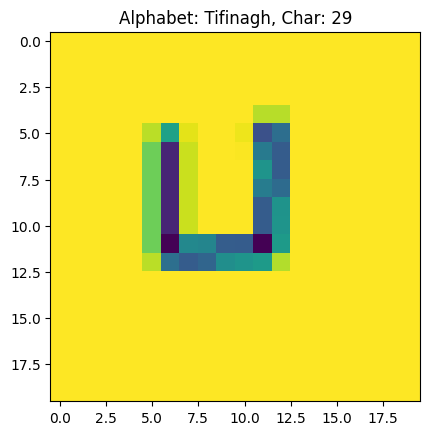

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])


In [96]:
class OmniglotDataset(Dataset):
  def __init__(self, root_dir, transform=None):
    self.dataset = ImageFolder(root=root_dir, transform=transform)
    self.class_to_alphabet = {}

    for path, class_idx in self.dataset.samples:
      alphabet_name = os.path.normpath(path).split(os.sep)[-3]
      self.class_to_alphabet[class_idx] = alphabet_name

    self.alphabet_names = sorted(set(self.class_to_alphabet.values()))
    self.alphabet_to_idx = {name: idx for idx, name in enumerate(self.alphabet_names)}
    self.alphabets_count = len(self.alphabet_names)


  def __len__(self):
    return len(self.dataset)

  def __getitem__(self, idx):
    image, character_label = self.dataset[idx]
    image_path, _ = self.dataset.samples[idx]

    alphabet_name = os.path.normpath(image_path).split(os.sep)[-3]
    alphabet_idx = self.alphabet_to_idx[alphabet_name]


    one_hot_alphabet = F.one_hot(torch.tensor(alphabet_idx), num_classes=self.alphabets_count).float()

    return image, one_hot_alphabet, character_label


transform = transforms.Compose([
  transforms.Resize((20, 20)),
  transforms.Grayscale(num_output_channels=1),
  transforms.ToTensor()#,
  #transforms.Lambda(lambda x: (x > 0.5).int())
])



dataset = OmniglotDataset(root_dir="/content/drive/My Drive/DL_24-25/Data/omniglot_train/", transform=transform)

image, one_hot_alphabet, character_label = dataset[-1]

alphabet_idx = torch.argmax(one_hot_alphabet).item()
alphabet_name = dataset.alphabet_names[alphabet_idx]


plt.imshow(image.permute(1, 2, 0))
plt.title(f"Alphabet: {alphabet_name}, Char: {character_label}")
plt.show()
print(one_hot_alphabet)

# Task 10

In [27]:
class OmniglotClassifier(nn.Module):
  def __init__(self, char_count=964, alphabets_count=30):
    super().__init__()


    self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
    self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
    self.image_fc = nn.Linear(4096, 128)

    self.alpha_fc1 = nn.Linear(alphabets_count, 64)
    self.alpha_fc2 = nn.Linear(64, 8)


    self.classifier_fc1 = nn.Linear(128 + 8, 256)
    self.classifier_fc2 = nn.Linear(256, char_count)

  def forward(self, image, alphabet_onehot):

    x = self.conv1(image)
    x = nn.ReLU()(x)
    x = nn.MaxPool2d(2)(x)

    x = self.conv2(x)
    x = nn.ReLU()(x)
    x = nn.MaxPool2d(2)(x)

    x = x.view(x.size(0), -1)
    x = self.image_fc(x)


    y = self.alpha_fc1(alphabet_onehot)
    y = nn.ReLU()(y)
    y = self.alpha_fc2(y)

    final = torch.cat((x, y), dim=1)

    final = self.classifier_fc1(final)
    final = nn.ReLU()(final)
    final = self.classifier_fc2(final)

    return final


In [8]:

def train_model(dataloader_train, optimizer, net, num_epochs=10, create_plot=False):
  criterion = nn.CrossEntropyLoss()
  loss_list = []
  net.train()

  for epoch in range(num_epochs):
    epoch_loss = 0

    for (images, alphabet_onehots, labels) in tqdm(dataloader_train, desc=f"Epoch {epoch+1}/{num_epochs}"):
      optimizer.zero_grad()
      outputs = net(images, alphabet_onehots)
      loss = criterion(outputs, labels)

      loss.backward()
      optimizer.step()
      epoch_loss += loss.item()

    epoch_loss /= len(dataloader_train)
    loss_list.append(epoch_loss)

    print(f"Loss: {epoch_loss}")

    torch.save(net.state_dict(), f'task9_epoch_{epoch+1}.pth')


  if create_plot:
    plt.plot(range(1, num_epochs+1), loss_list)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss vs Epochs')
    plt.show()

  return loss_list




def eval_f1(dataloader, net):
  net.eval()
  y_true = []
  y_pred = []

  with torch.no_grad():
    for images, alphabet_onehots, labels in tqdm(dataloader, desc="Calclating F1"):
      outputs = net(images, alphabet_onehots)
      preds = torch.argmax(outputs, dim=1)

      y_true.extend(labels.numpy())
      y_pred.extend(preds.numpy())

  f1 = f1_score(y_true, y_pred, average='macro')
  return f1


Epoch 1/10: 100%|██████████| 1800/1800 [01:48<00:00, 16.57it/s]


Loss: 0.7086


Epoch 2/10: 100%|██████████| 1800/1800 [01:54<00:00, 15.76it/s]


Loss: 0.001


Epoch 3/10: 100%|██████████| 1800/1800 [01:53<00:00, 15.81it/s]


Loss: 0.0002


Epoch 4/10: 100%|██████████| 1800/1800 [01:55<00:00, 15.62it/s]


Loss: 0.0001


Epoch 5/10: 100%|██████████| 1800/1800 [01:52<00:00, 15.99it/s]


Loss: 0.0


Epoch 6/10: 100%|██████████| 1800/1800 [01:51<00:00, 16.14it/s]


Loss: 0.0


Epoch 7/10: 100%|██████████| 1800/1800 [01:53<00:00, 15.82it/s]


Loss: 0.0


Epoch 8/10: 100%|██████████| 1800/1800 [01:51<00:00, 16.12it/s]


Loss: 0.0


Epoch 9/10: 100%|██████████| 1800/1800 [01:51<00:00, 16.17it/s]


Loss: 0.0


Epoch 10/10: 100%|██████████| 1800/1800 [01:50<00:00, 16.27it/s]


Loss: 0.0064


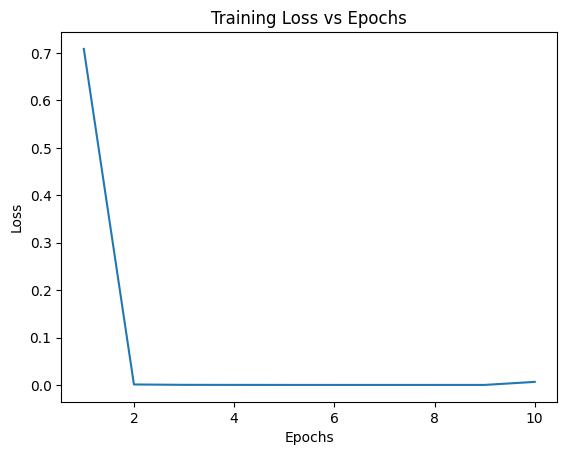

In [23]:


transform = transforms.Compose([
  transforms.Resize((32, 32)),
  transforms.Grayscale(num_output_channels=1),
  transforms.ToTensor(),
  transforms.Lambda(lambda x: (x > 0.5).float())
])

dataset_train = OmniglotDataset(root_dir="/content/drive/My Drive/DL_24-25/Data/omniglot_train/", transform=transform)
dataset_test = OmniglotDataset(root_dir="/content/drive/My Drive/DL_24-25/Data/omniglot_test/", transform=transform)

dataloader_train = DataLoader(dataset_train, batch_size=8, shuffle=True)
dataloader_test = DataLoader(dataset_test, batch_size=8, shuffle=True)

net = OmniglotClassifier()
optimizer = torch.optim.AdamW(net.parameters(), lr=0.001)

losses = train_model(dataloader_train, optimizer, net, num_epochs=10, create_plot=True)


In [26]:
f1 = eval_f1(dataloader_test, net)
print(f"\nF1 score: {f1}")

Calclating F1: 100%|██████████| 1520/1520 [00:54<00:00, 27.88it/s]



F1 score: 1.0


# Task 11

In [32]:
class OmniglotMultiOutputClassifier(nn.Module):
  def __init__(self, char_count=964, alphabet_count=30):
    super().__init__()

    self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
    self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)

    self.feature_fc = nn.Linear(4096, 128)

    self.char_fc1 = nn.Linear(128, 256)
    self.char_fc2 = nn.Linear(256, char_count)

    self.alpha_fc1 = nn.Linear(128, 128)
    self.alpha_fc2 = nn.Linear(128, alphabet_count)

  def forward(self, image):
    x = self.conv1(image)
    x = nn.ReLU()(x)
    x = nn.MaxPool2d(2)(x)

    x = self.conv2(x)
    x = nn.ReLU()(x)
    x = nn.MaxPool2d(2)(x)

    x = x.view(x.size(0), -1)
    x = self.feature_fc(x)
    x = nn.ReLU()(x)

    char_out = self.char_fc1(x)
    char_out = nn.ReLU()(char_out)
    char_out = self.char_fc2(char_out)

    alpha_out = self.alpha_fc1(x)
    alpha_out = nn.ReLU()(alpha_out)
    alpha_out = self.alpha_fc2(alpha_out)

    return char_out, alpha_out

In [33]:
class OmniglotDataset(Dataset):
  def __init__(self, root_dir, transform=None):
    self.dataset = ImageFolder(root=root_dir, transform=transform)
    self.class_to_alphabet = {}

    for path, class_idx in self.dataset.samples:
      alphabet_name = os.path.normpath(path).split(os.sep)[-3]
      self.class_to_alphabet[class_idx] = alphabet_name

    self.alphabet_names = sorted(set(self.class_to_alphabet.values()))
    self.alphabet_to_idx = {name: idx for idx, name in enumerate(self.alphabet_names)}
    self.alphabets_count = len(self.alphabet_names)


  def __len__(self):
    return len(self.dataset)

  def __getitem__(self, idx):
    image, character_label = self.dataset[idx]
    image_path, _ = self.dataset.samples[idx]

    alphabet_name = os.path.normpath(image_path).split(os.sep)[-3]
    alphabet_idx = self.alphabet_to_idx[alphabet_name]


    one_hot_alphabet = F.one_hot(torch.tensor(alphabet_idx), num_classes=self.alphabets_count).float()

    return image, character_label, alphabet_idx #Remove the one hot encoding


In [59]:
from sklearn.metrics import f1_score

def train_model(dataloader_train, dataloader_val, optimizer, net, num_epochs=10, create_plot=False):
  char_weight = 0.67

  criterion_char = nn.CrossEntropyLoss()
  criterion_alpha = nn.CrossEntropyLoss()
  train_loss_list = []
  val_loss_list = []
  train_char_f1_list = []
  val_char_f1_list = []
  train_alpha_f1_list = []
  val_alpha_f1_list = []

  for epoch in range(num_epochs):
    net.train()
    total_loss = 0
    all_char_preds = []
    all_char_labels = []
    all_alpha_preds = []
    all_alpha_labels = []

    for images, alphabet_idxs, char_labels in tqdm(dataloader_train, desc=f"Epoch {epoch+1}/{num_epochs}"):
      optimizer.zero_grad()
      out_char, out_alpha = net(images)

      loss_char = criterion_char(out_char, char_labels)
      loss_alpha = criterion_alpha(out_alpha, alphabet_idxs)
      loss = char_weight * loss_char + loss_alpha * (1 - char_weight)

      loss.backward()
      optimizer.step()
      total_loss += loss.item()

      all_char_preds.extend(out_char.argmax(dim=1).numpy())
      all_char_labels.extend(char_labels.numpy())
      all_alpha_preds.extend(out_alpha.argmax(dim=1).numpy())
      all_alpha_labels.extend(alphabet_idxs.numpy())

    avg_train_loss = total_loss / len(dataloader_train)
    train_char_f1 = f1_score(all_char_labels, all_char_preds, average='macro')
    train_alpha_f1 = f1_score(all_alpha_labels, all_alpha_preds, average='macro')

    net.eval()
    val_loss = 0
    val_char_preds = []
    val_char_labels = []
    val_alpha_preds = []
    val_alpha_labels = []

    with torch.no_grad():
      for images, alphabet_idxs, char_labels in tqdm(dataloader_val):
        out_char, out_alpha = net(images)

        loss_char = criterion_char(out_char, char_labels)
        loss_alpha = criterion_alpha(out_alpha, alphabet_idxs)
        loss = char_weight * loss_char + loss_alpha * (1 - char_weight)
        val_loss += loss.item()

        val_char_preds.extend(out_char.argmax(dim=1).numpy())
        val_char_labels.extend(char_labels.numpy())
        val_alpha_preds.extend(out_alpha.argmax(dim=1).numpy())
        val_alpha_labels.extend(alphabet_idxs.numpy())

    avg_val_loss = val_loss / len(dataloader_val)
    val_char_f1 = f1_score(val_char_labels, val_char_preds, average='macro')
    val_alpha_f1 = f1_score(val_alpha_labels, val_alpha_preds, average='macro')

    print(f"  Loss         Train/Val: {round(avg_train_loss, 4)} / {round(avg_val_loss, 4)}")
    print(f"  F1 Character Train/Val: {round(train_char_f1, 4)} / {round(val_char_f1, 4)}")
    print(f"  F1 Alphabet  Train/Val: {round(train_alpha_f1, 4)} / {round(val_alpha_f1, 4)}")




    train_loss_list.append(avg_train_loss)
    val_loss_list.append(avg_val_loss)
    train_char_f1_list.append(train_char_f1)
    val_char_f1_list.append(val_char_f1)
    train_alpha_f1_list.append(train_alpha_f1)
    val_alpha_f1_list.append(val_alpha_f1)

    torch.save(net.state_dict(), f'task11_epoch_{epoch+1}.pth')



  if create_plot:
    epochs = list(range(1, num_epochs+1))

    plt.plot(epochs, train_loss_list, label='Training Loss')
    plt.plot(epochs, val_loss_list, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Model Loss vs Epochs')
    plt.legend()
    plt.show()

    plt.plot(epochs, train_char_f1_list, label='Training Character F1')
    plt.plot(epochs, val_char_f1_list, label='Validation Character F1')
    plt.xlabel('Epochs')
    plt.ylabel('Character F1')
    plt.title('Character F1 vs Epochs')
    plt.legend()
    plt.show()

    plt.plot(epochs, train_alpha_f1_list, label='Training Alphabet F1')
    plt.plot(epochs, val_alpha_f1_list, label='Validation Alphabet F1')
    plt.xlabel('Epochs')
    plt.ylabel('Alphabet F1')
    plt.title('Alphabet F1 vs Epochs')
    plt.legend()
    plt.show()

  return train_loss_list



100%|██████████| 1520/1520 [00:54<00:00, 27.79it/s]


  Loss         Train/Val: 2.6246 / 1.9911
  F1 Character Train/Val: 0.1828 / 0.3621
  F1 Alphabet  Train/Val: 0.1995 / 0.3517


100%|██████████| 1520/1520 [00:54<00:00, 27.82it/s]


  Loss         Train/Val: 1.7868 / 1.5196
  F1 Character Train/Val: 0.4227 / 0.4908
  F1 Alphabet  Train/Val: 0.4133 / 0.4844


100%|██████████| 1520/1520 [00:53<00:00, 28.59it/s]


  Loss         Train/Val: 1.3675 / 1.2519
  F1 Character Train/Val: 0.5559 / 0.5836
  F1 Alphabet  Train/Val: 0.5397 / 0.5665


100%|██████████| 1520/1520 [00:53<00:00, 28.44it/s]


  Loss         Train/Val: 1.1118 / 1.0332
  F1 Character Train/Val: 0.6329 / 0.6735
  F1 Alphabet  Train/Val: 0.6136 / 0.646


100%|██████████| 1520/1520 [00:54<00:00, 28.00it/s]


  Loss         Train/Val: 0.9238 / 0.9649
  F1 Character Train/Val: 0.6922 / 0.6894
  F1 Alphabet  Train/Val: 0.6701 / 0.6695


100%|██████████| 1520/1520 [00:55<00:00, 27.63it/s]


  Loss         Train/Val: 0.7719 / 0.8224
  F1 Character Train/Val: 0.7435 / 0.7451
  F1 Alphabet  Train/Val: 0.7167 / 0.7227


100%|██████████| 1520/1520 [00:54<00:00, 28.14it/s]


  Loss         Train/Val: 0.656 / 0.7991
  F1 Character Train/Val: 0.7844 / 0.7552
  F1 Alphabet  Train/Val: 0.7604 / 0.7364


100%|██████████| 1520/1520 [00:53<00:00, 28.54it/s]


  Loss         Train/Val: 0.5579 / 0.7911
  F1 Character Train/Val: 0.8154 / 0.7666
  F1 Alphabet  Train/Val: 0.7939 / 0.7452


100%|██████████| 1520/1520 [00:53<00:00, 28.23it/s]


  Loss         Train/Val: 0.4754 / 0.745
  F1 Character Train/Val: 0.8435 / 0.7861
  F1 Alphabet  Train/Val: 0.8168 / 0.7681


100%|██████████| 1520/1520 [00:53<00:00, 28.36it/s]


  Loss         Train/Val: 0.4105 / 0.8042
  F1 Character Train/Val: 0.8662 / 0.788
  F1 Alphabet  Train/Val: 0.841 / 0.7683


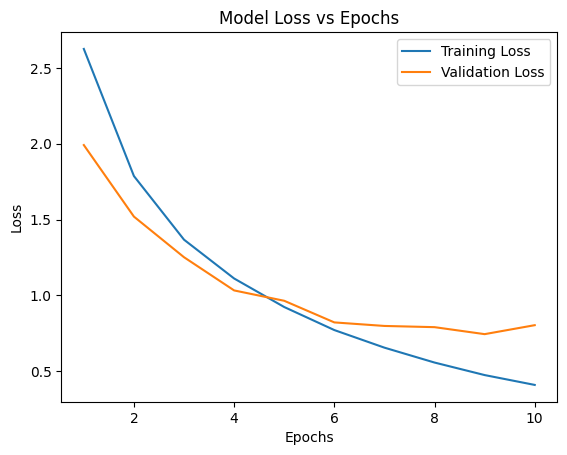

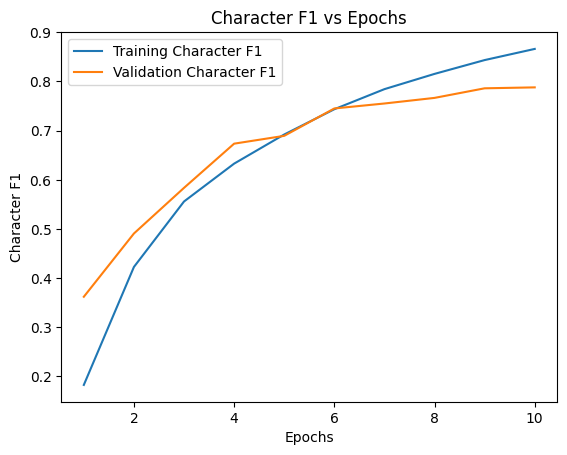

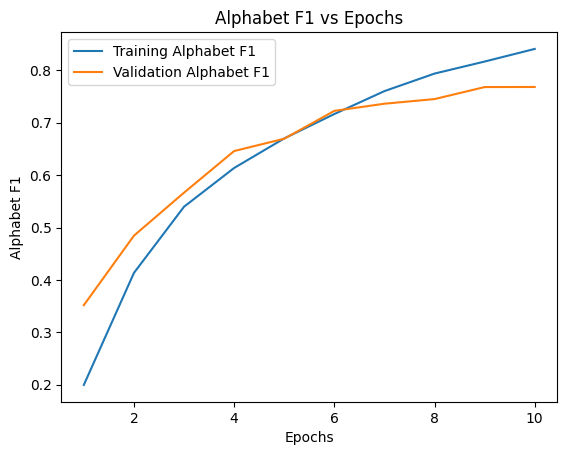

In [60]:
transform = transforms.Compose([
  transforms.Resize((32, 32)),
  transforms.Grayscale(num_output_channels=1),
  transforms.ToTensor(),
  transforms.Lambda(lambda x: (x > 0.5).float())
])

dataset_train = OmniglotDataset(root_dir="/content/drive/My Drive/DL_24-25/Data/omniglot_train/", transform=transform)
dataset_test = OmniglotDataset(root_dir="/content/drive/My Drive/DL_24-25/Data/omniglot_test/", transform=transform)

dataloader_train = DataLoader(dataset_train, batch_size=8, shuffle=True)
dataloader_test = DataLoader(dataset_test, batch_size=8, shuffle=False)

net = OmniglotMultiOutputClassifier()
optimizer = torch.optim.AdamW(net.parameters(), lr=0.001)


losses = train_model(
    dataloader_train=dataloader_train,
    dataloader_val=dataloader_test,
    optimizer=optimizer,
    net=net,
    num_epochs=10,
    create_plot=True
)

